In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
ds_base = xr.open_dataset('/net/fs11/d0/emfreese/GCrundirs/IRF_runs/RRTMG_base/template/mod_output/GEOSChem.Emissions.20160101_0000z.nc4')
ds_pulse = xr.open_dataset('/net/fs11/d0/emfreese/GCrundirs/IRF_runs/RRTMG_pulse/template/mod_output/GEOSChem.SpeciesConc.20160101_0000z.nc4')

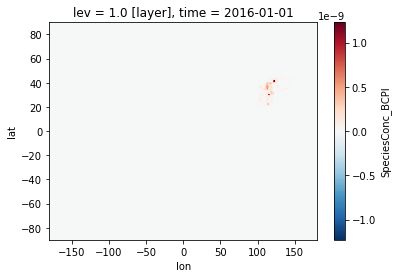

In [3]:
(ds_pulse['SpeciesConc_BCPI'].isel(lev = 0)-ds_base['SpeciesConc_BCPI'].isel(lev = 0)).plot()

In [ ]:
EXPID:  OutputDir/GEOSChem
EXPDSC: GEOS-Chem_devel
CoresPerNode: 12
VERSION: 1

#==============================================================================
# Define grid labels
#
# Define output grids different from the native cubed sphere in this section.
# Each diagnostics collection is output on the native resolution global cubed
# sphere grid unless a different grid defined here is set for that collection
# in the collections section of this file.
#
# See the examples below for defining different types of grid at different
# resolutions.
#
# See the collections section later on in this file for instructions on
# using an alternative grid for output.
#==============================================================================
GRID_LABELS: PE24x144-CF
             PC360x181-DC
             REGIONAL1x1
    ::

    # Example of cubed-sphere grid at c24 resolution
    PE24x144-CF.GRID_TYPE: Cubed-Sphere
    PE24x144-CF.IM_WORLD: 24
    PE24x144-CF.JM_WORLD: 144
    PE24x144-CF.LM: 72

    # Example of lat-lon global grid at 1x1 resolution
    PC360x181-DC.GRID_TYPE: LatLon
    PC360x181-DC.IM_WORLD: 360
    PC360x181-DC.JM_WORLD: 181
    PC360x181-DC.POLE: PC
    PC360x181-DC.DATELINE: DC
    PC360x181-DC.LM: 72

    # Example of lat-lon regional grid at 1x1 resolution
    REGIONAL1x1.GRID_TYPE: LatLon
    REGIONAL1x1.IM_WORLD: 80
    REGIONAL1x1.JM_WORLD: 40
    REGIONAL1x1.POLE: XY
    REGIONAL1x1.DATELINE: XY
    REGIONAL1x1.LON_RANGE:   0 80
    REGIONAL1x1.LAT_RANGE: -30 10
    REGIONAL1x1.LM: 72

#==============================================================================
# Declare collection names
#
# You can disable collections by commenting out with #
# Also note, you can avoid adding collections to the benchmark simulation
# by prefacing lines with , which will get commented out.
# (e.g. to get around an "input file too long" error in MAPL)
#==============================================================================
COLLECTIONS: 'AerosolMass',
             'Aerosols',
             #'Budget',
             #'CloudConvFlux',
             #'ConcAboveSfc',
             #'ConcAfterChem',
             'DryDep',
             'Emissions',
             #'JValues',
             'Metrics',
             #'KppDiags',
             #'LevelEdgeDiags',
             #'ProdLoss',
             'RRTMG',
             ##'RxnRates',
             'SpeciesConc',
             #'StateChm',
             #'StateMet',
             #'StratBM',
             'WetLossConv',
             'WetLossLS',
::
#==============================================================================
# Define collections
#
# The rest of this file consists of collection definitions.
# Above collections whose declarations are commented out will be ignored.
# You can skip individual diagnostics by commenting out their names.
#
# WARNING: Frequency, duration, and mode will be over-written with
# settings in runConfig.sh. Edit settings in that file. You can execute the
# script to update this file and then inspect results before submitting a
# run. Collection names are hard-coded in that file; if you add more
# collections then you must also add them there for auto-update, or manually
# change settings for the new collection in this file.
#
# NOTES:
#    (1) Template keyword defines suffix of output filename, appended to
#        GCHP.{collection}.
#
#    (2) Frequency keyword sets frequency of data in each output file
#
#    (3) Duration keyword sets frequency of output file
#
#    (4) Mode keyword may be 'time-averaged' or 'instantaneous'
#
#    (5) See the GRID_LABELS sections above for details about output grids
#
#    (6) To output data on a grid other than native res global cubed sphere
#        include the 'grid_label' field. For example,
#
#           SpeciesConc.grid_label:   REGIONAL1x1
#
#    (7) If you are outputting on a lat/lon grid, be sure to specify
#        conservative regridding. Otherwise regridding will be bi-linear.
#
#           SpeciesConc.conservative: 1
#
#    (8) To output a reduced set of levels, use the levels keyword, e.g.:
#
#           SpeciesConc.levels: 1 2 3
#
#==============================================================================
# Emissions (see HEMCO_Diagn.rc for additional config settings)
  Emissions.template:       '%y4%m2%d2_%h2%n2z.nc4',
  Emissions.format:         'CFIO',
  Emissions.timestampStart: .true.
  Emissions.monthly:        0
  Emissions.frequency:      010000
  Emissions.duration:       010000
  Emissions.mode:           'time-averaged'
  Emissions.fields:       #'EmisACET_Total       ', 'GCHPchem',
                          # 'EmisACET_Anthro      ', 'GCHPchem',
                          # 'EmisACET_BioBurn     ', 'GCHPchem',
                          # 'EmisACET_Biogenic    ', 'GCHPchem',
                          # 'EmisACET_Ocean       ', 'GCHPchem',
                          # 'EmisALD2_Total       ', 'GCHPchem',
                          # 'EmisALD2_Anthro      ', 'GCHPchem',
                          # 'EmisALD2_BioBurn     ', 'GCHPchem',
                          # 'EmisALD2_Biogenic    ', 'GCHPchem',
                          # 'EmisALD2_Ocean       ', 'GCHPchem',
                          # 'EmisALD2_PlantDecay  ', 'GCHPchem',
                          # 'EmisALD2_Ship        ', 'GCHPchem',
                          # 'EmisALK4_Total       ', 'GCHPchem',
                          # 'EmisALK4_Aircraft    ', 'GCHPchem',
                          # 'EmisALK4_Anthro      ', 'GCHPchem',
                          # 'EmisALK4_BioBurn     ', 'GCHPchem',
                          # 'EmisALK4_Ship        ', 'GCHPchem',
                          'EmisBCPI_Total       ', 'GCHPchem',
                          'EmisBCPI_Aircraft    ', 'GCHPchem',
                          'EmisBCPI_Anthro      ', 'GCHPchem',
                          'EmisBCPI_BioBurn     ', 'GCHPchem',
                          'EmisBCPI_Ship        ', 'GCHPchem',
                          'EmisBCPO_Total       ', 'GCHPchem',
                          'EmisBCPO_Anthro      ', 'GCHPchem',
                          'EmisBCPO_BioBurn     ', 'GCHPchem',
                          'EmisBCPO_Ship        ', 'GCHPchem',
                          # 'EmisBENZ_Total       ', 'GCHPchem',
                          # 'EmisBENZ_Anthro      ', 'GCHPchem',
                          # 'EmisBENZ_BioBurn     ', 'GCHPchem',
                          # 'EmisBENZ_Ship        ', 'GCHPchem',
                          # 'EmisC2H2_Total       ', 'GCHPchem',
                          # 'EmisC2H2_Anthro      ', 'GCHPchem',
                          # 'EmisC2H2_Ship        ', 'GCHPchem',
                          # 'EmisC2H4_Total       ', 'GCHPchem',
                          # 'EmisC2H4_Anthro      ', 'GCHPchem',
                          # 'EmisC2H4_Biogenic    ', 'GCHPchem',
                          # 'EmisC2H4_Ship        ', 'GCHPchem',
                          # 'EmisC2H6_Total       ', 'GCHPchem',
                          # 'EmisC2H6_Aircraft    ', 'GCHPchem',
                          # 'EmisC2H6_Anthro      ', 'GCHPchem',
                          # 'EmisC2H6_BioBurn     ', 'GCHPchem',
                          # 'EmisC2H6_Ship        ', 'GCHPchem',
                          # 'EmisC3H8_Total       ', 'GCHPchem',
                          # 'EmisC3H8_Aircraft    ', 'GCHPchem',
                          # 'EmisC3H8_Anthro      ', 'GCHPchem',
                          # 'EmisC3H8_BioBurn     ', 'GCHPchem',
                          # 'EmisC3H8_Ship        ', 'GCHPchem',
                          # 'EmisCH2Br2_Ocean     ', 'GCHPchem',
                          # 'EmisCH2I2_Ocean      ', 'GCHPchem',
                          # 'EmisCH2ICl_Ocean     ', 'GCHPchem',
                          # 'EmisCH2IBr_Ocean     ', 'GCHPchem',
                          # 'EmisCH2O_Total       ', 'GCHPchem',
                          # 'EmisCH2O_Aircraft    ', 'GCHPchem',
                          # 'EmisCH2O_Anthro      ', 'GCHPchem',
                          # 'EmisCH2O_BioBurn     ', 'GCHPchem',
                          # 'EmisCH2O_Ship        ', 'GCHPchem',
                          # 'EmisCH3I_Ocean       ', 'GCHPchem',
                          # ##'EmisCH4_Total        ', 'GCHPchem',
                          # ##'EmisCH4_Anthro       ', 'GCHPchem',
                          # ##'EmisCH4_BioBurn      ', 'GCHPchem',
                          # ##'EmisCH4_Ship         ', 'GCHPchem',
                          # 'EmisCHBr3_Ocean      ', 'GCHPchem',
                          # 'EmisCO_Total         ', 'GCHPchem',
                          # 'EmisCO_Aircraft      ', 'GCHPchem',
                          # 'EmisCO_Anthro        ', 'GCHPchem',
                          # 'EmisCO_BioBurn       ', 'GCHPchem',
                          # 'EmisCO_Ship          ', 'GCHPchem',
                          # 'EmisCO2_Total        ', 'GCHPchem',
                          # 'EmisCO2_Anthro       ', 'GCHPchem',
                          # 'EmisCO2_BioBurn      ', 'GCHPchem',
                          # 'EmisCO2_Ship         ', 'GCHPchem',
                          # 'EmisDMS_Ocean        ', 'GCHPchem',
                          # 'EmisDST1_Total       ', 'GCHPchem',
                          # 'EmisDST1_Anthro      ', 'GCHPchem',
                          # 'EmisDST1_Natural     ', 'GCHPchem',
                          # 'EmisDST2_Natural     ', 'GCHPchem',
                          # 'EmisDST3_Natural     ', 'GCHPchem',
                          # 'EmisDST4_Natural     ', 'GCHPchem',
                          # 'EmisEOH_Total        ', 'GCHPchem',
                          # 'EmisEOH_Anthro       ', 'GCHPchem',
                          # 'EmisEOH_BioBurn      ', 'GCHPchem',
                          # 'EmisEOH_Biogenic     ', 'GCHPchem',
                          # 'EmisEOH_PlantDecay   ', 'GCHPchem',
                          # 'EmisEOH_Ship         ', 'GCHPchem',
                          # 'EmisETNO3_Ocean      ', 'GCHPchem',
                          # 'EmisHAC_Total        ', 'GCHPchem',
                          # 'EmisHAC_Anthro       ', 'GCHPchem',
                          # 'EmisGLYC_Total       ', 'GCHPchem',
                          # 'EmisGLYC_Anthro      ', 'GCHPchem',
                          # ##'EmisGLYX_Total       ', 'GCHPchem',
                          # ##'EmisGLYX_Anthro      ', 'GCHPchem',
                          # 'EmisHCOOH_Total      ', 'GCHPchem',
                          # 'EmisHCOOH_Anthro     ', 'GCHPchem',
                          # 'EmisHCOOH_Ship       ', 'GCHPchem',
                          # 'EmisHNO2_Anthro      ', 'GCHPchem',
                          # 'EmisHNO3_Ship        ', 'GCHPchem',
                          # 'EmisISOP_Total       ', 'GCHPchem',
                          # 'EmisISOP_Anthro      ', 'GCHPchem',
                          # 'EmisISOP_Biogenic    ', 'GCHPchem',
                          # 'EmisLIMO_Biogenic    ', 'GCHPchem',
                          # 'EmisMACR_Total       ', 'GCHPchem',
                          # 'EmisMACR_Aircraft    ', 'GCHPchem',
                          # 'EmisMACR_Anthro      ', 'GCHPchem',
                          # 'EmisMEK_Total        ', 'GCHPchem',
                          # 'EmisMEK_Anthro       ', 'GCHPchem',
                          # 'EmisMEK_BioBurn      ', 'GCHPchem',
                          # 'EmisMEK_Ship         ', 'GCHPchem',
                          # 'EmisMENO3_Ocean      ', 'GCHPchem',
                          # ##'EmisMGLY_Total       ', 'GCHPchem',
                          # ##'EmisMGLY_Anthro      ', 'GCHPchem',
                          # 'EmisMOH_Total        ', 'GCHPchem',
                          # 'EmisMOH_Anthro       ', 'GCHPchem',
                          # 'EmisMOH_BioBurn      ', 'GCHPchem',
                          # 'EmisMOH_Biogenic     ', 'GCHPchem',
                          # 'EmisMOH_Ocean        ', 'GCHPchem',
                          # 'EmisMOH_Ship         ', 'GCHPchem',
                          # 'EmisMTPA_Total       ', 'GCHPchem',
                          # 'EmisMTPA_BioBurn     ', 'GCHPchem',
                          # 'EmisMTPA_Biogenic    ', 'GCHPchem',
                          # 'EmisMTPO_Biogenic    ', 'GCHPchem',
                          # 'EmisMVK_Anthro       ', 'GCHPchem',
                          # 'EmisNAP_Total        ', 'GCHPchem',
                          # 'EmisNAP_Anthro       ', 'GCHPchem',
                          # 'EmisNAP_BioBurn      ', 'GCHPchem',
                          # 'EmisNH3_Total        ', 'GCHPchem',
                          # 'EmisNH3_Anthro       ', 'GCHPchem',
                          # 'EmisNH3_BioBurn      ', 'GCHPchem',
                          # 'EmisNH3_Natural      ', 'GCHPchem',
                          # 'EmisNH3_Seabirds     ', 'GCHPchem',
                          # 'EmisNH3_Ship         ', 'GCHPchem',
                          # 'EmisNO_Total         ', 'GCHPchem',
                          # 'EmisNO_Aircraft      ', 'GCHPchem',
                          # 'EmisNO_Anthro        ', 'GCHPchem',
                          # 'EmisNO_BioBurn       ', 'GCHPchem',
                          # 'EmisNO_Lightning     ', 'GCHPchem',
                          # 'EmisNO_Ship          ', 'GCHPchem',
                          # 'EmisNO_Soil          ', 'GCHPchem',
                          # 'EmisNO2_Anthro       ', 'GCHPchem',
                          # 'EmisNO2_Ship         ', 'GCHPchem',
                          # 'EmisO3_Ship          ', 'GCHPchem',
                          # 'EmisOCPI_Total       ', 'GCHPchem',
                          # 'EmisOCPI_Aircraft    ', 'GCHPchem',
                          # 'EmisOCPI_Anthro      ', 'GCHPchem',
                          # 'EmisOCPI_BioBurn     ', 'GCHPchem',
                          # 'EmisOCPI_Ship        ', 'GCHPchem',
                          # 'EmisOCPO_Total       ', 'GCHPchem',
                          # 'EmisOCPO_Anthro      ', 'GCHPchem',
                          # 'EmisOCPO_BioBurn     ', 'GCHPchem',
                          # 'EmisOCPO_Ship        ', 'GCHPchem',
                          # 'EmispFe_Total        ', 'GCHPchem',
                          # 'EmispFe_Anthro       ', 'GCHPchem',
                          # 'EmispFe_Ship         ', 'GCHPchem',
                          # 'EmisPOG1_Total       ', 'GCHPchem',
                          # 'EmisPOG1_Anthro      ', 'GCHPchem',
                          # 'EmisPOG1_BioBurn     ', 'GCHPchem',
                          # 'EmisPOG2_Total       ', 'GCHPchem',
                          # 'EmisPOG2_Anthro      ', 'GCHPchem',
                          # 'EmisPOG2_BioBurn     ', 'GCHPchem',
                          # 'EmisPRPE_Total       ', 'GCHPchem',
                          # 'EmisPRPE_Aircraft    ', 'GCHPchem',
                          # 'EmisPRPE_Anthro      ', 'GCHPchem',
                          # 'EmisPRPE_BioBurn     ', 'GCHPchem',
                          # 'EmisPRPE_Biogenic    ', 'GCHPchem',
                          # 'EmisPRPE_Ship        ', 'GCHPchem',
                          # 'EmisRCHO_Total       ', 'GCHPchem',
                          # 'EmisRCHO_Aircraft    ', 'GCHPchem',
                          # 'EmisRCHO_Anthro      ', 'GCHPchem',
                          # ##'EmisSESQ_Biogenic    ', 'GCHPchem',
                          # ##'EmisBr2_Natural      ', 'GCHPchem',
                          # 'EmisBrSALA_Natural   ', 'GCHPchem',
                          # 'EmisBrSALC_Natural   ', 'GCHPchem',
                          # 'EmisSALA_Natural     ', 'GCHPchem',
                          # 'EmisSALAAL_Natural   ', 'GCHPchem',
                          # 'EmisSALACL_Natural   ', 'GCHPchem',
                          # 'EmisSALC_Natural     ', 'GCHPchem',
                          # 'EmisSALCAL_Natural   ', 'GCHPchem',
                          # 'EmisSALCCL_Natural   ', 'GCHPchem',
                          # 'EmisSO2_Total        ', 'GCHPchem',
                          # 'EmisSO2_Aircraft     ', 'GCHPchem',
                          # 'EmisSO2_Anthro       ', 'GCHPchem',
                          # 'EmisSO2_BioBurn      ', 'GCHPchem',
                          # 'EmisSO2_VolcErupt    ', 'GCHPchem',
                          # 'EmisSO2_VolcDegas    ', 'GCHPchem',
                          # 'EmisSO2_Ship         ', 'GCHPchem',
                          # 'EmisSO4_Total        ', 'GCHPchem',
                          # 'EmisSO4_Aircraft     ', 'GCHPchem',
                          # 'EmisSO4_Anthro       ', 'GCHPchem',
                          # 'EmisSO4_Ship         ', 'GCHPchem',
                          # 'EmisSOAP_Total       ', 'GCHPchem',
                          # 'EmisSOAP_Aircraft    ', 'GCHPchem',
                          # 'EmisSOAP_Anthro      ', 'GCHPchem',
                          # 'EmisSOAP_Biogenic    ', 'GCHPchem',
                          # 'EmisSOAP_BioBurn     ', 'GCHPchem',
                          # 'EmisSOAP_Ship        ', 'GCHPchem',
                          # 'EmisSOAS_Biogenic    ', 'GCHPchem',
                          # 'EmisTOLU_Total       ', 'GCHPchem',
                          # 'EmisTOLU_Anthro      ', 'GCHPchem',
                          # 'EmisTOLU_BioBurn     ', 'GCHPchem',
                          # 'EmisTOLU_Ship        ', 'GCHPchem',
                          # 'EmisXYLE_Total       ', 'GCHPchem',
                          # 'EmisXYLE_Anthro      ', 'GCHPchem',
                          # 'EmisXYLE_BioBurn     ', 'GCHPchem',
                          # 'EmisXYLE_Ship        ', 'GCHPchem',
                          # 'HcoLightningFlashRate_Total     ', 'GCHPchem',
                          # 'HcoLightningFlashRate_IntraCld  ', 'GCHPchem',
                          # 'HcoLightningFlashRate_CldGround ', 'GCHPchem',
                          # 'HcoConvectiveCloudTopHeight     ', 'GCHPchem',
                          ##'InvAPEI_BCPI         ', 'GCHPchem',
                          ##'InvAPEI_BCPO         ', 'GCHPchem',
                          ##'InvAPEI_CO           ', 'GCHPchem',
                          ##'InvAPEI_NH3          ', 'GCHPchem',
                          ##'InvAPEI_NO           ', 'GCHPchem',
                          ##'InvAPEI_OCPI         ', 'GCHPchem',
                          ##'InvAPEI_OCPO         ', 'GCHPchem',
                          ##'InvAPEI_pFe          ', 'GCHPchem',
                          ##'InvAPEI_POG1         ', 'GCHPchem',
                          ##'InvAPEI_POG2         ', 'GCHPchem',
                          ##'InvAPEI_SO2          ', 'GCHPchem',
                          ##'InvAPEI_SO4          ', 'GCHPchem',
                          ##'InvAPEI_SOAP         ', 'GCHPchem',
                          ##'InvNEI2016_ACET       ', 'GCHPchem',
                          ##'InvNEI2016_ALD2       ', 'GCHPchem',
                          ##'InvNEI2016_ALK4       ', 'GCHPchem',
                          ##'InvNEI2016_BCPI       ', 'GCHPchem',
                          ##'InvNEI2016_BCPO       ', 'GCHPchem',
                          ##'InvNEI2016_BENZ       ', 'GCHPchem',
                          ##'InvNEI2016_C2H4       ', 'GCHPchem',
                          ##'InvNEI2016_C2H6       ', 'GCHPchem',
                          ##'InvNEI2016_C3H8       ', 'GCHPchem',
                          ##'InvNEI2016_CH2O       ', 'GCHPchem',
                          ##'InvNEI2016_Cl2        ', 'GCHPchem',
                          ##'InvNEI2016_CO         ', 'GCHPchem',
                          ##'InvNEI2016_EOH        ', 'GCHPchem',
                          ##'InvNEI2016_HCl        ', 'GCHPchem',
                          ##'InvNEI2016_HNO2       ', 'GCHPchem',
                          ##'InvNEI2016_HNO4       ', 'GCHPchem',
                          ##'InvNEI2016_MACR       ', 'GCHPchem',
                          ##'InvNEI2016_MEK        ', 'GCHPchem',
                          ##'InvNEI2016_MOH        ', 'GCHPchem',
                          ##'InvNEI2016_NH3        ', 'GCHPchem',
                          ##'InvNEI2016_NH4        ', 'GCHPchem',
                          ##'InvNEI2016_NIT        ', 'GCHPchem',
                          ##'InvNEI2016_NO         ', 'GCHPchem',
                          ##'InvNEI2016_NO2        ', 'GCHPchem',
                          ##'InvNEI2016_pFe        ', 'GCHPchem',
                          ##'InvNEI2016_PRPE       ', 'GCHPchem',
                          ##'InvNEI2016_OCPI       ', 'GCHPchem',
                          ##'InvNEI2016_OCPO       ', 'GCHPchem',
                          ##'InvNEI2016_RCHO       ', 'GCHPchem',
                          ##'InvNEI2016_SO2        ', 'GCHPchem',
                          ##'InvNEI2016_SO4        ', 'GCHPchem',
                          ##'InvNEI2016_SOAP       ', 'GCHPchem',
                          ##'InvNEI2016_TOLU       ', 'GCHPchem',
                          ##'InvNEI2016_XYLE       ', 'GCHPchem',
                          ##'InvDICEAfrica_ACET   ', 'GCHPchem',
                          ##'InvDICEAfrica_ALD2   ', 'GCHPchem',
                          ##'InvDICEAfrica_ALK4   ', 'GCHPchem',
                          ##'InvDICEAfrica_BCPI   ', 'GCHPchem',
                          ##'InvDICEAfrica_BCPO   ', 'GCHPchem',
                          ##'InvDICEAfrica_BENZ   ', 'GCHPchem',
                          ##'InvDICEAfrica_C2H2   ', 'GCHPchem',
                          ##'InvDICEAfrica_C2H4   ', 'GCHPchem',
                          ##'InvDICEAfrica_C2H6   ', 'GCHPchem',
                          ##'InvDICEAfrica_C3H8   ', 'GCHPchem',
                          ##'InvDICEAfrica_CH2O   ', 'GCHPchem',
                          ##'InvDICEAfrica_CO     ', 'GCHPchem',
                          ##'InvDICEAfrica_HAC    ', 'GCHPchem',
                          ##'InvDICEAfrica_HCOOH  ', 'GCHPchem',
                          ##'InvDICEAfrica_GLYC   ', 'GCHPchem',
                          ##'InvDICEAfrica_ISOP   ', 'GCHPchem',
                          ##'InvDICEAfrica_MACR   ', 'GCHPchem',
                          ##'InvDICEAfrica_MEK    ', 'GCHPchem',
                          ##'InvDICEAfrica_MOH    ', 'GCHPchem',
                          ##'InvDICEAfrica_MVK    ', 'GCHPchem',
                          ##'InvDICEAfrica_NH3    ', 'GCHPchem',
                          ##'InvDICEAfrica_NO     ', 'GCHPchem',
                          ##'InvDICEAfrica_NO2    ', 'GCHPchem',
                          ##'InvDICEAfrica_OCPI   ', 'GCHPchem',
                          ##'InvDICEAfrica_OCPO   ', 'GCHPchem',
                          ##'InvDICEAfrica_pFe    ', 'GCHPchem',
                          ##'InvDICEAfrica_PRPE   ', 'GCHPchem',
                          ##'InvDICEAfrica_RCHO   ', 'GCHPchem',
                          ##'InvDICEAfrica_SO2    ', 'GCHPchem',
                          ##'InvDICEAfrica_SO4    ', 'GCHPchem',
                          ##'InvDICEAfrica_SOAP   ', 'GCHPchem',
                          ##'InvDICEAfrica_TOLU   ', 'GCHPchem',
                          ##'InvDICEAfrica_XYLE   ', 'GCHPchem',
                          #'InvCEDS_ALD2         ', 'GCHPchem',
                          #'InvCEDS_ALK4         ', 'GCHPchem',
                          #'InvCEDS_BCPI         ', 'GCHPchem',
                          #'InvCEDS_BCPO         ', 'GCHPchem',
                          #'InvCEDS_BENZ         ', 'GCHPchem',
                          #'InvCEDS_C2H2         ', 'GCHPchem',
                          #'InvCEDS_C2H4         ', 'GCHPchem',
                          #'InvCEDS_C2H6         ', 'GCHPchem',
                          #'InvCEDS_C3H8         ', 'GCHPchem',
                          #'InvCEDS_CH2O         ', 'GCHPchem',
                          #'InvCEDS_CO           ', 'GCHPchem',
                          #'InvCEDS_MOH          ', 'GCHPchem',
                          #'InvCEDS_EOH          ', 'GCHPchem',
                          #'InvCEDS_HCOOH        ', 'GCHPchem',
                          #'InvCEDS_MEK          ', 'GCHPchem',
                          #'InvCEDS_NH3          ', 'GCHPchem',
                          #'InvCEDS_NO           ', 'GCHPchem',
                          #'InvCEDS_OCPI         ', 'GCHPchem',
                          #'InvCEDS_OCPO         ', 'GCHPchem',
                          #'InvCEDS_pFe          ', 'GCHPchem',
                          #'InvCEDS_POG1         ', 'GCHPchem',
                          #'InvCEDS_POG2         ', 'GCHPchem',
                          #'InvCEDS_PRPE         ', 'GCHPchem',
                          #'InvCEDS_SO2          ', 'GCHPchem',
                          #'InvCEDS_SO4          ', 'GCHPchem',
                          #'InvCEDS_SOAP         ', 'GCHPchem',
                          #'InvCEDS_TOLU         ', 'GCHPchem',
                          #'InvCEDS_XYLE         ', 'GCHPchem',
                          #'InvGEIAnatural_NH3   ', 'GCHPchem',
                          #'InvSEABIRDS_NH3      ', 'GCHPchem',
                          #'InvC2H62010_C2H6     ', 'GCHPchem',
                          #'InvXIAO_C3H8         ', 'GCHPchem',
                          #'InvLIANG_CH2Br2      ', 'GCHPchem',
                          #'InvLIANG_CHBr3       ', 'GCHPchem',
                          #'InvORDONEZ_CH2I2     ', 'GCHPchem',
                          #'InvORDONEZ_CH2ICl    ', 'GCHPchem',
                          #'InvORDONEZ_CH2IBr    ', 'GCHPchem',
                          #'InvORDONEZ_CH3I      ', 'GCHPchem',
                          #'InvCEDSship_ALD2     ', 'GCHPchem',
                          #'InvCEDSship_ALK4     ', 'GCHPchem',
                          #'InvCEDSship_BCPI     ', 'GCHPchem',
                          #'InvCEDSship_BCPO     ', 'GCHPchem',
                          #'InvCEDSship_BENZ     ', 'GCHPchem',
                          #'InvCEDSship_C2H2     ', 'GCHPchem',
                          #'InvCEDSship_C2H4     ', 'GCHPchem',
                          #'InvCEDSship_C2H6     ', 'GCHPchem',
                          #'InvCEDSship_C3H8     ', 'GCHPchem',
                          #'InvCEDSship_CH2O     ', 'GCHPchem',
                          #'InvCEDSship_CO       ', 'GCHPchem',
                          #'InvCEDSship_EOH      ', 'GCHPchem',
                          #'InvCEDSship_HCOOH    ', 'GCHPchem',
                          #'InvCEDSship_MEK      ', 'GCHPchem',
                          #'InvCEDSship_NH3      ', 'GCHPchem',
                          #'InvCEDSship_pFe      ', 'GCHPchem',
                          #'InvCEDSship_PRPE     ', 'GCHPchem',
                          #'InvCEDSship_OCPI     ', 'GCHPchem',
                          #'InvCEDSship_OCPO     ', 'GCHPchem',
                          #'InvCEDSship_SO2      ', 'GCHPchem',
                          #'InvCEDSship_SO4      ', 'GCHPchem',
                          #'InvCEDSship_SOAP     ', 'GCHPchem',
                          #'InvCEDSship_TOLU     ', 'GCHPchem',
                          #'InvCEDSship_XYLE     ', 'GCHPchem',
                          #'InvAEIC_ACET         ', 'GCHPchem',
                          #'InvAEIC_ALD2         ', 'GCHPchem',
                          #'InvAEIC_ALK4         ', 'GCHPchem',
                          #'InvAEIC_BCPI         ', 'GCHPchem',
                          #'InvAEIC_C2H6         ', 'GCHPchem',
                          #'InvAEIC_C3H8         ', 'GCHPchem',
                          #'InvAEIC_CH2O         ', 'GCHPchem',
                          #'InvAEIC_CO           ', 'GCHPchem',
                          #'InvAEIC_MACR         ', 'GCHPchem',
                          #'InvAEIC_NO           ', 'GCHPchem',
                          #'InvAEIC_OCPI         ', 'GCHPchem',
                          #'InvAEIC_PRPE         ', 'GCHPchem',
                          #'InvAEIC_RCHO         ', 'GCHPchem',
                          #'InvAEIC_SO2          ', 'GCHPchem',
                          #'InvAEIC_SO4          ', 'GCHPchem',
                          #'InvAEIC_SOAP         ', 'GCHPchem',
                          #'InvPLANTDECAY_ALD2   ', 'GCHPchem',
                          #'InvPLANTDECAY_EOH    ', 'GCHPchem',
                          #'InvAFCID_DST1        ', 'GCHPchem',
                          #'InvDEAD_DST1         ', 'GCHPchem',
                          #'InvDEAD_DST2         ', 'GCHPchem',
                          #'InvDEAD_DST3         ', 'GCHPchem',
                          #'InvDEAD_DST4         ', 'GCHPchem',
                          #'InvMEGAN_ALD2        ', 'GCHPchem',
                          ##'InvMEGAN_C2H4        ', 'GCHPchem',
                          #'InvMEGAN_EOH         ', 'GCHPchem',
                          #'InvMEGAN_ISOP        ', 'GCHPchem',
                          #'InvMEGAN_LIMO        ', 'GCHPchem',
                          #'InvMEGAN_MTPA        ', 'GCHPchem',
                          #'InvMEGAN_MTPO        ', 'GCHPchem',
                          #'InvMEGAN_PRPE        ', 'GCHPchem',
                          ##'InvMEGAN_SESQ        ', 'GCHPchem',
                          #'InvMEGAN_SOAP        ', 'GCHPchem',
                          #'InvMEGAN_SOAS        ', 'GCHPchem',
                          #'InvMEGAN_ACET        ', 'GCHPchem',
                          #'InvMEGAN_ACET_MONO   ', 'GCHPchem',
                          #'InvMEGAN_ACET_MBOX   ', 'GCHPchem',
                          #'InvMEGAN_ACET_DIRECT ', 'GCHPchem',
                          #'InvMEGAN_MOH         ', 'GCHPchem',
                          #'InvMEGAN_APIN        ', 'GCHPchem',
                          #'InvMEGAN_BPIN        ', 'GCHPchem',
                          #'InvMEGAN_SABI        ', 'GCHPchem',
                          #'InvMEGAN_MYRC        ', 'GCHPchem',
                          #'InvMEGAN_CARE        ', 'GCHPchem',
                          #'InvMEGAN_OCIM        ', 'GCHPchem',
                          #'InvMEGAN_OMON        ', 'GCHPchem',
                          #'InvMEGAN_MONX        ', 'GCHPchem',
                          #'InvMEGAN_FARN        ', 'GCHPchem',
                          #'InvMEGAN_BCAR        ', 'GCHPchem',
                          #'InvMEGAN_OSQT        ', 'GCHPchem',
                          #'InvMEGAN_MBOX        ', 'GCHPchem',
                          #'InvMEGAN_FAXX        ', 'GCHPchem',
                          #'InvMEGAN_AAXX        ', 'GCHPchem',
                          #'InvSeaSalt_BrSALA    ', 'GCHPchem',
                          #'InvSeaSalt_BrSALC    ', 'GCHPchem',
                          #'InvSeaSalt_SALA      ', 'GCHPchem',
                          #'InvSeaSalt_SALAAL    ', 'GCHPchem',
                          #'InvSeaSalt_SALACL    ', 'GCHPchem',
                          #'InvSeaSalt_SALC      ', 'GCHPchem',
                          #'InvSeaSalt_SALCAL    ', 'GCHPchem',
                          #'InvSeaSalt_SALCCL    ', 'GCHPchem',
                          #'InvSOILNOX_NO        ', 'GCHPchem',
                          #'InvSeaFlux_ACET      ', 'GCHPchem',
                          #'InvSeaFlux_ALD2      ', 'GCHPchem',
                          #'InvSeaFlux_DMS       ', 'GCHPchem',
                          #'InvSeaFlux_CH3I      ', 'GCHPchem',
                          #'InvSeaFlux_ETNO3     ', 'GCHPchem',
                          #'InvSeaFlux_MENO3     ', 'GCHPchem',
                          #'InvSeaFlux_MOH       ', 'GCHPchem',
                          #'InvPARANOX_HNO3      ', 'GCHPchem',
                          #'InvPARANOX_NO        ', 'GCHPchem',
                          #'InvPARANOX_NO2       ', 'GCHPchem',
                          #'InvPARANOX_O3        ', 'GCHPchem',
                          #'InvLIGHTNOX_NO       ', 'GCHPchem',
                          #'InvGFED_ACET         ', 'GCHPchem',
                          #'InvGFED_ALD2         ', 'GCHPchem',
                          #'InvGFED_ALK4         ', 'GCHPchem',
                          #'InvGFED_BCPI         ', 'GCHPchem',
                          #'InvGFED_BCPO         ', 'GCHPchem',
                          #'InvGFED_BENZ         ', 'GCHPchem',
                          #'InvGFED_C2H6         ', 'GCHPchem',
                          #'InvGFED_C3H8         ', 'GCHPchem',
                          #'InvGFED_CH2O         ', 'GCHPchem',
                          #'InvGFED_CO           ', 'GCHPchem',
                          #'InvGFED_EOH          ', 'GCHPchem',
                          #'InvGFED_MEK          ', 'GCHPchem',
                          #'InvGFED_MOH          ', 'GCHPchem',
                          #'InvGFED_MTPA         ', 'GCHPchem',
                          #'InvGFED_NAP          ', 'GCHPchem',
                          #'InvGFED_NH3          ', 'GCHPchem',
                          #'InvGFED_NO           ', 'GCHPchem',
                          #'InvGFED_OCPI         ', 'GCHPchem',
                          #'InvGFED_OCPO         ', 'GCHPchem',
                          #'InvGFED_POG1         ', 'GCHPchem',
                          #'InvGFED_POG2         ', 'GCHPchem',
                          #'InvGFED_PRPE         ', 'GCHPchem',
                          #'InvGFED_SO2          ', 'GCHPchem',
                          #'InvGFED_SOAP         ', 'GCHPchem',
                          #'InvGFED_TOLU         ', 'GCHPchem',
                          #'InvGFED_XYLE         ', 'GCHPchem',
                          #'InvVOLCANOerupt_SO2  ', 'GCHPchem',
                          #'InvVOLCANOdegas_SO2  ', 'GCHPchem',
                          #'InvIODINE_HOI        ', 'GCHPchem',
                          #'InvIODINE_I2         ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE AerosolMass COLLECTION %%%%%
#
# Aerosol and PM2.5 mass
#
# Available for full-chemistry and aerosol-only simulations
#==============================================================================
  AerosolMass.template:       '%y4%m2%d2_%h2%n2z.nc4',
  AerosolMass.format:         'CFIO',
  AerosolMass.timestampStart: .true.
  AerosolMass.monthly:        0
  AerosolMass.frequency:      010000
  AerosolMass.duration:       010000
  AerosolMass.mode:           'time-averaged'
  AerosolMass.fields:     'AerMassBC          ', 'GCHPchem',
                          # 'AerMassINDIOL      ', 'GCHPchem',
                          # 'AerMassLVOCOA      ', 'GCHPchem',
                          # 'AerMassNH4         ', 'GCHPchem',
                          # 'AerMassNIT         ', 'GCHPchem',
                          # 'AerMassPOA         ', 'GCHPchem',
                          # 'AerMassSAL         ', 'GCHPchem',
                          # 'AerMassSO4         ', 'GCHPchem',
                          # 'AerMassSOAGX       ', 'GCHPchem',
                          # 'AerMassSOAIE       ', 'GCHPchem',
                           'PM25               ', 'GCHPchem',
                           'TotalOA            ', 'GCHPchem',
                          # 'TotalOC            ', 'GCHPchem',
                          #'AerMassASOA        ', 'GCHPchem',
                          #'AerMassOPOA        ', 'GCHPchem',
                          #'AerMassTSOA        ', 'GCHPchem',
                          #'BetaNO             ', 'GCHPchem',
                          #'TotalBiogenicOA    ', 'GCHPchem',
::
#==============================================================================
# %%%%% The Aerosols COLLECTION %%%%%
#
# Aerosol optical depth, surface area, number density, and hygroscopic growth
#
# Available for full-chemistry or aerosol-only simulations
#==============================================================================
  Aerosols.template:       '%y4%m2%d2_%h2%n2z.nc4',
  Aerosols.format:         'CFIO',
  Aerosols.timestampStart: .true.
  Aerosols.monthly:        0
  Aerosols.frequency:      010000
  Aerosols.duration:       010000
  Aerosols.mode:           'time-averaged'
  Aerosols.fields:        #'AODHygWL1_SO4                 ', 'GCHPchem',
                          'AODHygWL1_BCPI                ', 'GCHPchem',
                          #'AODHygWL1_OCPI                ', 'GCHPchem',
                          #'AODHygWL1_SALA                ', 'GCHPchem',
                          # 'AODHygWL1_SALC                ', 'GCHPchem',
                          # 'AODDust                       ', 'GCHPchem',
                          # 'AODDustWL1_bin1               ', 'GCHPchem',
                          # 'AODDustWL1_bin2               ', 'GCHPchem',
                          # 'AODDustWL1_bin3               ', 'GCHPchem',
                          # 'AODDustWL1_bin4               ', 'GCHPchem',
                          # 'AODDustWL1_bin5               ', 'GCHPchem',
                          # 'AODDustWL1_bin6               ', 'GCHPchem',
                          # 'AODDustWL1_bin7               ', 'GCHPchem',
                          # 'AODSOAfromAqIsopreneWL1       ', 'GCHPchem',
                          # 'AODStratLiquidAerWL1          ', 'GCHPchem',
                          # 'AODPolarStratCloudWL1         ', 'GCHPchem',
                          # 'AerHygroscopicGrowth_SO4      ', 'GCHPchem',
                          'AerHygroscopicGrowth_BCPI     ', 'GCHPchem',
                          # 'AerHygroscopicGrowth_OCPI     ', 'GCHPchem',
                          # 'AerHygroscopicGrowth_SALA     ', 'GCHPchem',
                          # 'AerHygroscopicGrowth_SALC     ', 'GCHPchem',
                          # 'AerNumDensityStratLiquid      ', 'GCHPchem',
                          # 'AerNumDensityStratParticulate ', 'GCHPchem',
                          # 'AerAqueousVolume              ', 'GCHPchem',
                          # 'AerSurfAreaDust               ', 'GCHPchem',
                          # 'AerSurfAreaHyg_SO4            ', 'GCHPchem',
                          'AerSurfAreaHyg_BCPI           ', 'GCHPchem',
                          # 'AerSurfAreaHyg_OCPI           ', 'GCHPchem',
                          # 'AerSurfAreaHyg_SALA           ', 'GCHPchem',
                          # 'AerSurfAreaHyg_SALC           ', 'GCHPchem',
                          # 'AerSurfAreaStratLiquid        ', 'GCHPchem',
                          # 'AerSurfAreaPolarStratCloud    ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST1           ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST2           ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST3           ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST4           ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST5           ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST6           ', 'GCHPchem',
                          # 'Chem_AeroAreaMDUST7           ', 'GCHPchem',
                          # 'Chem_AeroAreaSULF             ', 'GCHPchem',
                          'Chem_AeroAreaBC               ', 'GCHPchem',
                          # 'Chem_AeroAreaOC               ', 'GCHPchem',
                          # 'Chem_AeroAreaSSA              ', 'GCHPchem',
                          # 'Chem_AeroAreaSSC              ', 'GCHPchem',
                          # 'Chem_AeroAreaBGSULF           ', 'GCHPchem',
                          # 'Chem_AeroAreaICEI             ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST1           ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST2           ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST3           ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST4           ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST5           ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST6           ', 'GCHPchem',
                          # 'Chem_AeroRadiMDUST7           ', 'GCHPchem',
                          # 'Chem_AeroRadiSULF             ', 'GCHPchem',
                          'Chem_AeroRadiBC               ', 'GCHPchem',
                          # 'Chem_AeroRadiOC               ', 'GCHPchem',
                          # 'Chem_AeroRadiSSA              ', 'GCHPchem',
                          # 'Chem_AeroRadiSSC              ', 'GCHPchem',
                          # 'Chem_AeroRadiBGSULF           ', 'GCHPchem',
                          # 'Chem_AeroRadiICEI             ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST1        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST2        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST3        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST4        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST5        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST6        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaMDUST7        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaSULF          ', 'GCHPchem',
                          'Chem_WetAeroAreaBC            ', 'GCHPchem',
                          # 'Chem_WetAeroAreaOC            ', 'GCHPchem',
                          # 'Chem_WetAeroAreaSSA           ', 'GCHPchem',
                          # 'Chem_WetAeroAreaSSC           ', 'GCHPchem',
                          # 'Chem_WetAeroAreaBGSULF        ', 'GCHPchem',
                          # 'Chem_WetAeroAreaICEI          ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST1        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST2        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST3        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST4        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST5        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST6        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiMDUST7        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiSULF          ', 'GCHPchem',
                          'Chem_WetAeroRadiBC            ', 'GCHPchem',
                          # 'Chem_WetAeroRadiOC            ', 'GCHPchem',
                          # 'Chem_WetAeroRadiSSA           ', 'GCHPchem',
                          # 'Chem_WetAeroRadiSSC           ', 'GCHPchem',
                          # 'Chem_WetAeroRadiBGSULF        ', 'GCHPchem',
                          # 'Chem_WetAeroRadiICEI          ', 'GCHPchem',
                          # 'Chem_StatePSC                 ', 'GCHPchem',
                          # 'Chem_KhetiSLAN2O5H2O          ', 'GCHPchem',
                          # 'Chem_KhetiSLAN2O5HCl          ', 'GCHPchem',
                          # 'Chem_KhetiSLAClNO3H2O         ', 'GCHPchem',
                          # 'Chem_KhetiSLAClNO3HCl         ', 'GCHPchem',
                          # 'Chem_KhetiSLAClNO3HBr         ', 'GCHPchem',
                          # 'Chem_KhetiSLABrNO3H2O         ', 'GCHPchem',
                          # 'Chem_KhetiSLABrNO3HCl         ', 'GCHPchem',
                          # 'Chem_KhetiSLAHOClHCl          ', 'GCHPchem',
                          # 'Chem_KhetiSLAHOClHBr          ', 'GCHPchem',
                          # 'Chem_KhetiSLAHOBrHCl          ', 'GCHPchem',
                          # 'Chem_KhetiSLAHOBrHBr          ', 'GCHPchem',
::
#==============================================================================
# Budget defined as species kg/s in the column (full, troposphere, or PBL)
# due to a single component (e.g. chemistry); default = ozone only; add more
# species as needed (advected only)
#==============================================================================
  Budget.template:        '%y4%m2%d2_%h2%n2z.nc4',
  Budget.format:          'CFIO',
  Budget.timestampStart:  .true.
  Budget.monthly:         0
  Budget.frequency:       010000
  Budget.duration:        010000
  Budget.mode:            'time-averaged'
  Budget.fields:          'BudgetWetDepPBL_SOAS           ', 'GCHPchem',
                          'BudgetWetDepPBL_SOAIE          ', 'GCHPchem',
                          'BudgetWetDepPBL_SOAGX          ', 'GCHPchem',
                          'BudgetWetDepPBL_SO4s           ', 'GCHPchem',
                          'BudgetWetDepPBL_SO4            ', 'GCHPchem',
                          'BudgetWetDepPBL_SO2            ', 'GCHPchem',
                          'BudgetWetDepPBL_SALCCL         ', 'GCHPchem',
                          'BudgetWetDepPBL_SALCAL         ', 'GCHPchem',
                          'BudgetWetDepPBL_SALC           ', 'GCHPchem',
                          'BudgetWetDepPBL_SALACL         ', 'GCHPchem',
                          'BudgetWetDepPBL_SALAAL         ', 'GCHPchem',
                          'BudgetWetDepPBL_SALA           ', 'GCHPchem',
                          'BudgetWetDepPBL_RP             ', 'GCHPchem',
                          'BudgetWetDepPBL_RIPD           ', 'GCHPchem',
                          'BudgetWetDepPBL_RIPC           ', 'GCHPchem',
                          'BudgetWetDepPBL_RIPB           ', 'GCHPchem',
                          'BudgetWetDepPBL_RIPA           ', 'GCHPchem',
                          'BudgetWetDepPBL_RB3P           ', 'GCHPchem',
                          'BudgetWetDepPBL_RA3P           ', 'GCHPchem',
                          'BudgetWetDepPBL_R4P            ', 'GCHPchem',
                          'BudgetWetDepPBL_R4N2           ', 'GCHPchem',
                          'BudgetWetDepPBL_PYAC           ', 'GCHPchem',
                          'BudgetWetDepPBL_PRPN           ', 'GCHPchem',
                          'BudgetWetDepPBL_PRPE           ', 'GCHPchem',
                          'BudgetWetDepPBL_PROPNN         ', 'GCHPchem',
                          'BudgetWetDepPBL_PPN            ', 'GCHPchem',
                          'BudgetWetDepPBL_PP             ', 'GCHPchem',
                          'BudgetWetDepPBL_PFE            ', 'GCHPchem',
                          'BudgetWetDepPBL_PAN            ', 'GCHPchem',
                          'BudgetWetDepPBL_OCPO           ', 'GCHPchem',
                          'BudgetWetDepPBL_OCPI           ', 'GCHPchem',
                          'BudgetWetDepPBL_NITs           ', 'GCHPchem',
                          'BudgetWetDepPBL_NIT            ', 'GCHPchem',
                          'BudgetWetDepPBL_NH4            ', 'GCHPchem',
                          'BudgetWetDepPBL_NH3            ', 'GCHPchem',
                          'BudgetWetDepPBL_MVKPC          ', 'GCHPchem',
                          'BudgetWetDepPBL_MVKN           ', 'GCHPchem',
                          'BudgetWetDepPBL_MVKHP          ', 'GCHPchem',
                          'BudgetWetDepPBL_MVKHCB         ', 'GCHPchem',
                          'BudgetWetDepPBL_MVKHC          ', 'GCHPchem',
                          'BudgetWetDepPBL_MVKDH          ', 'GCHPchem',
                          'BudgetWetDepPBL_MVK            ', 'GCHPchem',
                          'BudgetWetDepPBL_MTPO           ', 'GCHPchem',
                          'BudgetWetDepPBL_MTPA           ', 'GCHPchem',
                          'BudgetWetDepPBL_MSA            ', 'GCHPchem',
                          'BudgetWetDepPBL_MPN            ', 'GCHPchem',
                          'BudgetWetDepPBL_MPAN           ', 'GCHPchem',
                          'BudgetWetDepPBL_MP             ', 'GCHPchem',
                          'BudgetWetDepPBL_MONITU         ', 'GCHPchem',
                          'BudgetWetDepPBL_MONITS         ', 'GCHPchem',
                          'BudgetWetDepPBL_MONITA         ', 'GCHPchem',
                          'BudgetWetDepPBL_MOH            ', 'GCHPchem',
                          'BudgetWetDepPBL_MGLY           ', 'GCHPchem',
                          'BudgetWetDepPBL_MEK            ', 'GCHPchem',
                          'BudgetWetDepPBL_MCRHP          ', 'GCHPchem',
                          'BudgetWetDepPBL_MCRHNB         ', 'GCHPchem',
                          'BudgetWetDepPBL_MCRHN          ', 'GCHPchem',
                          'BudgetWetDepPBL_MCRENOL        ', 'GCHPchem',
                          'BudgetWetDepPBL_MCRDH          ', 'GCHPchem',
                          'BudgetWetDepPBL_MAP            ', 'GCHPchem',
                          'BudgetWetDepPBL_MACR1OOH       ', 'GCHPchem',
                          'BudgetWetDepPBL_LVOCOA         ', 'GCHPchem',
                          'BudgetWetDepPBL_LVOC           ', 'GCHPchem',
                          'BudgetWetDepPBL_LIMO           ', 'GCHPchem',
                          'BudgetWetDepPBL_ITHN           ', 'GCHPchem',
                          'BudgetWetDepPBL_ITCN           ', 'GCHPchem',
                          'BudgetWetDepPBL_ISALC          ', 'GCHPchem',
                          'BudgetWetDepPBL_ISALA          ', 'GCHPchem',
                          'BudgetWetDepPBL_IONO2          ', 'GCHPchem',
                          'BudgetWetDepPBL_IONO           ', 'GCHPchem',
                          'BudgetWetDepPBL_IONITA         ', 'GCHPchem',
                          'BudgetWetDepPBL_INPD           ', 'GCHPchem',
                          'BudgetWetDepPBL_INPB           ', 'GCHPchem',
                          'BudgetWetDepPBL_INDIOL         ', 'GCHPchem',
                          'BudgetWetDepPBL_IHN4           ', 'GCHPchem',
                          'BudgetWetDepPBL_IHN3           ', 'GCHPchem',
                          'BudgetWetDepPBL_IHN2           ', 'GCHPchem',
                          'BudgetWetDepPBL_IHN1           ', 'GCHPchem',
                          'BudgetWetDepPBL_IEPOXD         ', 'GCHPchem',
                          'BudgetWetDepPBL_IEPOXB         ', 'GCHPchem',
                          'BudgetWetDepPBL_IEPOXA         ', 'GCHPchem',
                          'BudgetWetDepPBL_IDN            ', 'GCHPchem',
                          'BudgetWetDepPBL_IDHPE          ', 'GCHPchem',
                          'BudgetWetDepPBL_IDHDP          ', 'GCHPchem',
                          'BudgetWetDepPBL_IDCHP          ', 'GCHPchem',
                          'BudgetWetDepPBL_ICPDH          ', 'GCHPchem',
                          'BudgetWetDepPBL_ICN            ', 'GCHPchem',
                          'BudgetWetDepPBL_ICl            ', 'GCHPchem',
                          'BudgetWetDepPBL_ICHE           ', 'GCHPchem',
                          'BudgetWetDepPBL_IBr            ', 'GCHPchem',
                          'BudgetWetDepPBL_I2O4           ', 'GCHPchem',
                          'BudgetWetDepPBL_I2O3           ', 'GCHPchem',
                          'BudgetWetDepPBL_I2O2           ', 'GCHPchem',
                          'BudgetWetDepPBL_I2             ', 'GCHPchem',
                          'BudgetWetDepPBL_HPETHNL        ', 'GCHPchem',
                          'BudgetWetDepPBL_HONIT          ', 'GCHPchem',
                          'BudgetWetDepPBL_HOI            ', 'GCHPchem',
                          'BudgetWetDepPBL_HOCl           ', 'GCHPchem',
                          'BudgetWetDepPBL_HOBr           ', 'GCHPchem',
                          'BudgetWetDepPBL_HNO3           ', 'GCHPchem',
                          'BudgetWetDepPBL_HMML           ', 'GCHPchem',
                          'BudgetWetDepPBL_HMS            ', 'GCHPchem',
                          'BudgetWetDepPBL_HMHP           ', 'GCHPchem',
                          'BudgetWetDepPBL_HI             ', 'GCHPchem',
                          'BudgetWetDepPBL_HCOOH          ', 'GCHPchem',
                          'BudgetWetDepPBL_HCl            ', 'GCHPchem',
                          'BudgetWetDepPBL_HC5A           ', 'GCHPchem',
                          'BudgetWetDepPBL_HBr            ', 'GCHPchem',
                          'BudgetWetDepPBL_HAC            ', 'GCHPchem',
                          'BudgetWetDepPBL_H2O2           ', 'GCHPchem',
                          'BudgetWetDepPBL_GLYX           ', 'GCHPchem',
                          'BudgetWetDepPBL_GLYC           ', 'GCHPchem',
                          'BudgetWetDepPBL_ETP            ', 'GCHPchem',
                          'BudgetWetDepPBL_ETHP           ', 'GCHPchem',
                          'BudgetWetDepPBL_ETHN           ', 'GCHPchem',
                          'BudgetWetDepPBL_ETHLN          ', 'GCHPchem',
                          'BudgetWetDepPBL_EOH            ', 'GCHPchem',
                          'BudgetWetDepPBL_DST4           ', 'GCHPchem',
                          'BudgetWetDepPBL_DST3           ', 'GCHPchem',
                          'BudgetWetDepPBL_DST2           ', 'GCHPchem',
                          'BudgetWetDepPBL_DST1           ', 'GCHPchem',
                          'BudgetWetDepPBL_CH2O           ', 'GCHPchem',
                          'BudgetWetDepPBL_BrSALC         ', 'GCHPchem',
                          'BudgetWetDepPBL_BrSALA         ', 'GCHPchem',
                          'BudgetWetDepPBL_BrCl           ', 'GCHPchem',
                          'BudgetWetDepPBL_Br2            ', 'GCHPchem',
                          'BudgetWetDepPBL_BCPO           ', 'GCHPchem',
                          'BudgetWetDepPBL_BCPI           ', 'GCHPchem',
                          'BudgetWetDepPBL_ATOOH          ', 'GCHPchem',
                          'BudgetWetDepPBL_ALD2           ', 'GCHPchem',
                          'BudgetWetDepPBL_AERI           ', 'GCHPchem',
                          'BudgetWetDepPBL_ACTA           ', 'GCHPchem',
                          #'BudgetWetDepPBL_TSOG1          ', 'GCHPchem',
                          #'BudgetWetDepPBL_TSOG0          ', 'GCHPchem',
                          #'BudgetWetDepPBL_TSOA3          ', 'GCHPchem',
                          #'BudgetWetDepPBL_TSOA2          ', 'GCHPchem',
                          #'BudgetWetDepPBL_TSOA1          ', 'GCHPchem',
                          #'BudgetWetDepPBL_TSOA0          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOG3          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOG2          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOG1          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOAN          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOA3          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOA2          ', 'GCHPchem',
                          #'BudgetWetDepPBL_ASOA1          ', 'GCHPchem',
                          'BudgetWetDepTrop_SOAS          ', 'GCHPchem',
                          'BudgetWetDepTrop_SOAIE         ', 'GCHPchem',
                          'BudgetWetDepTrop_SOAGX         ', 'GCHPchem',
                          'BudgetWetDepTrop_SO4s          ', 'GCHPchem',
                          'BudgetWetDepTrop_SO4           ', 'GCHPchem',
                          'BudgetWetDepTrop_SO2           ', 'GCHPchem',
                          'BudgetWetDepTrop_SALCCL        ', 'GCHPchem',
                          'BudgetWetDepTrop_SALCAL        ', 'GCHPchem',
                          'BudgetWetDepTrop_SALC          ', 'GCHPchem',
                          'BudgetWetDepTrop_SALACL        ', 'GCHPchem',
                          'BudgetWetDepTrop_SALAAL        ', 'GCHPchem',
                          'BudgetWetDepTrop_SALA          ', 'GCHPchem',
                          'BudgetWetDepTrop_RP            ', 'GCHPchem',
                          'BudgetWetDepTrop_RIPD          ', 'GCHPchem',
                          'BudgetWetDepTrop_RIPC          ', 'GCHPchem',
                          'BudgetWetDepTrop_RIPB          ', 'GCHPchem',
                          'BudgetWetDepTrop_RIPA          ', 'GCHPchem',
                          'BudgetWetDepTrop_RB3P          ', 'GCHPchem',
                          'BudgetWetDepTrop_RA3P          ', 'GCHPchem',
                          'BudgetWetDepTrop_R4P           ', 'GCHPchem',
                          'BudgetWetDepTrop_R4N2          ', 'GCHPchem',
                          'BudgetWetDepTrop_PYAC          ', 'GCHPchem',
                          'BudgetWetDepTrop_PRPN          ', 'GCHPchem',
                          'BudgetWetDepTrop_PRPE          ', 'GCHPchem',
                          'BudgetWetDepTrop_PROPNN        ', 'GCHPchem',
                          'BudgetWetDepTrop_PPN           ', 'GCHPchem',
                          'BudgetWetDepTrop_PP            ', 'GCHPchem',
                          'BudgetWetDepTrop_PFE           ', 'GCHPchem',
                          'BudgetWetDepTrop_PAN           ', 'GCHPchem',
                          'BudgetWetDepTrop_OCPO          ', 'GCHPchem',
                          'BudgetWetDepTrop_OCPI          ', 'GCHPchem',
                          'BudgetWetDepTrop_NITS          ', 'GCHPchem',
                          'BudgetWetDepTrop_NIT           ', 'GCHPchem',
                          'BudgetWetDepTrop_NH4           ', 'GCHPchem',
                          'BudgetWetDepTrop_NH3           ', 'GCHPchem',
                          'BudgetWetDepTrop_MVKPC         ', 'GCHPchem',
                          'BudgetWetDepTrop_MVKN          ', 'GCHPchem',
                          'BudgetWetDepTrop_MVKHP         ', 'GCHPchem',
                          'BudgetWetDepTrop_MVKHCB        ', 'GCHPchem',
                          'BudgetWetDepTrop_MVKHC         ', 'GCHPchem',
                          'BudgetWetDepTrop_MVKDH         ', 'GCHPchem',
                          'BudgetWetDepTrop_MVK           ', 'GCHPchem',
                          'BudgetWetDepTrop_MTPO          ', 'GCHPchem',
                          'BudgetWetDepTrop_MTPA          ', 'GCHPchem',
                          'BudgetWetDepTrop_MSA           ', 'GCHPchem',
                          'BudgetWetDepTrop_MPN           ', 'GCHPchem',
                          'BudgetWetDepTrop_MPAN          ', 'GCHPchem',
                          'BudgetWetDepTrop_MP            ', 'GCHPchem',
                          'BudgetWetDepTrop_MONITU        ', 'GCHPchem',
                          'BudgetWetDepTrop_MONITS        ', 'GCHPchem',
                          'BudgetWetDepTrop_MONITA        ', 'GCHPchem',
                          'BudgetWetDepTrop_MOH           ', 'GCHPchem',
                          'BudgetWetDepTrop_MGLY          ', 'GCHPchem',
                          'BudgetWetDepTrop_MEK           ', 'GCHPchem',
                          'BudgetWetDepTrop_MCRHP         ', 'GCHPchem',
                          'BudgetWetDepTrop_MCRHNB        ', 'GCHPchem',
                          'BudgetWetDepTrop_MCRHN         ', 'GCHPchem',
                          'BudgetWetDepTrop_MCRENOL       ', 'GCHPchem',
                          'BudgetWetDepTrop_MCRDH         ', 'GCHPchem',
                          'BudgetWetDepTrop_MAP           ', 'GCHPchem',
                          'BudgetWetDepTrop_MACR1OOH      ', 'GCHPchem',
                          'BudgetWetDepTrop_LVOCOA        ', 'GCHPchem',
                          'BudgetWetDepTrop_LVOC          ', 'GCHPchem',
                          'BudgetWetDepTrop_LIMO          ', 'GCHPchem',
                          'BudgetWetDepTrop_ITHN          ', 'GCHPchem',
                          'BudgetWetDepTrop_ITCN          ', 'GCHPchem',
                          'BudgetWetDepTrop_ISALC         ', 'GCHPchem',
                          'BudgetWetDepTrop_ISALA         ', 'GCHPchem',
                          'BudgetWetDepTrop_IONO2         ', 'GCHPchem',
                          'BudgetWetDepTrop_IONO          ', 'GCHPchem',
                          'BudgetWetDepTrop_IONITA        ', 'GCHPchem',
                          'BudgetWetDepTrop_INPD          ', 'GCHPchem',
                          'BudgetWetDepTrop_INPB          ', 'GCHPchem',
                          'BudgetWetDepTrop_INDIOL        ', 'GCHPchem',
                          'BudgetWetDepTrop_IHN4          ', 'GCHPchem',
                          'BudgetWetDepTrop_IHN3          ', 'GCHPchem',
                          'BudgetWetDepTrop_IHN2          ', 'GCHPchem',
                          'BudgetWetDepTrop_IHN1          ', 'GCHPchem',
                          'BudgetWetDepTrop_IEPOXD        ', 'GCHPchem',
                          'BudgetWetDepTrop_IEPOXB        ', 'GCHPchem',
                          'BudgetWetDepTrop_IEPOXA        ', 'GCHPchem',
                          'BudgetWetDepTrop_IDN           ', 'GCHPchem',
                          'BudgetWetDepTrop_IDHPE         ', 'GCHPchem',
                          'BudgetWetDepTrop_IDHDP         ', 'GCHPchem',
                          'BudgetWetDepTrop_IDCHP         ', 'GCHPchem',
                          'BudgetWetDepTrop_ICPDH         ', 'GCHPchem',
                          'BudgetWetDepTrop_ICN           ', 'GCHPchem',
                          'BudgetWetDepTrop_ICl           ', 'GCHPchem',
                          'BudgetWetDepTrop_ICHE          ', 'GCHPchem',
                          'BudgetWetDepTrop_IBr           ', 'GCHPchem',
                          'BudgetWetDepTrop_I2O4          ', 'GCHPchem',
                          'BudgetWetDepTrop_I2O3          ', 'GCHPchem',
                          'BudgetWetDepTrop_I2O2          ', 'GCHPchem',
                          'BudgetWetDepTrop_I2            ', 'GCHPchem',
                          'BudgetWetDepTrop_HPETHNL       ', 'GCHPchem',
                          'BudgetWetDepTrop_HONIT         ', 'GCHPchem',
                          'BudgetWetDepTrop_HOI           ', 'GCHPchem',
                          'BudgetWetDepTrop_HOCl          ', 'GCHPchem',
                          'BudgetWetDepTrop_HOBr          ', 'GCHPchem',
                          'BudgetWetDepTrop_HNO3          ', 'GCHPchem',
                          'BudgetWetDepTrop_HMS           ', 'GCHPchem',
                          'BudgetWetDepTrop_HMML          ', 'GCHPchem',
                          'BudgetWetDepTrop_HMHP          ', 'GCHPchem',
                          'BudgetWetDepTrop_HI            ', 'GCHPchem',
                          'BudgetWetDepTrop_HCOOH         ', 'GCHPchem',
                          'BudgetWetDepTrop_HCl           ', 'GCHPchem',
                          'BudgetWetDepTrop_HC5A          ', 'GCHPchem',
                          'BudgetWetDepTrop_HBr           ', 'GCHPchem',
                          'BudgetWetDepTrop_HAC           ', 'GCHPchem',
                          'BudgetWetDepTrop_H2O2          ', 'GCHPchem',
                          'BudgetWetDepTrop_GLYX          ', 'GCHPchem',
                          'BudgetWetDepTrop_GLYC          ', 'GCHPchem',
                          'BudgetWetDepTrop_ETP           ', 'GCHPchem',
                          'BudgetWetDepTrop_ETHP          ', 'GCHPchem',
                          'BudgetWetDepTrop_ETHN          ', 'GCHPchem',
                          'BudgetWetDepTrop_ETHLN         ', 'GCHPchem',
                          'BudgetWetDepTrop_EOH           ', 'GCHPchem',
                          'BudgetWetDepTrop_DST4          ', 'GCHPchem',
                          'BudgetWetDepTrop_DST3          ', 'GCHPchem',
                          'BudgetWetDepTrop_DST2          ', 'GCHPchem',
                          'BudgetWetDepTrop_DST1          ', 'GCHPchem',
                          'BudgetWetDepTrop_CH2O          ', 'GCHPchem',
                          'BudgetWetDepTrop_BrSALC        ', 'GCHPchem',
                          'BudgetWetDepTrop_BrSALA        ', 'GCHPchem',
                          'BudgetWetDepTrop_BrCl          ', 'GCHPchem',
                          'BudgetWetDepTrop_Br2           ', 'GCHPchem',
                          'BudgetWetDepTrop_BCPO          ', 'GCHPchem',
                          'BudgetWetDepTrop_BCPI          ', 'GCHPchem',
                          'BudgetWetDepTrop_ATOOH         ', 'GCHPchem',
                          'BudgetWetDepTrop_ALD2          ', 'GCHPchem',
                          'BudgetWetDepTrop_AERI          ', 'GCHPchem',
                          'BudgetWetDepTrop_ACTA          ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOG3         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOG2         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOG1         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOG0         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOA3         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOA2         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOA1         ', 'GCHPchem',
                          #'BudgetWetDepTrop_TSOA0         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOG3         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOG2         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOG1         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOAN         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOA3         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOA2         ', 'GCHPchem',
                          #'BudgetWetDepTrop_ASOA1         ', 'GCHPchem',
                          'BudgetWetDepFull_SOAS          ', 'GCHPchem',
                          'BudgetWetDepFull_SOAIE         ', 'GCHPchem',
                          'BudgetWetDepFull_SOAGX         ', 'GCHPchem',
                          'BudgetWetDepFull_SO4s          ', 'GCHPchem',
                          'BudgetWetDepFull_SO4           ', 'GCHPchem',
                          'BudgetWetDepFull_SO2           ', 'GCHPchem',
                          'BudgetWetDepFull_SALCCL        ', 'GCHPchem',
                          'BudgetWetDepFull_SALCAL        ', 'GCHPchem',
                          'BudgetWetDepFull_SALC          ', 'GCHPchem',
                          'BudgetWetDepFull_SALACL        ', 'GCHPchem',
                          'BudgetWetDepFull_SALAAL        ', 'GCHPchem',
                          'BudgetWetDepFull_SALA          ', 'GCHPchem',
                          'BudgetWetDepFull_RP            ', 'GCHPchem',
                          'BudgetWetDepFull_RIPD          ', 'GCHPchem',
                          'BudgetWetDepFull_RIPC          ', 'GCHPchem',
                          'BudgetWetDepFull_RIPB          ', 'GCHPchem',
                          'BudgetWetDepFull_RIPA          ', 'GCHPchem',
                          'BudgetWetDepFull_RB3P          ', 'GCHPchem',
                          'BudgetWetDepFull_RA3P          ', 'GCHPchem',
                          'BudgetWetDepFull_R4P           ', 'GCHPchem',
                          'BudgetWetDepFull_R4N2          ', 'GCHPchem',
                          'BudgetWetDepFull_PYAC          ', 'GCHPchem',
                          'BudgetWetDepFull_PRPN          ', 'GCHPchem',
                          'BudgetWetDepFull_PRPE          ', 'GCHPchem',
                          'BudgetWetDepFull_PROPNN        ', 'GCHPchem',
                          'BudgetWetDepFull_PPN           ', 'GCHPchem',
                          'BudgetWetDepFull_PP            ', 'GCHPchem',
                          'BudgetWetDepFull_PFE           ', 'GCHPchem',
                          'BudgetWetDepFull_PAN           ', 'GCHPchem',
                          'BudgetWetDepFull_OCPO          ', 'GCHPchem',
                          'BudgetWetDepFull_OCPI          ', 'GCHPchem',
                          'BudgetWetDepFull_NITs          ', 'GCHPchem',
                          'BudgetWetDepFull_NIT           ', 'GCHPchem',
                          'BudgetWetDepFull_NH4           ', 'GCHPchem',
                          'BudgetWetDepFull_NH3           ', 'GCHPchem',
                          'BudgetWetDepFull_MVKPC         ', 'GCHPchem',
                          'BudgetWetDepFull_MVKN          ', 'GCHPchem',
                          'BudgetWetDepFull_MVKHP         ', 'GCHPchem',
                          'BudgetWetDepFull_MVKHCB        ', 'GCHPchem',
                          'BudgetWetDepFull_MVKHC         ', 'GCHPchem',
                          'BudgetWetDepFull_MVKDH         ', 'GCHPchem',
                          'BudgetWetDepFull_MVK           ', 'GCHPchem',
                          'BudgetWetDepFull_MTPO          ', 'GCHPchem',
                          'BudgetWetDepFull_MTPA          ', 'GCHPchem',
                          'BudgetWetDepFull_MSA           ', 'GCHPchem',
                          'BudgetWetDepFull_MPN           ', 'GCHPchem',
                          'BudgetWetDepFull_MPAN          ', 'GCHPchem',
                          'BudgetWetDepFull_MP            ', 'GCHPchem',
                          'BudgetWetDepFull_MONITU        ', 'GCHPchem',
                          'BudgetWetDepFull_MONITS        ', 'GCHPchem',
                          'BudgetWetDepFull_MONITA        ', 'GCHPchem',
                          'BudgetWetDepFull_MOH           ', 'GCHPchem',
                          'BudgetWetDepFull_MGLY          ', 'GCHPchem',
                          'BudgetWetDepFull_MEK           ', 'GCHPchem',
                          'BudgetWetDepFull_MCRHP         ', 'GCHPchem',
                          'BudgetWetDepFull_MCRHNB        ', 'GCHPchem',
                          'BudgetWetDepFull_MCRHN         ', 'GCHPchem',
                          'BudgetWetDepFull_MCRENOL       ', 'GCHPchem',
                          'BudgetWetDepFull_MCRDH         ', 'GCHPchem',
                          'BudgetWetDepFull_MAP           ', 'GCHPchem',
                          'BudgetWetDepFull_MACR1OOH      ', 'GCHPchem',
                          'BudgetWetDepFull_LVOCOA        ', 'GCHPchem',
                          'BudgetWetDepFull_LVOC          ', 'GCHPchem',
                          'BudgetWetDepFull_LIMO          ', 'GCHPchem',
                          'BudgetWetDepFull_ITHN          ', 'GCHPchem',
                          'BudgetWetDepFull_ITCN          ', 'GCHPchem',
                          'BudgetWetDepFull_ISALC         ', 'GCHPchem',
                          'BudgetWetDepFull_ISALA         ', 'GCHPchem',
                          'BudgetWetDepFull_IONO2         ', 'GCHPchem',
                          'BudgetWetDepFull_IONO          ', 'GCHPchem',
                          'BudgetWetDepFull_IONITA        ', 'GCHPchem',
                          'BudgetWetDepFull_INPD          ', 'GCHPchem',
                          'BudgetWetDepFull_INPB          ', 'GCHPchem',
                          'BudgetWetDepFull_INDIOL        ', 'GCHPchem',
                          'BudgetWetDepFull_IHN4          ', 'GCHPchem',
                          'BudgetWetDepFull_IHN3          ', 'GCHPchem',
                          'BudgetWetDepFull_IHN2          ', 'GCHPchem',
                          'BudgetWetDepFull_IHN1          ', 'GCHPchem',
                          'BudgetWetDepFull_IEPOXD        ', 'GCHPchem',
                          'BudgetWetDepFull_IEPOXB        ', 'GCHPchem',
                          'BudgetWetDepFull_IEPOXA        ', 'GCHPchem',
                          'BudgetWetDepFull_IDN           ', 'GCHPchem',
                          'BudgetWetDepFull_IDHPE         ', 'GCHPchem',
                          'BudgetWetDepFull_IDHDP         ', 'GCHPchem',
                          'BudgetWetDepFull_IDCHP         ', 'GCHPchem',
                          'BudgetWetDepFull_ICPDH         ', 'GCHPchem',
                          'BudgetWetDepFull_ICN           ', 'GCHPchem',
                          'BudgetWetDepFull_ICl           ', 'GCHPchem',
                          'BudgetWetDepFull_ICHE          ', 'GCHPchem',
                          'BudgetWetDepFull_IBr           ', 'GCHPchem',
                          'BudgetWetDepFull_I2O4          ', 'GCHPchem',
                          'BudgetWetDepFull_I2O3          ', 'GCHPchem',
                          'BudgetWetDepFull_I2O2          ', 'GCHPchem',
                          'BudgetWetDepFull_I2            ', 'GCHPchem',
                          'BudgetWetDepFull_HPETHNL       ', 'GCHPchem',
                          'BudgetWetDepFull_HONIT         ', 'GCHPchem',
                          'BudgetWetDepFull_HOI           ', 'GCHPchem',
                          'BudgetWetDepFull_HOCl          ', 'GCHPchem',
                          'BudgetWetDepFull_HOBr          ', 'GCHPchem',
                          'BudgetWetDepFull_HNO3          ', 'GCHPchem',
                          'BudgetWetDepFull_HMS           ', 'GCHPchem',
                          'BudgetWetDepFull_HMML          ', 'GCHPchem',
                          'BudgetWetDepFull_HMHP          ', 'GCHPchem',
                          'BudgetWetDepFull_HI            ', 'GCHPchem',
                          'BudgetWetDepFull_HCOOH         ', 'GCHPchem',
                          'BudgetWetDepFull_HCl           ', 'GCHPchem',
                          'BudgetWetDepFull_HC5A          ', 'GCHPchem',
                          'BudgetWetDepFull_HBr           ', 'GCHPchem',
                          'BudgetWetDepFull_HAC           ', 'GCHPchem',
                          'BudgetWetDepFull_H2O2          ', 'GCHPchem',
                          'BudgetWetDepFull_GLYX          ', 'GCHPchem',
                          'BudgetWetDepFull_GLYC          ', 'GCHPchem',
                          'BudgetWetDepFull_ETP           ', 'GCHPchem',
                          'BudgetWetDepFull_ETHP          ', 'GCHPchem',
                          'BudgetWetDepFull_ETHN          ', 'GCHPchem',
                          'BudgetWetDepFull_ETHLN         ', 'GCHPchem',
                          'BudgetWetDepFull_EOH           ', 'GCHPchem',
                          'BudgetWetDepFull_DST4          ', 'GCHPchem',
                          'BudgetWetDepFull_DST3          ', 'GCHPchem',
                          'BudgetWetDepFull_DST2          ', 'GCHPchem',
                          'BudgetWetDepFull_DST1          ', 'GCHPchem',
                          'BudgetWetDepFull_CH2O          ', 'GCHPchem',
                          'BudgetWetDepFull_BrSALC        ', 'GCHPchem',
                          'BudgetWetDepFull_BrSALA        ', 'GCHPchem',
                          'BudgetWetDepFull_BrCl          ', 'GCHPchem',
                          'BudgetWetDepFull_Br2           ', 'GCHPchem',
                          'BudgetWetDepFull_BCPO          ', 'GCHPchem',
                          'BudgetWetDepFull_BCPI          ', 'GCHPchem',
                          'BudgetWetDepFull_ATOOH         ', 'GCHPchem',
                          'BudgetWetDepFull_ALD2          ', 'GCHPchem',
                          'BudgetWetDepFull_AERI          ', 'GCHPchem',
                          'BudgetWetDepFull_ACTA          ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOG3         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOG2         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOG1         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOG0         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOA3         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOA2         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOA1         ', 'GCHPchem',
                          #'BudgetWetDepFull_TSOA0         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOG3         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOG2         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOG1         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOAN         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOA3         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOA2         ', 'GCHPchem',
                          #'BudgetWetDepFull_ASOA1         ', 'GCHPchem',
                          'BudgetChemistryPBL_XYLE        ', 'GCHPchem',
                          'BudgetChemistryPBL_TOLU        ', 'GCHPchem',
                          'BudgetChemistryPBL_SOAS        ', 'GCHPchem',
                          'BudgetChemistryPBL_SOAP        ', 'GCHPchem',
                          'BudgetChemistryPBL_SOAIE       ', 'GCHPchem',
                          'BudgetChemistryPBL_SOAGX       ', 'GCHPchem',
                          'BudgetChemistryPBL_SO4s        ', 'GCHPchem',
                          'BudgetChemistryPBL_SO4         ', 'GCHPchem',
                          'BudgetChemistryPBL_SO2         ', 'GCHPchem',
                          'BudgetChemistryPBL_SALCCL      ', 'GCHPchem',
                          'BudgetChemistryPBL_SALCAL      ', 'GCHPchem',
                          'BudgetChemistryPBL_SALC        ', 'GCHPchem',
                          'BudgetChemistryPBL_SALACL      ', 'GCHPchem',
                          'BudgetChemistryPBL_SALAAL      ', 'GCHPchem',
                          'BudgetChemistryPBL_SALA        ', 'GCHPchem',
                          'BudgetChemistryPBL_RP          ', 'GCHPchem',
                          'BudgetChemistryPBL_RIPD        ', 'GCHPchem',
                          'BudgetChemistryPBL_RIPC        ', 'GCHPchem',
                          'BudgetChemistryPBL_RIPB        ', 'GCHPchem',
                          'BudgetChemistryPBL_RIPA        ', 'GCHPchem',
                          'BudgetChemistryPBL_RCHO        ', 'GCHPchem',
                          'BudgetChemistryPBL_RB3P        ', 'GCHPchem',
                          'BudgetChemistryPBL_RA3P        ', 'GCHPchem',
                          'BudgetChemistryPBL_R4P         ', 'GCHPchem',
                          'BudgetChemistryPBL_R4N2        ', 'GCHPchem',
                          'BudgetChemistryPBL_PYAC        ', 'GCHPchem',
                          'BudgetChemistryPBL_PRPN        ', 'GCHPchem',
                          'BudgetChemistryPBL_PRPE        ', 'GCHPchem',
                          'BudgetChemistryPBL_PROPNN      ', 'GCHPchem',
                          'BudgetChemistryPBL_PPN         ', 'GCHPchem',
                          'BudgetChemistryPBL_PP          ', 'GCHPchem',
                          'BudgetChemistryPBL_PIP         ', 'GCHPchem',
                          'BudgetChemistryPBL_PFE         ', 'GCHPchem',
                          'BudgetChemistryPBL_PAN         ', 'GCHPchem',
                          'BudgetChemistryPBL_OIO         ', 'GCHPchem',
                          'BudgetChemistryPBL_OCS         ', 'GCHPchem',
                          'BudgetChemistryPBL_OCPO        ', 'GCHPchem',
                          'BudgetChemistryPBL_OCPI        ', 'GCHPchem',
                          'BudgetChemistryPBL_OClO        ', 'GCHPchem',
                          'BudgetChemistryPBL_O3          ', 'GCHPchem',
                          'BudgetChemistryPBL_NPRNO3      ', 'GCHPchem',
                          'BudgetChemistryPBL_NO3         ', 'GCHPchem',
                          'BudgetChemistryPBL_NO2         ', 'GCHPchem',
                          'BudgetChemistryPBL_NO          ', 'GCHPchem',
                          'BudgetChemistryPBL_NITs        ', 'GCHPchem',
                          'BudgetChemistryPBL_NIT         ', 'GCHPchem',
                          'BudgetChemistryPBL_NH4         ', 'GCHPchem',
                          'BudgetChemistryPBL_NH3         ', 'GCHPchem',
                          'BudgetChemistryPBL_N2O5        ', 'GCHPchem',
                          'BudgetChemistryPBL_N2O         ', 'GCHPchem',
                          'BudgetChemistryPBL_MVKPC       ', 'GCHPchem',
                          'BudgetChemistryPBL_MVKN        ', 'GCHPchem',
                          'BudgetChemistryPBL_MVKHP       ', 'GCHPchem',
                          'BudgetChemistryPBL_MVKHCB      ', 'GCHPchem',
                          'BudgetChemistryPBL_MVKHC       ', 'GCHPchem',
                          'BudgetChemistryPBL_MVKDH       ', 'GCHPchem',
                          'BudgetChemistryPBL_MVK         ', 'GCHPchem',
                          'BudgetChemistryPBL_MTPO        ', 'GCHPchem',
                          'BudgetChemistryPBL_MTPA        ', 'GCHPchem',
                          'BudgetChemistryPBL_MSA         ', 'GCHPchem',
                          'BudgetChemistryPBL_MPN         ', 'GCHPchem',
                          'BudgetChemistryPBL_MPAN        ', 'GCHPchem',
                          'BudgetChemistryPBL_MP          ', 'GCHPchem',
                          'BudgetChemistryPBL_MONITU      ', 'GCHPchem',
                          'BudgetChemistryPBL_MONITS      ', 'GCHPchem',
                          'BudgetChemistryPBL_MONITA      ', 'GCHPchem',
                          'BudgetChemistryPBL_MOH         ', 'GCHPchem',
                          'BudgetChemistryPBL_MGLY        ', 'GCHPchem',
                          'BudgetChemistryPBL_MENO3       ', 'GCHPchem',
                          'BudgetChemistryPBL_MEK         ', 'GCHPchem',
                          'BudgetChemistryPBL_MCRHP       ', 'GCHPchem',
                          'BudgetChemistryPBL_MCRHNB      ', 'GCHPchem',
                          'BudgetChemistryPBL_MCRHN       ', 'GCHPchem',
                          'BudgetChemistryPBL_MCRENOL     ', 'GCHPchem',
                          'BudgetChemistryPBL_MCRDH       ', 'GCHPchem',
                          'BudgetChemistryPBL_MAP         ', 'GCHPchem',
                          'BudgetChemistryPBL_MACR1OOH    ', 'GCHPchem',
                          'BudgetChemistryPBL_MACR        ', 'GCHPchem',
                          'BudgetChemistryPBL_LVOCOA      ', 'GCHPchem',
                          'BudgetChemistryPBL_LVOC        ', 'GCHPchem',
                          'BudgetChemistryPBL_LIMO        ', 'GCHPchem',
                          'BudgetChemistryPBL_ITHN        ', 'GCHPchem',
                          'BudgetChemistryPBL_ITCN        ', 'GCHPchem',
                          'BudgetChemistryPBL_ISOP        ', 'GCHPchem',
                          'BudgetChemistryPBL_ISALC       ', 'GCHPchem',
                          'BudgetChemistryPBL_ISALA       ', 'GCHPchem',
                          'BudgetChemistryPBL_IPRNO3      ', 'GCHPchem',
                          'BudgetChemistryPBL_IONO2       ', 'GCHPchem',
                          'BudgetChemistryPBL_IONO        ', 'GCHPchem',
                          'BudgetChemistryPBL_IONITA      ', 'GCHPchem',
                          'BudgetChemistryPBL_IO          ', 'GCHPchem',
                          'BudgetChemistryPBL_INPD        ', 'GCHPchem',
                          'BudgetChemistryPBL_INPB        ', 'GCHPchem',
                          'BudgetChemistryPBL_INO         ', 'GCHPchem',
                          'BudgetChemistryPBL_INDIOL      ', 'GCHPchem',
                          'BudgetChemistryPBL_IHN4        ', 'GCHPchem',
                          'BudgetChemistryPBL_IHN3        ', 'GCHPchem',
                          'BudgetChemistryPBL_IHN2        ', 'GCHPchem',
                          'BudgetChemistryPBL_IHN1        ', 'GCHPchem',
                          'BudgetChemistryPBL_IEPOXD      ', 'GCHPchem',
                          'BudgetChemistryPBL_IEPOXB      ', 'GCHPchem',
                          'BudgetChemistryPBL_IEPOXA      ', 'GCHPchem',
                          'BudgetChemistryPBL_IDN         ', 'GCHPchem',
                          'BudgetChemistryPBL_IDHPE       ', 'GCHPchem',
                          'BudgetChemistryPBL_IDHDP       ', 'GCHPchem',
                          'BudgetChemistryPBL_IDCHP       ', 'GCHPchem',
                          'BudgetChemistryPBL_IDC         ', 'GCHPchem',
                          'BudgetChemistryPBL_ICPDH       ', 'GCHPchem',
                          'BudgetChemistryPBL_ICN         ', 'GCHPchem',
                          'BudgetChemistryPBL_ICl         ', 'GCHPchem',
                          'BudgetChemistryPBL_ICHE        ', 'GCHPchem',
                          'BudgetChemistryPBL_IBr         ', 'GCHPchem',
                          'BudgetChemistryPBL_I2O4        ', 'GCHPchem',
                          'BudgetChemistryPBL_I2O3        ', 'GCHPchem',
                          'BudgetChemistryPBL_I2O2        ', 'GCHPchem',
                          'BudgetChemistryPBL_I2          ', 'GCHPchem',
                          'BudgetChemistryPBL_I           ', 'GCHPchem',
                          'BudgetChemistryPBL_HPETHNL     ', 'GCHPchem',
                          'BudgetChemistryPBL_HPALD4      ', 'GCHPchem',
                          'BudgetChemistryPBL_HPALD3      ', 'GCHPchem',
                          'BudgetChemistryPBL_HPALD2      ', 'GCHPchem',
                          'BudgetChemistryPBL_HPALD1      ', 'GCHPchem',
                          'BudgetChemistryPBL_HONIT       ', 'GCHPchem',
                          'BudgetChemistryPBL_HOI         ', 'GCHPchem',
                          'BudgetChemistryPBL_HOCl        ', 'GCHPchem',
                          'BudgetChemistryPBL_HOBr        ', 'GCHPchem',
                          'BudgetChemistryPBL_HNO4        ', 'GCHPchem',
                          'BudgetChemistryPBL_HNO3        ', 'GCHPchem',
                          'BudgetChemistryPBL_HNO2        ', 'GCHPchem',
                          'BudgetChemistryPBL_HMML        ', 'GCHPchem',
                          'BudgetChemistryPBL_HMHP        ', 'GCHPchem',
                          'BudgetChemistryPBL_HMS         ', 'GCHPchem',
                          'BudgetChemistryPBL_HI          ', 'GCHPchem',
                          'BudgetChemistryPBL_HCOOH       ', 'GCHPchem',
                          'BudgetChemistryPBL_HCl         ', 'GCHPchem',
                          'BudgetChemistryPBL_HCFC22      ', 'GCHPchem',
                          'BudgetChemistryPBL_HCFC142B    ', 'GCHPchem',
                          'BudgetChemistryPBL_HCFC141B    ', 'GCHPchem',
                          'BudgetChemistryPBL_HCFC123     ', 'GCHPchem',
                          'BudgetChemistryPBL_HC5A        ', 'GCHPchem',
                          'BudgetChemistryPBL_HBr         ', 'GCHPchem',
                          'BudgetChemistryPBL_HAC         ', 'GCHPchem',
                          'BudgetChemistryPBL_H2O2        ', 'GCHPchem',
                          'BudgetChemistryPBL_H2O         ', 'GCHPchem',
                          'BudgetChemistryPBL_H2402       ', 'GCHPchem',
                          'BudgetChemistryPBL_H1301       ', 'GCHPchem',
                          'BudgetChemistryPBL_H1211       ', 'GCHPchem',
                          'BudgetChemistryPBL_GLYX        ', 'GCHPchem',
                          'BudgetChemistryPBL_GLYC        ', 'GCHPchem',
                          'BudgetChemistryPBL_ETP         ', 'GCHPchem',
                          'BudgetChemistryPBL_ETNO3       ', 'GCHPchem',
                          'BudgetChemistryPBL_ETHP        ', 'GCHPchem',
                          'BudgetChemistryPBL_ETHN        ', 'GCHPchem',
                          'BudgetChemistryPBL_ETHLN       ', 'GCHPchem',
                          'BudgetChemistryPBL_EOH         ', 'GCHPchem',
                          'BudgetChemistryPBL_DST4        ', 'GCHPchem',
                          'BudgetChemistryPBL_DST3        ', 'GCHPchem',
                          'BudgetChemistryPBL_DST2        ', 'GCHPchem',
                          'BudgetChemistryPBL_DST1        ', 'GCHPchem',
                          'BudgetChemistryPBL_DMS         ', 'GCHPchem',
                          'BudgetChemistryPBL_CO          ', 'GCHPchem',
                          'BudgetChemistryPBL_ClOO        ', 'GCHPchem',
                          'BudgetChemistryPBL_ClO         ', 'GCHPchem',
                          'BudgetChemistryPBL_ClNO3       ', 'GCHPchem',
                          'BudgetChemistryPBL_ClNO2       ', 'GCHPchem',
                          'BudgetChemistryPBL_Cl2O2       ', 'GCHPchem',
                          'BudgetChemistryPBL_Cl2         ', 'GCHPchem',
                          'BudgetChemistryPBL_Cl          ', 'GCHPchem',
                          'BudgetChemistryPBL_CHCl3       ', 'GCHPchem',
                          'BudgetChemistryPBL_CHBr3       ', 'GCHPchem',
                          'BudgetChemistryPBL_CH4         ', 'GCHPchem',
                          'BudgetChemistryPBL_CH3I        ', 'GCHPchem',
                          'BudgetChemistryPBL_CH3Cl       ', 'GCHPchem',
                          'BudgetChemistryPBL_CH3CCl3     ', 'GCHPchem',
                          'BudgetChemistryPBL_CH3Br       ', 'GCHPchem',
                          'BudgetChemistryPBL_CH2O        ', 'GCHPchem',
                          'BudgetChemistryPBL_CH2ICl      ', 'GCHPchem',
                          'BudgetChemistryPBL_CH2IBr      ', 'GCHPchem',
                          'BudgetChemistryPBL_CH2I2       ', 'GCHPchem',
                          'BudgetChemistryPBL_CH2Cl2      ', 'GCHPchem',
                          'BudgetChemistryPBL_CH2Br2      ', 'GCHPchem',
                          'BudgetChemistryPBL_CFC12       ', 'GCHPchem',
                          'BudgetChemistryPBL_CFC115      ', 'GCHPchem',
                          'BudgetChemistryPBL_CFC114      ', 'GCHPchem',
                          'BudgetChemistryPBL_CFC113      ', 'GCHPchem',
                          'BudgetChemistryPBL_CFC11       ', 'GCHPchem',
                          'BudgetChemistryPBL_CCl4        ', 'GCHPchem',
                          'BudgetChemistryPBL_C3H8        ', 'GCHPchem',
                          'BudgetChemistryPBL_C2H6        ', 'GCHPchem',
                          'BudgetChemistryPBL_C2H4        ', 'GCHPchem',
                          'BudgetChemistryPBL_C2H2        ', 'GCHPchem',
                          'BudgetChemistryPBL_BrSALC      ', 'GCHPchem',
                          'BudgetChemistryPBL_BrSALA      ', 'GCHPchem',
                          'BudgetChemistryPBL_BrO         ', 'GCHPchem',
                          'BudgetChemistryPBL_BrNO3       ', 'GCHPchem',
                          'BudgetChemistryPBL_BrNO2       ', 'GCHPchem',
                          'BudgetChemistryPBL_BrCl        ', 'GCHPchem',
                          'BudgetChemistryPBL_Br2         ', 'GCHPchem',
                          'BudgetChemistryPBL_Br          ', 'GCHPchem',
                          'BudgetChemistryPBL_BENZ        ', 'GCHPchem',
                          'BudgetChemistryPBL_BCPO        ', 'GCHPchem',
                          'BudgetChemistryPBL_BCPI        ', 'GCHPchem',
                          'BudgetChemistryPBL_ATOOH       ', 'GCHPchem',
                          'BudgetChemistryPBL_ALK4        ', 'GCHPchem',
                          'BudgetChemistryPBL_ALD2        ', 'GCHPchem',
                          'BudgetChemistryPBL_AERI        ', 'GCHPchem',
                          'BudgetChemistryPBL_ACTA        ', 'GCHPchem',
                          'BudgetChemistryPBL_ACET        ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOG3       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOG2       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOG1       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOG0       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOA3       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOA2       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOA1       ', 'GCHPchem',
                          #'BudgetChemistryPBL_TSOA0       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOG3       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOG2       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOG1       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOAN       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOA3       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOA2       ', 'GCHPchem',
                          #'BudgetChemistryPBL_ASOA1       ', 'GCHPchem',
                          'BudgetChemistryTrop_XYLE       ', 'GCHPchem',
                          'BudgetChemistryTrop_TOLU       ', 'GCHPchem',
                          'BudgetChemistryTrop_SOAS       ', 'GCHPchem',
                          'BudgetChemistryTrop_SOAP       ', 'GCHPchem',
                          'BudgetChemistryTrop_SOAIE      ', 'GCHPchem',
                          'BudgetChemistryTrop_SOAGX      ', 'GCHPchem',
                          'BudgetChemistryTrop_SO4s       ', 'GCHPchem',
                          'BudgetChemistryTrop_SO4        ', 'GCHPchem',
                          'BudgetChemistryTrop_SO2        ', 'GCHPchem',
                          'BudgetChemistryTrop_SALCCL     ', 'GCHPchem',
                          'BudgetChemistryTrop_SALCAL     ', 'GCHPchem',
                          'BudgetChemistryTrop_SALC       ', 'GCHPchem',
                          'BudgetChemistryTrop_SALACL     ', 'GCHPchem',
                          'BudgetChemistryTrop_SALAAL     ', 'GCHPchem',
                          'BudgetChemistryTrop_SALA       ', 'GCHPchem',
                          'BudgetChemistryTrop_RP         ', 'GCHPchem',
                          'BudgetChemistryTrop_RIPD       ', 'GCHPchem',
                          'BudgetChemistryTrop_RIPC       ', 'GCHPchem',
                          'BudgetChemistryTrop_RIPB       ', 'GCHPchem',
                          'BudgetChemistryTrop_RIPA       ', 'GCHPchem',
                          'BudgetChemistryTrop_RCHO       ', 'GCHPchem',
                          'BudgetChemistryTrop_RB3P       ', 'GCHPchem',
                          'BudgetChemistryTrop_RA3P       ', 'GCHPchem',
                          'BudgetChemistryTrop_R4P        ', 'GCHPchem',
                          'BudgetChemistryTrop_R4N2       ', 'GCHPchem',
                          'BudgetChemistryTrop_PYAC       ', 'GCHPchem',
                          'BudgetChemistryTrop_PRPN       ', 'GCHPchem',
                          'BudgetChemistryTrop_PRPE       ', 'GCHPchem',
                          'BudgetChemistryTrop_PROPNN     ', 'GCHPchem',
                          'BudgetChemistryTrop_PPN        ', 'GCHPchem',
                          'BudgetChemistryTrop_PP         ', 'GCHPchem',
                          'BudgetChemistryTrop_PIP        ', 'GCHPchem',
                          'BudgetChemistryTrop_PFE        ', 'GCHPchem',
                          'BudgetChemistryTrop_PAN        ', 'GCHPchem',
                          'BudgetChemistryTrop_OIO        ', 'GCHPchem',
                          'BudgetChemistryTrop_OCS        ', 'GCHPchem',
                          'BudgetChemistryTrop_OCPO       ', 'GCHPchem',
                          'BudgetChemistryTrop_OCPI       ', 'GCHPchem',
                          'BudgetChemistryTrop_OClO       ', 'GCHPchem',
                          'BudgetChemistryTrop_O3         ', 'GCHPchem',
                          'BudgetChemistryTrop_NPRNO3     ', 'GCHPchem',
                          'BudgetChemistryTrop_NO3        ', 'GCHPchem',
                          'BudgetChemistryTrop_NO2        ', 'GCHPchem',
                          'BudgetChemistryTrop_NO         ', 'GCHPchem',
                          'BudgetChemistryTrop_NITs       ', 'GCHPchem',
                          'BudgetChemistryTrop_NIT        ', 'GCHPchem',
                          'BudgetChemistryTrop_NH4        ', 'GCHPchem',
                          'BudgetChemistryTrop_NH3        ', 'GCHPchem',
                          'BudgetChemistryTrop_N2O5       ', 'GCHPchem',
                          'BudgetChemistryTrop_N2O        ', 'GCHPchem',
                          'BudgetChemistryTrop_MVKPC      ', 'GCHPchem',
                          'BudgetChemistryTrop_MVKN       ', 'GCHPchem',
                          'BudgetChemistryTrop_MVKHP      ', 'GCHPchem',
                          'BudgetChemistryTrop_MVKHCB     ', 'GCHPchem',
                          'BudgetChemistryTrop_MVKHC      ', 'GCHPchem',
                          'BudgetChemistryTrop_MVKDH      ', 'GCHPchem',
                          'BudgetChemistryTrop_MVK        ', 'GCHPchem',
                          'BudgetChemistryTrop_MTPO       ', 'GCHPchem',
                          'BudgetChemistryTrop_MTPA       ', 'GCHPchem',
                          'BudgetChemistryTrop_MSA        ', 'GCHPchem',
                          'BudgetChemistryTrop_MPN        ', 'GCHPchem',
                          'BudgetChemistryTrop_MPAN       ', 'GCHPchem',
                          'BudgetChemistryTrop_MP         ', 'GCHPchem',
                          'BudgetChemistryTrop_MONITU     ', 'GCHPchem',
                          'BudgetChemistryTrop_MONITS     ', 'GCHPchem',
                          'BudgetChemistryTrop_MONITA     ', 'GCHPchem',
                          'BudgetChemistryTrop_MOH        ', 'GCHPchem',
                          'BudgetChemistryTrop_MGLY       ', 'GCHPchem',
                          'BudgetChemistryTrop_MENO3      ', 'GCHPchem',
                          'BudgetChemistryTrop_MEK        ', 'GCHPchem',
                          'BudgetChemistryTrop_MCRHP      ', 'GCHPchem',
                          'BudgetChemistryTrop_MCRHNB     ', 'GCHPchem',
                          'BudgetChemistryTrop_MCRHN      ', 'GCHPchem',
                          'BudgetChemistryTrop_MCRENOL    ', 'GCHPchem',
                          'BudgetChemistryTrop_MCRDH      ', 'GCHPchem',
                          'BudgetChemistryTrop_MAP        ', 'GCHPchem',
                          'BudgetChemistryTrop_MACR1OOH   ', 'GCHPchem',
                          'BudgetChemistryTrop_MACR       ', 'GCHPchem',
                          'BudgetChemistryTrop_LVOCOA     ', 'GCHPchem',
                          'BudgetChemistryTrop_LVOC       ', 'GCHPchem',
                          'BudgetChemistryTrop_LIMO       ', 'GCHPchem',
                          'BudgetChemistryTrop_ITHN       ', 'GCHPchem',
                          'BudgetChemistryTrop_ITCN       ', 'GCHPchem',
                          'BudgetChemistryTrop_ISOP       ', 'GCHPchem',
                          'BudgetChemistryTrop_ISALC      ', 'GCHPchem',
                          'BudgetChemistryTrop_ISALA      ', 'GCHPchem',
                          'BudgetChemistryTrop_IPRNO3     ', 'GCHPchem',
                          'BudgetChemistryTrop_IONO2      ', 'GCHPchem',
                          'BudgetChemistryTrop_IONO       ', 'GCHPchem',
                          'BudgetChemistryTrop_IONITA     ', 'GCHPchem',
                          'BudgetChemistryTrop_IO         ', 'GCHPchem',
                          'BudgetChemistryTrop_INPD       ', 'GCHPchem',
                          'BudgetChemistryTrop_INPB       ', 'GCHPchem',
                          'BudgetChemistryTrop_INO        ', 'GCHPchem',
                          'BudgetChemistryTrop_INDIOL     ', 'GCHPchem',
                          'BudgetChemistryTrop_IHN4       ', 'GCHPchem',
                          'BudgetChemistryTrop_IHN3       ', 'GCHPchem',
                          'BudgetChemistryTrop_IHN2       ', 'GCHPchem',
                          'BudgetChemistryTrop_IHN1       ', 'GCHPchem',
                          'BudgetChemistryTrop_IEPOXD     ', 'GCHPchem',
                          'BudgetChemistryTrop_IEPOXB     ', 'GCHPchem',
                          'BudgetChemistryTrop_IEPOXA     ', 'GCHPchem',
                          'BudgetChemistryTrop_IDN        ', 'GCHPchem',
                          'BudgetChemistryTrop_IDHPE      ', 'GCHPchem',
                          'BudgetChemistryTrop_IDHDP      ', 'GCHPchem',
                          'BudgetChemistryTrop_IDCHP      ', 'GCHPchem',
                          'BudgetChemistryTrop_IDC        ', 'GCHPchem',
                          'BudgetChemistryTrop_ICPDH      ', 'GCHPchem',
                          'BudgetChemistryTrop_ICN        ', 'GCHPchem',
                          'BudgetChemistryTrop_ICl        ', 'GCHPchem',
                          'BudgetChemistryTrop_ICHE       ', 'GCHPchem',
                          'BudgetChemistryTrop_IBr        ', 'GCHPchem',
                          'BudgetChemistryTrop_I2O4       ', 'GCHPchem',
                          'BudgetChemistryTrop_I2O3       ', 'GCHPchem',
                          'BudgetChemistryTrop_I2O2       ', 'GCHPchem',
                          'BudgetChemistryTrop_I2         ', 'GCHPchem',
                          'BudgetChemistryTrop_I          ', 'GCHPchem',
                          'BudgetChemistryTrop_HPETHNL    ', 'GCHPchem',
                          'BudgetChemistryTrop_HPALD4     ', 'GCHPchem',
                          'BudgetChemistryTrop_HPALD3     ', 'GCHPchem',
                          'BudgetChemistryTrop_HPALD2     ', 'GCHPchem',
                          'BudgetChemistryTrop_HPALD1     ', 'GCHPchem',
                          'BudgetChemistryTrop_HONIT      ', 'GCHPchem',
                          'BudgetChemistryTrop_HOI        ', 'GCHPchem',
                          'BudgetChemistryTrop_HOCl       ', 'GCHPchem',
                          'BudgetChemistryTrop_HOBr       ', 'GCHPchem',
                          'BudgetChemistryTrop_HNO4       ', 'GCHPchem',
                          'BudgetChemistryTrop_HNO3       ', 'GCHPchem',
                          'BudgetChemistryTrop_HNO2       ', 'GCHPchem',
                          'BudgetChemistryTrop_HMS        ', 'GCHPchem',
                          'BudgetChemistryTrop_HMML       ', 'GCHPchem',
                          'BudgetChemistryTrop_HMHP       ', 'GCHPchem',
                          'BudgetChemistryTrop_HI         ', 'GCHPchem',
                          'BudgetChemistryTrop_HCOOH      ', 'GCHPchem',
                          'BudgetChemistryTrop_HCl        ', 'GCHPchem',
                          'BudgetChemistryTrop_HCFC22     ', 'GCHPchem',
                          'BudgetChemistryTrop_HCFC142B   ', 'GCHPchem',
                          'BudgetChemistryTrop_HCFC141B   ', 'GCHPchem',
                          'BudgetChemistryTrop_HCFC123    ', 'GCHPchem',
                          'BudgetChemistryTrop_HC5A       ', 'GCHPchem',
                          'BudgetChemistryTrop_HBr        ', 'GCHPchem',
                          'BudgetChemistryTrop_HAC        ', 'GCHPchem',
                          'BudgetChemistryTrop_H2O2       ', 'GCHPchem',
                          'BudgetChemistryTrop_H2O        ', 'GCHPchem',
                          'BudgetChemistryTrop_H2402      ', 'GCHPchem',
                          'BudgetChemistryTrop_H1301      ', 'GCHPchem',
                          'BudgetChemistryTrop_H1211      ', 'GCHPchem',
                          'BudgetChemistryTrop_GLYX       ', 'GCHPchem',
                          'BudgetChemistryTrop_GLYC       ', 'GCHPchem',
                          'BudgetChemistryTrop_ETP        ', 'GCHPchem',
                          'BudgetChemistryTrop_ETNO3      ', 'GCHPchem',
                          'BudgetChemistryTrop_ETHP       ', 'GCHPchem',
                          'BudgetChemistryTrop_ETHN       ', 'GCHPchem',
                          'BudgetChemistryTrop_ETHLN      ', 'GCHPchem',
                          'BudgetChemistryTrop_EOH        ', 'GCHPchem',
                          'BudgetChemistryTrop_DST4       ', 'GCHPchem',
                          'BudgetChemistryTrop_DST3       ', 'GCHPchem',
                          'BudgetChemistryTrop_DST2       ', 'GCHPchem',
                          'BudgetChemistryTrop_DST1       ', 'GCHPchem',
                          'BudgetChemistryTrop_DMS        ', 'GCHPchem',
                          'BudgetChemistryTrop_CO         ', 'GCHPchem',
                          'BudgetChemistryTrop_ClOO       ', 'GCHPchem',
                          'BudgetChemistryTrop_ClO        ', 'GCHPchem',
                          'BudgetChemistryTrop_ClNO3      ', 'GCHPchem',
                          'BudgetChemistryTrop_ClNO2      ', 'GCHPchem',
                          'BudgetChemistryTrop_Cl2O2      ', 'GCHPchem',
                          'BudgetChemistryTrop_Cl2        ', 'GCHPchem',
                          'BudgetChemistryTrop_Cl         ', 'GCHPchem',
                          'BudgetChemistryTrop_CHCl3      ', 'GCHPchem',
                          'BudgetChemistryTrop_CHBr3      ', 'GCHPchem',
                          'BudgetChemistryTrop_CH4        ', 'GCHPchem',
                          'BudgetChemistryTrop_CH3I       ', 'GCHPchem',
                          'BudgetChemistryTrop_CH3Cl      ', 'GCHPchem',
                          'BudgetChemistryTrop_CH3CCl3    ', 'GCHPchem',
                          'BudgetChemistryTrop_CH3Br      ', 'GCHPchem',
                          'BudgetChemistryTrop_CH2O       ', 'GCHPchem',
                          'BudgetChemistryTrop_CH2ICl     ', 'GCHPchem',
                          'BudgetChemistryTrop_CH2IBr     ', 'GCHPchem',
                          'BudgetChemistryTrop_CH2I2      ', 'GCHPchem',
                          'BudgetChemistryTrop_CH2Cl2     ', 'GCHPchem',
                          'BudgetChemistryTrop_CH2Br2     ', 'GCHPchem',
                          'BudgetChemistryTrop_CFC12      ', 'GCHPchem',
                          'BudgetChemistryTrop_CFC115     ', 'GCHPchem',
                          'BudgetChemistryTrop_CFC114     ', 'GCHPchem',
                          'BudgetChemistryTrop_CFC113     ', 'GCHPchem',
                          'BudgetChemistryTrop_CFC11      ', 'GCHPchem',
                          'BudgetChemistryTrop_CCl4       ', 'GCHPchem',
                          'BudgetChemistryTrop_C3H8       ', 'GCHPchem',
                          'BudgetChemistryTrop_C2H4       ', 'GCHPchem',
                          'BudgetChemistryTrop_C2H2       ', 'GCHPchem',
                          'BudgetChemistryTrop_C2H6       ', 'GCHPchem',
                          'BudgetChemistryTrop_BrSALC     ', 'GCHPchem',
                          'BudgetChemistryTrop_BrSALA     ', 'GCHPchem',
                          'BudgetChemistryTrop_BrO        ', 'GCHPchem',
                          'BudgetChemistryTrop_BrNO3      ', 'GCHPchem',
                          'BudgetChemistryTrop_BrNO2      ', 'GCHPchem',
                          'BudgetChemistryTrop_BrCl       ', 'GCHPchem',
                          'BudgetChemistryTrop_Br2        ', 'GCHPchem',
                          'BudgetChemistryTrop_Br         ', 'GCHPchem',
                          'BudgetChemistryTrop_BENZ       ', 'GCHPchem',
                          'BudgetChemistryTrop_BCPO       ', 'GCHPchem',
                          'BudgetChemistryTrop_BCPI       ', 'GCHPchem',
                          'BudgetChemistryTrop_ATOOH      ', 'GCHPchem',
                          'BudgetChemistryTrop_ALK4       ', 'GCHPchem',
                          'BudgetChemistryTrop_ALD2       ', 'GCHPchem',
                          'BudgetChemistryTrop_AERI       ', 'GCHPchem',
                          'BudgetChemistryTrop_ACTA       ', 'GCHPchem',
                          'BudgetChemistryTrop_ACET       ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOG3      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOG2      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOG1      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOG0      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOA3      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOA2      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOA1      ', 'GCHPchem',
                          #'BudgetChemistryTrop_TSOA0      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOG3      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOG2      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOG1      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOAN      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOA3      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOA2      ', 'GCHPchem',
                          #'BudgetChemistryTrop_ASOA1      ', 'GCHPchem',
                          'BudgetChemistryFull_XYLE       ', 'GCHPchem',
                          'BudgetChemistryFull_TOLU       ', 'GCHPchem',
                          'BudgetChemistryFull_SOAS       ', 'GCHPchem',
                          'BudgetChemistryFull_SOAP       ', 'GCHPchem',
                          'BudgetChemistryFull_SOAIE      ', 'GCHPchem',
                          'BudgetChemistryFull_SOAGX      ', 'GCHPchem',
                          'BudgetChemistryFull_SO4s       ', 'GCHPchem',
                          'BudgetChemistryFull_SO4        ', 'GCHPchem',
                          'BudgetChemistryFull_SO2        ', 'GCHPchem',
                          'BudgetChemistryFull_SALCCL     ', 'GCHPchem',
                          'BudgetChemistryFull_SALCAL     ', 'GCHPchem',
                          'BudgetChemistryFull_SALC       ', 'GCHPchem',
                          'BudgetChemistryFull_SALACL     ', 'GCHPchem',
                          'BudgetChemistryFull_SALAAL     ', 'GCHPchem',
                          'BudgetChemistryFull_SALA       ', 'GCHPchem',
                          'BudgetChemistryFull_RP         ', 'GCHPchem',
                          'BudgetChemistryFull_RIPD       ', 'GCHPchem',
                          'BudgetChemistryFull_RIPC       ', 'GCHPchem',
                          'BudgetChemistryFull_RIPB       ', 'GCHPchem',
                          'BudgetChemistryFull_RIPA       ', 'GCHPchem',
                          'BudgetChemistryFull_RCHO       ', 'GCHPchem',
                          'BudgetChemistryFull_RB3P       ', 'GCHPchem',
                          'BudgetChemistryFull_RA3P       ', 'GCHPchem',
                          'BudgetChemistryFull_R4P        ', 'GCHPchem',
                          'BudgetChemistryFull_R4N2       ', 'GCHPchem',
                          'BudgetChemistryFull_PYAC       ', 'GCHPchem',
                          'BudgetChemistryFull_PRPN       ', 'GCHPchem',
                          'BudgetChemistryFull_PRPE       ', 'GCHPchem',
                          'BudgetChemistryFull_PROPNN     ', 'GCHPchem',
                          'BudgetChemistryFull_PPN        ', 'GCHPchem',
                          'BudgetChemistryFull_PP         ', 'GCHPchem',
                          'BudgetChemistryFull_PIP        ', 'GCHPchem',
                          'BudgetChemistryFull_PFE        ', 'GCHPchem',
                          'BudgetChemistryFull_PAN        ', 'GCHPchem',
                          'BudgetChemistryFull_OIO        ', 'GCHPchem',
                          'BudgetChemistryFull_OCS        ', 'GCHPchem',
                          'BudgetChemistryFull_OCPO       ', 'GCHPchem',
                          'BudgetChemistryFull_OCPI       ', 'GCHPchem',
                          'BudgetChemistryFull_OClO       ', 'GCHPchem',
                          'BudgetChemistryFull_O3         ', 'GCHPchem',
                          'BudgetChemistryFull_NPRNO3     ', 'GCHPchem',
                          'BudgetChemistryFull_NO3        ', 'GCHPchem',
                          'BudgetChemistryFull_NO2        ', 'GCHPchem',
                          'BudgetChemistryFull_NO         ', 'GCHPchem',
                          'BudgetChemistryFull_NITs       ', 'GCHPchem',
                          'BudgetChemistryFull_NIT        ', 'GCHPchem',
                          'BudgetChemistryFull_NH4        ', 'GCHPchem',
                          'BudgetChemistryFull_NH3        ', 'GCHPchem',
                          'BudgetChemistryFull_N2O5       ', 'GCHPchem',
                          'BudgetChemistryFull_N2O        ', 'GCHPchem',
                          'BudgetChemistryFull_MVKPC      ', 'GCHPchem',
                          'BudgetChemistryFull_MVKN       ', 'GCHPchem',
                          'BudgetChemistryFull_MVKHP      ', 'GCHPchem',
                          'BudgetChemistryFull_MVKHCB     ', 'GCHPchem',
                          'BudgetChemistryFull_MVKHC      ', 'GCHPchem',
                          'BudgetChemistryFull_MVKDH      ', 'GCHPchem',
                          'BudgetChemistryFull_MVK        ', 'GCHPchem',
                          'BudgetChemistryFull_MTPO       ', 'GCHPchem',
                          'BudgetChemistryFull_MTPA       ', 'GCHPchem',
                          'BudgetChemistryFull_MSA        ', 'GCHPchem',
                          'BudgetChemistryFull_MPN        ', 'GCHPchem',
                          'BudgetChemistryFull_MPAN       ', 'GCHPchem',
                          'BudgetChemistryFull_MP         ', 'GCHPchem',
                          'BudgetChemistryFull_MONITU     ', 'GCHPchem',
                          'BudgetChemistryFull_MONITS     ', 'GCHPchem',
                          'BudgetChemistryFull_MONITA     ', 'GCHPchem',
                          'BudgetChemistryFull_MOH        ', 'GCHPchem',
                          'BudgetChemistryFull_MGLY       ', 'GCHPchem',
                          'BudgetChemistryFull_MENO3      ', 'GCHPchem',
                          'BudgetChemistryFull_MEK        ', 'GCHPchem',
                          'BudgetChemistryFull_MCRHP      ', 'GCHPchem',
                          'BudgetChemistryFull_MCRHNB     ', 'GCHPchem',
                          'BudgetChemistryFull_MCRHN      ', 'GCHPchem',
                          'BudgetChemistryFull_MCRENOL    ', 'GCHPchem',
                          'BudgetChemistryFull_MCRDH      ', 'GCHPchem',
                          'BudgetChemistryFull_MAP        ', 'GCHPchem',
                          'BudgetChemistryFull_MACR1OOH   ', 'GCHPchem',
                          'BudgetChemistryFull_MACR       ', 'GCHPchem',
                          'BudgetChemistryFull_LVOCOA     ', 'GCHPchem',
                          'BudgetChemistryFull_LVOC       ', 'GCHPchem',
                          'BudgetChemistryFull_LIMO       ', 'GCHPchem',
                          'BudgetChemistryFull_ITHN       ', 'GCHPchem',
                          'BudgetChemistryFull_ITCN       ', 'GCHPchem',
                          'BudgetChemistryFull_ISOP       ', 'GCHPchem',
                          'BudgetChemistryFull_ISALC      ', 'GCHPchem',
                          'BudgetChemistryFull_ISALA      ', 'GCHPchem',
                          'BudgetChemistryFull_IPRNO3     ', 'GCHPchem',
                          'BudgetChemistryFull_IONO2      ', 'GCHPchem',
                          'BudgetChemistryFull_IONO       ', 'GCHPchem',
                          'BudgetChemistryFull_IONITA     ', 'GCHPchem',
                          'BudgetChemistryFull_IO         ', 'GCHPchem',
                          'BudgetChemistryFull_INPD       ', 'GCHPchem',
                          'BudgetChemistryFull_INPB       ', 'GCHPchem',
                          'BudgetChemistryFull_INO        ', 'GCHPchem',
                          'BudgetChemistryFull_INDIOL     ', 'GCHPchem',
                          'BudgetChemistryFull_IHN4       ', 'GCHPchem',
                          'BudgetChemistryFull_IHN3       ', 'GCHPchem',
                          'BudgetChemistryFull_IHN2       ', 'GCHPchem',
                          'BudgetChemistryFull_IHN1       ', 'GCHPchem',
                          'BudgetChemistryFull_IEPOXD     ', 'GCHPchem',
                          'BudgetChemistryFull_IEPOXB     ', 'GCHPchem',
                          'BudgetChemistryFull_IEPOXA     ', 'GCHPchem',
                          'BudgetChemistryFull_IDN        ', 'GCHPchem',
                          'BudgetChemistryFull_IDHPE      ', 'GCHPchem',
                          'BudgetChemistryFull_IDHDP      ', 'GCHPchem',
                          'BudgetChemistryFull_IDCHP      ', 'GCHPchem',
                          'BudgetChemistryFull_IDC        ', 'GCHPchem',
                          'BudgetChemistryFull_ICPDH      ', 'GCHPchem',
                          'BudgetChemistryFull_ICN        ', 'GCHPchem',
                          'BudgetChemistryFull_ICl        ', 'GCHPchem',
                          'BudgetChemistryFull_ICHE       ', 'GCHPchem',
                          'BudgetChemistryFull_IBr        ', 'GCHPchem',
                          'BudgetChemistryFull_I2O4       ', 'GCHPchem',
                          'BudgetChemistryFull_I2O3       ', 'GCHPchem',
                          'BudgetChemistryFull_I2O2       ', 'GCHPchem',
                          'BudgetChemistryFull_I2         ', 'GCHPchem',
                          'BudgetChemistryFull_I          ', 'GCHPchem',
                          'BudgetChemistryFull_HPETHNL    ', 'GCHPchem',
                          'BudgetChemistryFull_HPALD4     ', 'GCHPchem',
                          'BudgetChemistryFull_HPALD3     ', 'GCHPchem',
                          'BudgetChemistryFull_HPALD2     ', 'GCHPchem',
                          'BudgetChemistryFull_HPALD1     ', 'GCHPchem',
                          'BudgetChemistryFull_HONIT      ', 'GCHPchem',
                          'BudgetChemistryFull_HOI        ', 'GCHPchem',
                          'BudgetChemistryFull_HOCl       ', 'GCHPchem',
                          'BudgetChemistryFull_HOBr       ', 'GCHPchem',
                          'BudgetChemistryFull_HNO4       ', 'GCHPchem',
                          'BudgetChemistryFull_HNO3       ', 'GCHPchem',
                          'BudgetChemistryFull_HNO2       ', 'GCHPchem',
                          'BudgetChemistryFull_HMS        ', 'GCHPchem',
                          'BudgetChemistryFull_HMML       ', 'GCHPchem',
                          'BudgetChemistryFull_HMHP       ', 'GCHPchem',
                          'BudgetChemistryFull_HI         ', 'GCHPchem',
                          'BudgetChemistryFull_HCOOH      ', 'GCHPchem',
                          'BudgetChemistryFull_HCl        ', 'GCHPchem',
                          'BudgetChemistryFull_HCFC22     ', 'GCHPchem',
                          'BudgetChemistryFull_HCFC142B   ', 'GCHPchem',
                          'BudgetChemistryFull_HCFC141B   ', 'GCHPchem',
                          'BudgetChemistryFull_HCFC123    ', 'GCHPchem',
                          'BudgetChemistryFull_HC5A       ', 'GCHPchem',
                          'BudgetChemistryFull_HBr        ', 'GCHPchem',
                          'BudgetChemistryFull_HAC        ', 'GCHPchem',
                          'BudgetChemistryFull_H2O2       ', 'GCHPchem',
                          'BudgetChemistryFull_H2O        ', 'GCHPchem',
                          'BudgetChemistryFull_H2402      ', 'GCHPchem',
                          'BudgetChemistryFull_H1301      ', 'GCHPchem',
                          'BudgetChemistryFull_H1211      ', 'GCHPchem',
                          'BudgetChemistryFull_GLYX       ', 'GCHPchem',
                          'BudgetChemistryFull_GLYC       ', 'GCHPchem',
                          'BudgetChemistryFull_ETP        ', 'GCHPchem',
                          'BudgetChemistryFull_ETNO3      ', 'GCHPchem',
                          'BudgetChemistryFull_ETHP       ', 'GCHPchem',
                          'BudgetChemistryFull_ETHN       ', 'GCHPchem',
                          'BudgetChemistryFull_ETHLN      ', 'GCHPchem',
                          'BudgetChemistryFull_EOH        ', 'GCHPchem',
                          'BudgetChemistryFull_DST4       ', 'GCHPchem',
                          'BudgetChemistryFull_DST3       ', 'GCHPchem',
                          'BudgetChemistryFull_DST2       ', 'GCHPchem',
                          'BudgetChemistryFull_DST1       ', 'GCHPchem',
                          'BudgetChemistryFull_DMS        ', 'GCHPchem',
                          'BudgetChemistryFull_CO         ', 'GCHPchem',
                          'BudgetChemistryFull_ClOO       ', 'GCHPchem',
                          'BudgetChemistryFull_ClO        ', 'GCHPchem',
                          'BudgetChemistryFull_ClNO3      ', 'GCHPchem',
                          'BudgetChemistryFull_ClNO2      ', 'GCHPchem',
                          'BudgetChemistryFull_Cl2O2      ', 'GCHPchem',
                          'BudgetChemistryFull_Cl2        ', 'GCHPchem',
                          'BudgetChemistryFull_Cl         ', 'GCHPchem',
                          'BudgetChemistryFull_CHCl3      ', 'GCHPchem',
                          'BudgetChemistryFull_CHBr3      ', 'GCHPchem',
                          'BudgetChemistryFull_CH4        ', 'GCHPchem',
                          'BudgetChemistryFull_CH3I       ', 'GCHPchem',
                          'BudgetChemistryFull_CH3Cl      ', 'GCHPchem',
                          'BudgetChemistryFull_CH3CCl3    ', 'GCHPchem',
                          'BudgetChemistryFull_CH3Br      ', 'GCHPchem',
                          'BudgetChemistryFull_CH2O       ', 'GCHPchem',
                          'BudgetChemistryFull_CH2ICl     ', 'GCHPchem',
                          'BudgetChemistryFull_CH2IBr     ', 'GCHPchem',
                          'BudgetChemistryFull_CH2I2      ', 'GCHPchem',
                          'BudgetChemistryFull_CH2Cl2     ', 'GCHPchem',
                          'BudgetChemistryFull_CH2Br2     ', 'GCHPchem',
                          'BudgetChemistryFull_CFC12      ', 'GCHPchem',
                          'BudgetChemistryFull_CFC115     ', 'GCHPchem',
                          'BudgetChemistryFull_CFC114     ', 'GCHPchem',
                          'BudgetChemistryFull_CFC113     ', 'GCHPchem',
                          'BudgetChemistryFull_CFC11      ', 'GCHPchem',
                          'BudgetChemistryFull_CCl4       ', 'GCHPchem',
                          'BudgetChemistryFull_C3H8       ', 'GCHPchem',
                          'BudgetChemistryFull_C2H6       ', 'GCHPchem',
                          'BudgetChemistryFull_BrSALC     ', 'GCHPchem',
                          'BudgetChemistryFull_BrSALA     ', 'GCHPchem',
                          'BudgetChemistryFull_BrO        ', 'GCHPchem',
                          'BudgetChemistryFull_BrNO3      ', 'GCHPchem',
                          'BudgetChemistryFull_BrNO2      ', 'GCHPchem',
                          'BudgetChemistryFull_BrCl       ', 'GCHPchem',
                          'BudgetChemistryFull_Br2        ', 'GCHPchem',
                          'BudgetChemistryFull_Br         ', 'GCHPchem',
                          'BudgetChemistryFull_BENZ       ', 'GCHPchem',
                          'BudgetChemistryFull_BCPO       ', 'GCHPchem',
                          'BudgetChemistryFull_BCPI       ', 'GCHPchem',
                          'BudgetChemistryFull_ATOOH      ', 'GCHPchem',
                          'BudgetChemistryFull_ALK4       ', 'GCHPchem',
                          'BudgetChemistryFull_ALD2       ', 'GCHPchem',
                          'BudgetChemistryFull_AERI       ', 'GCHPchem',
                          'BudgetChemistryFull_ACTA       ', 'GCHPchem',
                          'BudgetChemistryFull_ACET       ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOG3      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOG2      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOG1      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOG0      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOA3      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOA2      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOA1      ', 'GCHPchem',
                          #'BudgetChemistryFull_TSOA0      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOG3      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOG2      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOG1      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOAN      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOA3      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOA2      ', 'GCHPchem',
                          #'BudgetChemistryFull_ASOA1      ', 'GCHPchem',
                          'BudgetConvectionPBL_XYLE       ', 'GCHPchem',
                          'BudgetConvectionPBL_TOLU       ', 'GCHPchem',
                          'BudgetConvectionPBL_SOAS       ', 'GCHPchem',
                          'BudgetConvectionPBL_SOAP       ', 'GCHPchem',
                          'BudgetConvectionPBL_SOAIE      ', 'GCHPchem',
                          'BudgetConvectionPBL_SOAGX      ', 'GCHPchem',
                          'BudgetConvectionPBL_SO4s       ', 'GCHPchem',
                          'BudgetConvectionPBL_SO4        ', 'GCHPchem',
                          'BudgetConvectionPBL_SO2        ', 'GCHPchem',
                          'BudgetConvectionPBL_SALCCl     ', 'GCHPchem',
                          'BudgetConvectionPBL_SALCAL     ', 'GCHPchem',
                          'BudgetConvectionPBL_SALC       ', 'GCHPchem',
                          'BudgetConvectionPBL_SALACl     ', 'GCHPchem',
                          'BudgetConvectionPBL_SALAAL     ', 'GCHPchem',
                          'BudgetConvectionPBL_SALA       ', 'GCHPchem',
                          'BudgetConvectionPBL_RP         ', 'GCHPchem',
                          'BudgetConvectionPBL_RIPD       ', 'GCHPchem',
                          'BudgetConvectionPBL_RIPC       ', 'GCHPchem',
                          'BudgetConvectionPBL_RIPB       ', 'GCHPchem',
                          'BudgetConvectionPBL_RIPA       ', 'GCHPchem',
                          'BudgetConvectionPBL_RCHO       ', 'GCHPchem',
                          'BudgetConvectionPBL_RB3P       ', 'GCHPchem',
                          'BudgetConvectionPBL_RA3P       ', 'GCHPchem',
                          'BudgetConvectionPBL_R4P        ', 'GCHPchem',
                          'BudgetConvectionPBL_R4N2       ', 'GCHPchem',
                          'BudgetConvectionPBL_PYAC       ', 'GCHPchem',
                          'BudgetConvectionPBL_PRPN       ', 'GCHPchem',
                          'BudgetConvectionPBL_PRPE       ', 'GCHPchem',
                          'BudgetConvectionPBL_PROPNN     ', 'GCHPchem',
                          'BudgetConvectionPBL_PPN        ', 'GCHPchem',
                          'BudgetConvectionPBL_PP         ', 'GCHPchem',
                          'BudgetConvectionPBL_PIP        ', 'GCHPchem',
                          'BudgetConvectionPBL_PFE        ', 'GCHPchem',
                          'BudgetConvectionPBL_PAN        ', 'GCHPchem',
                          'BudgetConvectionPBL_OIO        ', 'GCHPchem',
                          'BudgetConvectionPBL_OCS        ', 'GCHPchem',
                          'BudgetConvectionPBL_OCPO       ', 'GCHPchem',
                          'BudgetConvectionPBL_OCPI       ', 'GCHPchem',
                          'BudgetConvectionPBL_OClO       ', 'GCHPchem',
                          'BudgetConvectionPBL_O3         ', 'GCHPchem',
                          'BudgetConvectionPBL_NPRNO3     ', 'GCHPchem',
                          'BudgetConvectionPBL_NO3        ', 'GCHPchem',
                          'BudgetConvectionPBL_NO2        ', 'GCHPchem',
                          'BudgetConvectionPBL_NO         ', 'GCHPchem',
                          'BudgetConvectionPBL_NITs       ', 'GCHPchem',
                          'BudgetConvectionPBL_NIT        ', 'GCHPchem',
                          'BudgetConvectionPBL_NH4        ', 'GCHPchem',
                          'BudgetConvectionPBL_NH3        ', 'GCHPchem',
                          'BudgetConvectionPBL_N2O5       ', 'GCHPchem',
                          'BudgetConvectionPBL_N2O        ', 'GCHPchem',
                          'BudgetConvectionPBL_MVKPC      ', 'GCHPchem',
                          'BudgetConvectionPBL_MVKN       ', 'GCHPchem',
                          'BudgetConvectionPBL_MVKHP      ', 'GCHPchem',
                          'BudgetConvectionPBL_MVKHCB     ', 'GCHPchem',
                          'BudgetConvectionPBL_MVKHC      ', 'GCHPchem',
                          'BudgetConvectionPBL_MVKDH      ', 'GCHPchem',
                          'BudgetConvectionPBL_MVK        ', 'GCHPchem',
                          'BudgetConvectionPBL_MTPO       ', 'GCHPchem',
                          'BudgetConvectionPBL_MTPA       ', 'GCHPchem',
                          'BudgetConvectionPBL_MSA        ', 'GCHPchem',
                          'BudgetConvectionPBL_MPN        ', 'GCHPchem',
                          'BudgetConvectionPBL_MPAN       ', 'GCHPchem',
                          'BudgetConvectionPBL_MP         ', 'GCHPchem',
                          'BudgetConvectionPBL_MONITU     ', 'GCHPchem',
                          'BudgetConvectionPBL_MONITS     ', 'GCHPchem',
                          'BudgetConvectionPBL_MONITA     ', 'GCHPchem',
                          'BudgetConvectionPBL_MOH        ', 'GCHPchem',
                          'BudgetConvectionPBL_MGLY       ', 'GCHPchem',
                          'BudgetConvectionPBL_MENO3      ', 'GCHPchem',
                          'BudgetConvectionPBL_MEK        ', 'GCHPchem',
                          'BudgetConvectionPBL_MCRHP      ', 'GCHPchem',
                          'BudgetConvectionPBL_MCRHNB     ', 'GCHPchem',
                          'BudgetConvectionPBL_MCRHN      ', 'GCHPchem',
                          'BudgetConvectionPBL_MCRENOL    ', 'GCHPchem',
                          'BudgetConvectionPBL_MCRDH      ', 'GCHPchem',
                          'BudgetConvectionPBL_MAP        ', 'GCHPchem',
                          'BudgetConvectionPBL_MACR1OOH   ', 'GCHPchem',
                          'BudgetConvectionPBL_MACR       ', 'GCHPchem',
                          'BudgetConvectionPBL_LVOCOA     ', 'GCHPchem',
                          'BudgetConvectionPBL_LVOC       ', 'GCHPchem',
                          'BudgetConvectionPBL_LIMO       ', 'GCHPchem',
                          'BudgetConvectionPBL_ITHN       ', 'GCHPchem',
                          'BudgetConvectionPBL_ITCN       ', 'GCHPchem',
                          'BudgetConvectionPBL_ISOP       ', 'GCHPchem',
                          'BudgetConvectionPBL_ISALC      ', 'GCHPchem',
                          'BudgetConvectionPBL_ISALA      ', 'GCHPchem',
                          'BudgetConvectionPBL_IPRNO3     ', 'GCHPchem',
                          'BudgetConvectionPBL_IONO2      ', 'GCHPchem',
                          'BudgetConvectionPBL_IONO       ', 'GCHPchem',
                          'BudgetConvectionPBL_IONITA     ', 'GCHPchem',
                          'BudgetConvectionPBL_IO         ', 'GCHPchem',
                          'BudgetConvectionPBL_INPD       ', 'GCHPchem',
                          'BudgetConvectionPBL_INPB       ', 'GCHPchem',
                          'BudgetConvectionPBL_INO        ', 'GCHPchem',
                          'BudgetConvectionPBL_INDIOL     ', 'GCHPchem',
                          'BudgetConvectionPBL_IHN4       ', 'GCHPchem',
                          'BudgetConvectionPBL_IHN3       ', 'GCHPchem',
                          'BudgetConvectionPBL_IHN2       ', 'GCHPchem',
                          'BudgetConvectionPBL_IHN1       ', 'GCHPchem',
                          'BudgetConvectionPBL_IEPOXD     ', 'GCHPchem',
                          'BudgetConvectionPBL_IEPOXB     ', 'GCHPchem',
                          'BudgetConvectionPBL_IEPOXA     ', 'GCHPchem',
                          'BudgetConvectionPBL_IDN        ', 'GCHPchem',
                          'BudgetConvectionPBL_IDHPE      ', 'GCHPchem',
                          'BudgetConvectionPBL_IDHDP      ', 'GCHPchem',
                          'BudgetConvectionPBL_IDCHP      ', 'GCHPchem',
                          'BudgetConvectionPBL_IDC        ', 'GCHPchem',
                          'BudgetConvectionPBL_ICPDH      ', 'GCHPchem',
                          'BudgetConvectionPBL_ICN        ', 'GCHPchem',
                          'BudgetConvectionPBL_ICl        ', 'GCHPchem',
                          'BudgetConvectionPBL_ICHE       ', 'GCHPchem',
                          'BudgetConvectionPBL_IBr        ', 'GCHPchem',
                          'BudgetConvectionPBL_I2O4       ', 'GCHPchem',
                          'BudgetConvectionPBL_I2O3       ', 'GCHPchem',
                          'BudgetConvectionPBL_I2O2       ', 'GCHPchem',
                          'BudgetConvectionPBL_I2         ', 'GCHPchem',
                          'BudgetConvectionPBL_I          ', 'GCHPchem',
                          'BudgetConvectionPBL_HPETHNL    ', 'GCHPchem',
                          'BudgetConvectionPBL_HPALD4     ', 'GCHPchem',
                          'BudgetConvectionPBL_HPALD3     ', 'GCHPchem',
                          'BudgetConvectionPBL_HPALD2     ', 'GCHPchem',
                          'BudgetConvectionPBL_HPALD1     ', 'GCHPchem',
                          'BudgetConvectionPBL_HONIT      ', 'GCHPchem',
                          'BudgetConvectionPBL_HOI        ', 'GCHPchem',
                          'BudgetConvectionPBL_HOCl       ', 'GCHPchem',
                          'BudgetConvectionPBL_HOBr       ', 'GCHPchem',
                          'BudgetConvectionPBL_HNO4       ', 'GCHPchem',
                          'BudgetConvectionPBL_HNO3       ', 'GCHPchem',
                          'BudgetConvectionPBL_HNO2       ', 'GCHPchem',
                          'BudgetConvectionPBL_HMS        ', 'GCHPchem',
                          'BudgetConvectionPBL_HMML       ', 'GCHPchem',
                          'BudgetConvectionPBL_HMHP       ', 'GCHPchem',
                          'BudgetConvectionPBL_HI         ', 'GCHPchem',
                          'BudgetConvectionPBL_HCOOH      ', 'GCHPchem',
                          'BudgetConvectionPBL_HCl        ', 'GCHPchem',
                          'BudgetConvectionPBL_HCFC22     ', 'GCHPchem',
                          'BudgetConvectionPBL_HCFC142B   ', 'GCHPchem',
                          'BudgetConvectionPBL_HCFC141B   ', 'GCHPchem',
                          'BudgetConvectionPBL_HCFC123    ', 'GCHPchem',
                          'BudgetConvectionPBL_HC5A       ', 'GCHPchem',
                          'BudgetConvectionPBL_HBr        ', 'GCHPchem',
                          'BudgetConvectionPBL_HAC        ', 'GCHPchem',
                          'BudgetConvectionPBL_H2O2       ', 'GCHPchem',
                          'BudgetConvectionPBL_H2O        ', 'GCHPchem',
                          'BudgetConvectionPBL_H2402      ', 'GCHPchem',
                          'BudgetConvectionPBL_H1301      ', 'GCHPchem',
                          'BudgetConvectionPBL_H1211      ', 'GCHPchem',
                          'BudgetConvectionPBL_GLYX       ', 'GCHPchem',
                          'BudgetConvectionPBL_GLYC       ', 'GCHPchem',
                          'BudgetConvectionPBL_ETP        ', 'GCHPchem',
                          'BudgetConvectionPBL_ETNO3      ', 'GCHPchem',
                          'BudgetConvectionPBL_ETHP       ', 'GCHPchem',
                          'BudgetConvectionPBL_ETHN       ', 'GCHPchem',
                          'BudgetConvectionPBL_ETHLN      ', 'GCHPchem',
                          'BudgetConvectionPBL_EOH        ', 'GCHPchem',
                          'BudgetConvectionPBL_DST4       ', 'GCHPchem',
                          'BudgetConvectionPBL_DST3       ', 'GCHPchem',
                          'BudgetConvectionPBL_DST2       ', 'GCHPchem',
                          'BudgetConvectionPBL_DST1       ', 'GCHPchem',
                          'BudgetConvectionPBL_DMS        ', 'GCHPchem',
                          'BudgetConvectionPBL_CO         ', 'GCHPchem',
                          'BudgetConvectionPBL_ClOO       ', 'GCHPchem',
                          'BudgetConvectionPBL_ClO        ', 'GCHPchem',
                          'BudgetConvectionPBL_ClNO3      ', 'GCHPchem',
                          'BudgetConvectionPBL_ClNO2      ', 'GCHPchem',
                          'BudgetConvectionPBL_Cl2O2      ', 'GCHPchem',
                          'BudgetConvectionPBL_Cl2        ', 'GCHPchem',
                          'BudgetConvectionPBL_Cl         ', 'GCHPchem',
                          'BudgetConvectionPBL_CHCl3      ', 'GCHPchem',
                          'BudgetConvectionPBL_CHBr3      ', 'GCHPchem',
                          'BudgetConvectionPBL_CH4        ', 'GCHPchem',
                          'BudgetConvectionPBL_CH3I       ', 'GCHPchem',
                          'BudgetConvectionPBL_CH3Cl      ', 'GCHPchem',
                          'BudgetConvectionPBL_CH3CCl3    ', 'GCHPchem',
                          'BudgetConvectionPBL_CH3Br      ', 'GCHPchem',
                          'BudgetConvectionPBL_CH2O       ', 'GCHPchem',
                          'BudgetConvectionPBL_CH2ICl     ', 'GCHPchem',
                          'BudgetConvectionPBL_CH2IBr     ', 'GCHPchem',
                          'BudgetConvectionPBL_CH2I2      ', 'GCHPchem',
                          'BudgetConvectionPBL_CH2Cl2     ', 'GCHPchem',
                          'BudgetConvectionPBL_CH2Br2     ', 'GCHPchem',
                          'BudgetConvectionPBL_CFC12      ', 'GCHPchem',
                          'BudgetConvectionPBL_CFC115     ', 'GCHPchem',
                          'BudgetConvectionPBL_CFC114     ', 'GCHPchem',
                          'BudgetConvectionPBL_CFC113     ', 'GCHPchem',
                          'BudgetConvectionPBL_CFC11      ', 'GCHPchem',
                          'BudgetConvectionPBL_CCl4       ', 'GCHPchem',
                          'BudgetConvectionPBL_C3H8       ', 'GCHPchem',
                          'BudgetConvectionPBL_C2H6       ', 'GCHPchem',
                          'BudgetConvectionPBL_C2H4       ', 'GCHPchem',
                          'BudgetConvectionPBL_C2H2       ', 'GCHPchem',
                          'BudgetConvectionPBL_BrSALC     ', 'GCHPchem',
                          'BudgetConvectionPBL_BrSALA     ', 'GCHPchem',
                          'BudgetConvectionPBL_BrO        ', 'GCHPchem',
                          'BudgetConvectionPBL_BrNO3      ', 'GCHPchem',
                          'BudgetConvectionPBL_BrNO2      ', 'GCHPchem',
                          'BudgetConvectionPBL_BrCl       ', 'GCHPchem',
                          'BudgetConvectionPBL_Br2        ', 'GCHPchem',
                          'BudgetConvectionPBL_Br         ', 'GCHPchem',
                          'BudgetConvectionPBL_BENZ       ', 'GCHPchem',
                          'BudgetConvectionPBL_BCPO       ', 'GCHPchem',
                          'BudgetConvectionPBL_BCPI       ', 'GCHPchem',
                          'BudgetConvectionPBL_ATOOH      ', 'GCHPchem',
                          'BudgetConvectionPBL_ALK4       ', 'GCHPchem',
                          'BudgetConvectionPBL_ALD2       ', 'GCHPchem',
                          'BudgetConvectionPBL_AERI       ', 'GCHPchem',
                          'BudgetConvectionPBL_ACTA       ', 'GCHPchem',
                          'BudgetConvectionPBL_ACET       ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOG3      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOG2      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOG1      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOG0      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOA3      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOA2      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOA1      ', 'GCHPchem',
                          #'BudgetConvectionPBL_TSOA0      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOG3      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOG2      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOG1      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOAN      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOA3      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOA2      ', 'GCHPchem',
                          #'BudgetConvectionPBL_ASOA1      ', 'GCHPchem',
                          'BudgetConvectionTrop_XYLE      ', 'GCHPchem',
                          'BudgetConvectionTrop_TOLU      ', 'GCHPchem',
                          'BudgetConvectionTrop_SOAS      ', 'GCHPchem',
                          'BudgetConvectionTrop_SOAP      ', 'GCHPchem',
                          'BudgetConvectionTrop_SOAIE     ', 'GCHPchem',
                          'BudgetConvectionTrop_SOAGX     ', 'GCHPchem',
                          'BudgetConvectionTrop_SO4s      ', 'GCHPchem',
                          'BudgetConvectionTrop_SO4       ', 'GCHPchem',
                          'BudgetConvectionTrop_SO2       ', 'GCHPchem',
                          'BudgetConvectionTrop_SALCCL    ', 'GCHPchem',
                          'BudgetConvectionTrop_SALCAL    ', 'GCHPchem',
                          'BudgetConvectionTrop_SALC      ', 'GCHPchem',
                          'BudgetConvectionTrop_SALACL    ', 'GCHPchem',
                          'BudgetConvectionTrop_SALAAL    ', 'GCHPchem',
                          'BudgetConvectionTrop_SALA      ', 'GCHPchem',
                          'BudgetConvectionTrop_RP        ', 'GCHPchem',
                          'BudgetConvectionTrop_RIPD      ', 'GCHPchem',
                          'BudgetConvectionTrop_RIPC      ', 'GCHPchem',
                          'BudgetConvectionTrop_RIPB      ', 'GCHPchem',
                          'BudgetConvectionTrop_RIPA      ', 'GCHPchem',
                          'BudgetConvectionTrop_RCHO      ', 'GCHPchem',
                          'BudgetConvectionTrop_RB3P      ', 'GCHPchem',
                          'BudgetConvectionTrop_RA3P      ', 'GCHPchem',
                          'BudgetConvectionTrop_R4P       ', 'GCHPchem',
                          'BudgetConvectionTrop_R4N2      ', 'GCHPchem',
                          'BudgetConvectionTrop_PYAC      ', 'GCHPchem',
                          'BudgetConvectionTrop_PRPN      ', 'GCHPchem',
                          'BudgetConvectionTrop_PRPE      ', 'GCHPchem',
                          'BudgetConvectionTrop_PROPNN    ', 'GCHPchem',
                          'BudgetConvectionTrop_PPN       ', 'GCHPchem',
                          'BudgetConvectionTrop_PP        ', 'GCHPchem',
                          'BudgetConvectionTrop_PIP       ', 'GCHPchem',
                          'BudgetConvectionTrop_PFE       ', 'GCHPchem',
                          'BudgetConvectionTrop_PAN       ', 'GCHPchem',
                          'BudgetConvectionTrop_OIO       ', 'GCHPchem',
                          'BudgetConvectionTrop_OCS       ', 'GCHPchem',
                          'BudgetConvectionTrop_OCPO      ', 'GCHPchem',
                          'BudgetConvectionTrop_OCPI      ', 'GCHPchem',
                          'BudgetConvectionTrop_OClO      ', 'GCHPchem',
                          'BudgetConvectionTrop_O3        ', 'GCHPchem',
                          'BudgetConvectionTrop_NPRNO3    ', 'GCHPchem',
                          'BudgetConvectionTrop_NO3       ', 'GCHPchem',
                          'BudgetConvectionTrop_NO2       ', 'GCHPchem',
                          'BudgetConvectionTrop_NO        ', 'GCHPchem',
                          'BudgetConvectionTrop_NITs      ', 'GCHPchem',
                          'BudgetConvectionTrop_NIT       ', 'GCHPchem',
                          'BudgetConvectionTrop_NH4       ', 'GCHPchem',
                          'BudgetConvectionTrop_NH3       ', 'GCHPchem',
                          'BudgetConvectionTrop_N2O5      ', 'GCHPchem',
                          'BudgetConvectionTrop_N2O       ', 'GCHPchem',
                          'BudgetConvectionTrop_MVKPC     ', 'GCHPchem',
                          'BudgetConvectionTrop_MVKN      ', 'GCHPchem',
                          'BudgetConvectionTrop_MVKHP     ', 'GCHPchem',
                          'BudgetConvectionTrop_MVKHCB    ', 'GCHPchem',
                          'BudgetConvectionTrop_MVKHC     ', 'GCHPchem',
                          'BudgetConvectionTrop_MVKDH     ', 'GCHPchem',
                          'BudgetConvectionTrop_MVK       ', 'GCHPchem',
                          'BudgetConvectionTrop_MTPO      ', 'GCHPchem',
                          'BudgetConvectionTrop_MTPA      ', 'GCHPchem',
                          'BudgetConvectionTrop_MSA       ', 'GCHPchem',
                          'BudgetConvectionTrop_MPN       ', 'GCHPchem',
                          'BudgetConvectionTrop_MPAN      ', 'GCHPchem',
                          'BudgetConvectionTrop_MP        ', 'GCHPchem',
                          'BudgetConvectionTrop_MONITU    ', 'GCHPchem',
                          'BudgetConvectionTrop_MONITS    ', 'GCHPchem',
                          'BudgetConvectionTrop_MONITA    ', 'GCHPchem',
                          'BudgetConvectionTrop_MOH       ', 'GCHPchem',
                          'BudgetConvectionTrop_MGLY      ', 'GCHPchem',
                          'BudgetConvectionTrop_MENO3     ', 'GCHPchem',
                          'BudgetConvectionTrop_MEK       ', 'GCHPchem',
                          'BudgetConvectionTrop_MCRHP     ', 'GCHPchem',
                          'BudgetConvectionTrop_MCRHNB    ', 'GCHPchem',
                          'BudgetConvectionTrop_MCRHN     ', 'GCHPchem',
                          'BudgetConvectionTrop_MCRENOL   ', 'GCHPchem',
                          'BudgetConvectionTrop_MCRDH     ', 'GCHPchem',
                          'BudgetConvectionTrop_MAP       ', 'GCHPchem',
                          'BudgetConvectionTrop_MACR1OOH  ', 'GCHPchem',
                          'BudgetConvectionTrop_MACR      ', 'GCHPchem',
                          'BudgetConvectionTrop_LVOCOA    ', 'GCHPchem',
                          'BudgetConvectionTrop_LVOC      ', 'GCHPchem',
                          'BudgetConvectionTrop_LIMO      ', 'GCHPchem',
                          'BudgetConvectionTrop_ITHN      ', 'GCHPchem',
                          'BudgetConvectionTrop_ITCN      ', 'GCHPchem',
                          'BudgetConvectionTrop_ISOP      ', 'GCHPchem',
                          'BudgetConvectionTrop_ISALC     ', 'GCHPchem',
                          'BudgetConvectionTrop_ISALA     ', 'GCHPchem',
                          'BudgetConvectionTrop_IPRNO3    ', 'GCHPchem',
                          'BudgetConvectionTrop_IONO2     ', 'GCHPchem',
                          'BudgetConvectionTrop_IONO      ', 'GCHPchem',
                          'BudgetConvectionTrop_IONITA    ', 'GCHPchem',
                          'BudgetConvectionTrop_IO        ', 'GCHPchem',
                          'BudgetConvectionTrop_INPD      ', 'GCHPchem',
                          'BudgetConvectionTrop_INPB      ', 'GCHPchem',
                          'BudgetConvectionTrop_INO       ', 'GCHPchem',
                          'BudgetConvectionTrop_INDIOL    ', 'GCHPchem',
                          'BudgetConvectionTrop_IHN4      ', 'GCHPchem',
                          'BudgetConvectionTrop_IHN3      ', 'GCHPchem',
                          'BudgetConvectionTrop_IHN2      ', 'GCHPchem',
                          'BudgetConvectionTrop_IHN1      ', 'GCHPchem',
                          'BudgetConvectionTrop_IEPOXD    ', 'GCHPchem',
                          'BudgetConvectionTrop_IEPOXB    ', 'GCHPchem',
                          'BudgetConvectionTrop_IEPOXA    ', 'GCHPchem',
                          'BudgetConvectionTrop_IDN       ', 'GCHPchem',
                          'BudgetConvectionTrop_IDHPE     ', 'GCHPchem',
                          'BudgetConvectionTrop_IDHDP     ', 'GCHPchem',
                          'BudgetConvectionTrop_IDCHP     ', 'GCHPchem',
                          'BudgetConvectionTrop_IDC       ', 'GCHPchem',
                          'BudgetConvectionTrop_ICPDH     ', 'GCHPchem',
                          'BudgetConvectionTrop_ICN       ', 'GCHPchem',
                          'BudgetConvectionTrop_ICl       ', 'GCHPchem',
                          'BudgetConvectionTrop_ICHE      ', 'GCHPchem',
                          'BudgetConvectionTrop_IBr       ', 'GCHPchem',
                          'BudgetConvectionTrop_I2O4      ', 'GCHPchem',
                          'BudgetConvectionTrop_I2O3      ', 'GCHPchem',
                          'BudgetConvectionTrop_I2O2      ', 'GCHPchem',
                          'BudgetConvectionTrop_I2        ', 'GCHPchem',
                          'BudgetConvectionTrop_I         ', 'GCHPchem',
                          'BudgetConvectionTrop_HPETHNL   ', 'GCHPchem',
                          'BudgetConvectionTrop_HPALD4    ', 'GCHPchem',
                          'BudgetConvectionTrop_HPALD3    ', 'GCHPchem',
                          'BudgetConvectionTrop_HPALD2    ', 'GCHPchem',
                          'BudgetConvectionTrop_HPALD1    ', 'GCHPchem',
                          'BudgetConvectionTrop_HONIT     ', 'GCHPchem',
                          'BudgetConvectionTrop_HOI       ', 'GCHPchem',
                          'BudgetConvectionTrop_HOCl      ', 'GCHPchem',
                          'BudgetConvectionTrop_HOBr      ', 'GCHPchem',
                          'BudgetConvectionTrop_HNO4      ', 'GCHPchem',
                          'BudgetConvectionTrop_HNO3      ', 'GCHPchem',
                          'BudgetConvectionTrop_HNO2      ', 'GCHPchem',
                          'BudgetConvectionTrop_HMS       ', 'GCHPchem',
                          'BudgetConvectionTrop_HMML      ', 'GCHPchem',
                          'BudgetConvectionTrop_HMHP      ', 'GCHPchem',
                          'BudgetConvectionTrop_HI        ', 'GCHPchem',
                          'BudgetConvectionTrop_HCOOH     ', 'GCHPchem',
                          'BudgetConvectionTrop_HCl       ', 'GCHPchem',
                          'BudgetConvectionTrop_HCFC22    ', 'GCHPchem',
                          'BudgetConvectionTrop_HCFC142B  ', 'GCHPchem',
                          'BudgetConvectionTrop_HCFC141B  ', 'GCHPchem',
                          'BudgetConvectionTrop_HCFC123   ', 'GCHPchem',
                          'BudgetConvectionTrop_HC5A      ', 'GCHPchem',
                          'BudgetConvectionTrop_HBr       ', 'GCHPchem',
                          'BudgetConvectionTrop_HAC       ', 'GCHPchem',
                          'BudgetConvectionTrop_H2O2      ', 'GCHPchem',
                          'BudgetConvectionTrop_H2O       ', 'GCHPchem',
                          'BudgetConvectionTrop_H2402     ', 'GCHPchem',
                          'BudgetConvectionTrop_H1301     ', 'GCHPchem',
                          'BudgetConvectionTrop_H1211     ', 'GCHPchem',
                          'BudgetConvectionTrop_GLYX      ', 'GCHPchem',
                          'BudgetConvectionTrop_GLYC      ', 'GCHPchem',
                          'BudgetConvectionTrop_ETP       ', 'GCHPchem',
                          'BudgetConvectionTrop_ETNO3     ', 'GCHPchem',
                          'BudgetConvectionTrop_ETHP      ', 'GCHPchem',
                          'BudgetConvectionTrop_ETHN      ', 'GCHPchem',
                          'BudgetConvectionTrop_ETHLN     ', 'GCHPchem',
                          'BudgetConvectionTrop_EOH       ', 'GCHPchem',
                          'BudgetConvectionTrop_DST4      ', 'GCHPchem',
                          'BudgetConvectionTrop_DST3      ', 'GCHPchem',
                          'BudgetConvectionTrop_DST2      ', 'GCHPchem',
                          'BudgetConvectionTrop_DST1      ', 'GCHPchem',
                          'BudgetConvectionTrop_DMS       ', 'GCHPchem',
                          'BudgetConvectionTrop_CO        ', 'GCHPchem',
                          'BudgetConvectionTrop_ClOO      ', 'GCHPchem',
                          'BudgetConvectionTrop_ClO       ', 'GCHPchem',
                          'BudgetConvectionTrop_ClNO3     ', 'GCHPchem',
                          'BudgetConvectionTrop_ClNO2     ', 'GCHPchem',
                          'BudgetConvectionTrop_Cl2O2     ', 'GCHPchem',
                          'BudgetConvectionTrop_Cl2       ', 'GCHPchem',
                          'BudgetConvectionTrop_Cl        ', 'GCHPchem',
                          'BudgetConvectionTrop_CHCl3     ', 'GCHPchem',
                          'BudgetConvectionTrop_CHBr3     ', 'GCHPchem',
                          'BudgetConvectionTrop_CH4       ', 'GCHPchem',
                          'BudgetConvectionTrop_CH3I      ', 'GCHPchem',
                          'BudgetConvectionTrop_CH3Cl     ', 'GCHPchem',
                          'BudgetConvectionTrop_CH3CCl3   ', 'GCHPchem',
                          'BudgetConvectionTrop_CH3Br     ', 'GCHPchem',
                          'BudgetConvectionTrop_CH2O      ', 'GCHPchem',
                          'BudgetConvectionTrop_CH2ICl    ', 'GCHPchem',
                          'BudgetConvectionTrop_CH2IBr    ', 'GCHPchem',
                          'BudgetConvectionTrop_CH2I2     ', 'GCHPchem',
                          'BudgetConvectionTrop_CH2Cl2    ', 'GCHPchem',
                          'BudgetConvectionTrop_CH2Br2    ', 'GCHPchem',
                          'BudgetConvectionTrop_CFC12     ', 'GCHPchem',
                          'BudgetConvectionTrop_CFC115    ', 'GCHPchem',
                          'BudgetConvectionTrop_CFC114    ', 'GCHPchem',
                          'BudgetConvectionTrop_CFC113    ', 'GCHPchem',
                          'BudgetConvectionTrop_CFC11     ', 'GCHPchem',
                          'BudgetConvectionTrop_CCl4      ', 'GCHPchem',
                          'BudgetConvectionTrop_C3H8      ', 'GCHPchem',
                          'BudgetConvectionTrop_C2H6      ', 'GCHPchem',
                          'BudgetConvectionTrop_C2H4      ', 'GCHPchem',
                          'BudgetConvectionTrop_C2H2      ', 'GCHPchem',
                          'BudgetConvectionTrop_BrSALC    ', 'GCHPchem',
                          'BudgetConvectionTrop_BrSALA    ', 'GCHPchem',
                          'BudgetConvectionTrop_BrO       ', 'GCHPchem',
                          'BudgetConvectionTrop_BrNO3     ', 'GCHPchem',
                          'BudgetConvectionTrop_BrNO2     ', 'GCHPchem',
                          'BudgetConvectionTrop_BrCl      ', 'GCHPchem',
                          'BudgetConvectionTrop_Br2       ', 'GCHPchem',
                          'BudgetConvectionTrop_Br        ', 'GCHPchem',
                          'BudgetConvectionTrop_BENZ      ', 'GCHPchem',
                          'BudgetConvectionTrop_BCPO      ', 'GCHPchem',
                          'BudgetConvectionTrop_BCPI      ', 'GCHPchem',
                          'BudgetConvectionTrop_ATOOH     ', 'GCHPchem',
                          'BudgetConvectionTrop_ALK4      ', 'GCHPchem',
                          'BudgetConvectionTrop_ALD2      ', 'GCHPchem',
                          'BudgetConvectionTrop_AERI      ', 'GCHPchem',
                          'BudgetConvectionTrop_ACTA      ', 'GCHPchem',
                          'BudgetConvectionTrop_ACET      ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOG3     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOG2     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOG1     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOG0     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOA3     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOA2     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOA1     ', 'GCHPchem',
                          #'BudgetConvectionTrop_TSOA0     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOG3     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOG2     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOG1     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOAN     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOA3     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOA2     ', 'GCHPchem',
                          #'BudgetConvectionTrop_ASOA1     ', 'GCHPchem',
                          'BudgetConvectionFull_XYLE      ', 'GCHPchem',
                          'BudgetConvectionFull_TOLU      ', 'GCHPchem',
                          'BudgetConvectionFull_SOAS      ', 'GCHPchem',
                          'BudgetConvectionFull_SOAP      ', 'GCHPchem',
                          'BudgetConvectionFull_SOAIE     ', 'GCHPchem',
                          'BudgetConvectionFull_SOAGX     ', 'GCHPchem',
                          'BudgetConvectionFull_SO4s      ', 'GCHPchem',
                          'BudgetConvectionFull_SO4       ', 'GCHPchem',
                          'BudgetConvectionFull_SO2       ', 'GCHPchem',
                          'BudgetConvectionFull_SALCCL    ', 'GCHPchem',
                          'BudgetConvectionFull_SALCAL    ', 'GCHPchem',
                          'BudgetConvectionFull_SALC      ', 'GCHPchem',
                          'BudgetConvectionFull_SALACL    ', 'GCHPchem',
                          'BudgetConvectionFull_SALAAL    ', 'GCHPchem',
                          'BudgetConvectionFull_SALA      ', 'GCHPchem',
                          'BudgetConvectionFull_RP        ', 'GCHPchem',
                          'BudgetConvectionFull_RIPD      ', 'GCHPchem',
                          'BudgetConvectionFull_RIPC      ', 'GCHPchem',
                          'BudgetConvectionFull_RIPB      ', 'GCHPchem',
                          'BudgetConvectionFull_RIPA      ', 'GCHPchem',
                          'BudgetConvectionFull_RCHO      ', 'GCHPchem',
                          'BudgetConvectionFull_RB3P      ', 'GCHPchem',
                          'BudgetConvectionFull_RA3P      ', 'GCHPchem',
                          'BudgetConvectionFull_R4P       ', 'GCHPchem',
                          'BudgetConvectionFull_R4N2      ', 'GCHPchem',
                          'BudgetConvectionFull_PYAC      ', 'GCHPchem',
                          'BudgetConvectionFull_PRPN      ', 'GCHPchem',
                          'BudgetConvectionFull_PRPE      ', 'GCHPchem',
                          'BudgetConvectionFull_PROPNN    ', 'GCHPchem',
                          'BudgetConvectionFull_PPN       ', 'GCHPchem',
                          'BudgetConvectionFull_PP        ', 'GCHPchem',
                          'BudgetConvectionFull_PIP       ', 'GCHPchem',
                          'BudgetConvectionFull_PFE       ', 'GCHPchem',
                          'BudgetConvectionFull_PAN       ', 'GCHPchem',
                          'BudgetConvectionFull_OIO       ', 'GCHPchem',
                          'BudgetConvectionFull_OCS       ', 'GCHPchem',
                          'BudgetConvectionFull_OCPO      ', 'GCHPchem',
                          'BudgetConvectionFull_OCPI      ', 'GCHPchem',
                          'BudgetConvectionFull_OClO      ', 'GCHPchem',
                          'BudgetConvectionFull_O3        ', 'GCHPchem',
                          'BudgetConvectionFull_NPRNO3    ', 'GCHPchem',
                          'BudgetConvectionFull_NO3       ', 'GCHPchem',
                          'BudgetConvectionFull_NO2       ', 'GCHPchem',
                          'BudgetConvectionFull_NO        ', 'GCHPchem',
                          'BudgetConvectionFull_NITs      ', 'GCHPchem',
                          'BudgetConvectionFull_NIT       ', 'GCHPchem',
                          'BudgetConvectionFull_NH4       ', 'GCHPchem',
                          'BudgetConvectionFull_NH3       ', 'GCHPchem',
                          'BudgetConvectionFull_N2O5      ', 'GCHPchem',
                          'BudgetConvectionFull_N2O       ', 'GCHPchem',
                          'BudgetConvectionFull_MVKPC     ', 'GCHPchem',
                          'BudgetConvectionFull_MVKN      ', 'GCHPchem',
                          'BudgetConvectionFull_MVKHP     ', 'GCHPchem',
                          'BudgetConvectionFull_MVKHCB    ', 'GCHPchem',
                          'BudgetConvectionFull_MVKHC     ', 'GCHPchem',
                          'BudgetConvectionFull_MVKDH     ', 'GCHPchem',
                          'BudgetConvectionFull_MVK       ', 'GCHPchem',
                          'BudgetConvectionFull_MTPO      ', 'GCHPchem',
                          'BudgetConvectionFull_MTPA      ', 'GCHPchem',
                          'BudgetConvectionFull_MSA       ', 'GCHPchem',
                          'BudgetConvectionFull_MPN       ', 'GCHPchem',
                          'BudgetConvectionFull_MPAN      ', 'GCHPchem',
                          'BudgetConvectionFull_MP        ', 'GCHPchem',
                          'BudgetConvectionFull_MONITU    ', 'GCHPchem',
                          'BudgetConvectionFull_MONITS    ', 'GCHPchem',
                          'BudgetConvectionFull_MONITA    ', 'GCHPchem',
                          'BudgetConvectionFull_MOH       ', 'GCHPchem',
                          'BudgetConvectionFull_MGLY      ', 'GCHPchem',
                          'BudgetConvectionFull_MENO3     ', 'GCHPchem',
                          'BudgetConvectionFull_MEK       ', 'GCHPchem',
                          'BudgetConvectionFull_MCRHP     ', 'GCHPchem',
                          'BudgetConvectionFull_MCRHNB    ', 'GCHPchem',
                          'BudgetConvectionFull_MCRHN     ', 'GCHPchem',
                          'BudgetConvectionFull_MCRENOL   ', 'GCHPchem',
                          'BudgetConvectionFull_MCRDH     ', 'GCHPchem',
                          'BudgetConvectionFull_MAP       ', 'GCHPchem',
                          'BudgetConvectionFull_MACR1OOH  ', 'GCHPchem',
                          'BudgetConvectionFull_MACR      ', 'GCHPchem',
                          'BudgetConvectionFull_LVOCOA    ', 'GCHPchem',
                          'BudgetConvectionFull_LVOC      ', 'GCHPchem',
                          'BudgetConvectionFull_LIMO      ', 'GCHPchem',
                          'BudgetConvectionFull_ITHN      ', 'GCHPchem',
                          'BudgetConvectionFull_ITCN      ', 'GCHPchem',
                          'BudgetConvectionFull_ISOP      ', 'GCHPchem',
                          'BudgetConvectionFull_ISALC     ', 'GCHPchem',
                          'BudgetConvectionFull_ISALA     ', 'GCHPchem',
                          'BudgetConvectionFull_IPRNO3    ', 'GCHPchem',
                          'BudgetConvectionFull_IONO2     ', 'GCHPchem',
                          'BudgetConvectionFull_IONO      ', 'GCHPchem',
                          'BudgetConvectionFull_IONITA    ', 'GCHPchem',
                          'BudgetConvectionFull_IO        ', 'GCHPchem',
                          'BudgetConvectionFull_INPD      ', 'GCHPchem',
                          'BudgetConvectionFull_INPB      ', 'GCHPchem',
                          'BudgetConvectionFull_INO       ', 'GCHPchem',
                          'BudgetConvectionFull_INDIOL    ', 'GCHPchem',
                          'BudgetConvectionFull_IHN4      ', 'GCHPchem',
                          'BudgetConvectionFull_IHN3      ', 'GCHPchem',
                          'BudgetConvectionFull_IHN2      ', 'GCHPchem',
                          'BudgetConvectionFull_IHN1      ', 'GCHPchem',
                          'BudgetConvectionFull_IEPOXD    ', 'GCHPchem',
                          'BudgetConvectionFull_IEPOXB    ', 'GCHPchem',
                          'BudgetConvectionFull_IEPOXA    ', 'GCHPchem',
                          'BudgetConvectionFull_IDN       ', 'GCHPchem',
                          'BudgetConvectionFull_IDHPE     ', 'GCHPchem',
                          'BudgetConvectionFull_IDHDP     ', 'GCHPchem',
                          'BudgetConvectionFull_IDCHP     ', 'GCHPchem',
                          'BudgetConvectionFull_IDC       ', 'GCHPchem',
                          'BudgetConvectionFull_ICPDH     ', 'GCHPchem',
                          'BudgetConvectionFull_ICN       ', 'GCHPchem',
                          'BudgetConvectionFull_ICl       ', 'GCHPchem',
                          'BudgetConvectionFull_ICHE      ', 'GCHPchem',
                          'BudgetConvectionFull_IBr       ', 'GCHPchem',
                          'BudgetConvectionFull_I2O4      ', 'GCHPchem',
                          'BudgetConvectionFull_I2O3      ', 'GCHPchem',
                          'BudgetConvectionFull_I2O2      ', 'GCHPchem',
                          'BudgetConvectionFull_I2        ', 'GCHPchem',
                          'BudgetConvectionFull_I         ', 'GCHPchem',
                          'BudgetConvectionFull_HPETHNL   ', 'GCHPchem',
                          'BudgetConvectionFull_HPALD4    ', 'GCHPchem',
                          'BudgetConvectionFull_HPALD3    ', 'GCHPchem',
                          'BudgetConvectionFull_HPALD2    ', 'GCHPchem',
                          'BudgetConvectionFull_HPALD1    ', 'GCHPchem',
                          'BudgetConvectionFull_HONIT     ', 'GCHPchem',
                          'BudgetConvectionFull_HOI       ', 'GCHPchem',
                          'BudgetConvectionFull_HOCl      ', 'GCHPchem',
                          'BudgetConvectionFull_HOBr      ', 'GCHPchem',
                          'BudgetConvectionFull_HNO4      ', 'GCHPchem',
                          'BudgetConvectionFull_HNO3      ', 'GCHPchem',
                          'BudgetConvectionFull_HNO2      ', 'GCHPchem',
                          'BudgetConvectionFull_HMML      ', 'GCHPchem',
                          'BudgetConvectionFull_HMS       ', 'GCHPchem',
                          'BudgetConvectionFull_HMHP      ', 'GCHPchem',
                          'BudgetConvectionFull_HI        ', 'GCHPchem',
                          'BudgetConvectionFull_HCOOH     ', 'GCHPchem',
                          'BudgetConvectionFull_HCl       ', 'GCHPchem',
                          'BudgetConvectionFull_HCFC22    ', 'GCHPchem',
                          'BudgetConvectionFull_HCFC142B  ', 'GCHPchem',
                          'BudgetConvectionFull_HCFC141B  ', 'GCHPchem',
                          'BudgetConvectionFull_HCFC123   ', 'GCHPchem',
                          'BudgetConvectionFull_HC5A      ', 'GCHPchem',
                          'BudgetConvectionFull_HBr       ', 'GCHPchem',
                          'BudgetConvectionFull_HAC       ', 'GCHPchem',
                          'BudgetConvectionFull_H2O2      ', 'GCHPchem',
                          'BudgetConvectionFull_H2O       ', 'GCHPchem',
                          'BudgetConvectionFull_H2402     ', 'GCHPchem',
                          'BudgetConvectionFull_H1301     ', 'GCHPchem',
                          'BudgetConvectionFull_H1211     ', 'GCHPchem',
                          'BudgetConvectionFull_GLYX      ', 'GCHPchem',
                          'BudgetConvectionFull_GLYC      ', 'GCHPchem',
                          'BudgetConvectionFull_ETP       ', 'GCHPchem',
                          'BudgetConvectionFull_ETNO3     ', 'GCHPchem',
                          'BudgetConvectionFull_ETHP      ', 'GCHPchem',
                          'BudgetConvectionFull_ETHN      ', 'GCHPchem',
                          'BudgetConvectionFull_ETHLN     ', 'GCHPchem',
                          'BudgetConvectionFull_EOH       ', 'GCHPchem',
                          'BudgetConvectionFull_DST4      ', 'GCHPchem',
                          'BudgetConvectionFull_DST3      ', 'GCHPchem',
                          'BudgetConvectionFull_DST2      ', 'GCHPchem',
                          'BudgetConvectionFull_DST1      ', 'GCHPchem',
                          'BudgetConvectionFull_DMS       ', 'GCHPchem',
                          'BudgetConvectionFull_CO        ', 'GCHPchem',
                          'BudgetConvectionFull_ClOO      ', 'GCHPchem',
                          'BudgetConvectionFull_ClO       ', 'GCHPchem',
                          'BudgetConvectionFull_ClNO3     ', 'GCHPchem',
                          'BudgetConvectionFull_ClNO2     ', 'GCHPchem',
                          'BudgetConvectionFull_Cl2O2     ', 'GCHPchem',
                          'BudgetConvectionFull_Cl2       ', 'GCHPchem',
                          'BudgetConvectionFull_Cl        ', 'GCHPchem',
                          'BudgetConvectionFull_CHCl3     ', 'GCHPchem',
                          'BudgetConvectionFull_CHBr3     ', 'GCHPchem',
                          'BudgetConvectionFull_CH4       ', 'GCHPchem',
                          'BudgetConvectionFull_CH3I      ', 'GCHPchem',
                          'BudgetConvectionFull_CH3Cl     ', 'GCHPchem',
                          'BudgetConvectionFull_CH3CCl3   ', 'GCHPchem',
                          'BudgetConvectionFull_CH3Br     ', 'GCHPchem',
                          'BudgetConvectionFull_CH2O      ', 'GCHPchem',
                          'BudgetConvectionFull_CH2ICl    ', 'GCHPchem',
                          'BudgetConvectionFull_CH2IBr    ', 'GCHPchem',
                          'BudgetConvectionFull_CH2I2     ', 'GCHPchem',
                          'BudgetConvectionFull_CH2Cl2    ', 'GCHPchem',
                          'BudgetConvectionFull_CH2Br2    ', 'GCHPchem',
                          'BudgetConvectionFull_CFC12     ', 'GCHPchem',
                          'BudgetConvectionFull_CFC115    ', 'GCHPchem',
                          'BudgetConvectionFull_CFC114    ', 'GCHPchem',
                          'BudgetConvectionFull_CFC113    ', 'GCHPchem',
                          'BudgetConvectionFull_CFC11     ', 'GCHPchem',
                          'BudgetConvectionFull_CCl4      ', 'GCHPchem',
                          'BudgetConvectionFull_C3H8      ', 'GCHPchem',
                          'BudgetConvectionFull_C2H6      ', 'GCHPchem',
                          'BudgetConvectionFull_C2H4      ', 'GCHPchem',
                          'BudgetConvectionFull_C2H2      ', 'GCHPchem',
                          'BudgetConvectionFull_BrSALC    ', 'GCHPchem',
                          'BudgetConvectionFull_BrSALA    ', 'GCHPchem',
                          'BudgetConvectionFull_BrO       ', 'GCHPchem',
                          'BudgetConvectionFull_BrNO3     ', 'GCHPchem',
                          'BudgetConvectionFull_BrNO2     ', 'GCHPchem',
                          'BudgetConvectionFull_BrCl      ', 'GCHPchem',
                          'BudgetConvectionFull_Br2       ', 'GCHPchem',
                          'BudgetConvectionFull_Br        ', 'GCHPchem',
                          'BudgetConvectionFull_BENZ      ', 'GCHPchem',
                          'BudgetConvectionFull_BCPO      ', 'GCHPchem',
                          'BudgetConvectionFull_BCPI      ', 'GCHPchem',
                          'BudgetConvectionFull_ATOOH     ', 'GCHPchem',
                          'BudgetConvectionFull_ALK4      ', 'GCHPchem',
                          'BudgetConvectionFull_ALD2      ', 'GCHPchem',
                          'BudgetConvectionFull_AERI      ', 'GCHPchem',
                          'BudgetConvectionFull_ACTA      ', 'GCHPchem',
                          'BudgetConvectionFull_ACET      ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOG3     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOG2     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOG1     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOG0     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOA3     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOA2     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOA1     ', 'GCHPchem',
                          #'BudgetConvectionFull_TSOA0     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOG3     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOG2     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOG1     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOAN     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOA3     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOA2     ', 'GCHPchem',
                          #'BudgetConvectionFull_ASOA1     ', 'GCHPchem',
                          'BudgetMixingPBL_XYLE           ', 'GCHPchem',
                          'BudgetMixingPBL_TOLU           ', 'GCHPchem',
                          'BudgetMixingPBL_SOAS           ', 'GCHPchem',
                          'BudgetMixingPBL_SOAP           ', 'GCHPchem',
                          'BudgetMixingPBL_SOAIE          ', 'GCHPchem',
                          'BudgetMixingPBL_SOAGX          ', 'GCHPchem',
                          'BudgetMixingPBL_SO4s           ', 'GCHPchem',
                          'BudgetMixingPBL_SO4            ', 'GCHPchem',
                          'BudgetMixingPBL_SO2            ', 'GCHPchem',
                          'BudgetMixingPBL_SALCCL         ', 'GCHPchem',
                          'BudgetMixingPBL_SALCAL         ', 'GCHPchem',
                          'BudgetMixingPBL_SALC           ', 'GCHPchem',
                          'BudgetMixingPBL_SALACL         ', 'GCHPchem',
                          'BudgetMixingPBL_SALAAL         ', 'GCHPchem',
                          'BudgetMixingPBL_SALA           ', 'GCHPchem',
                          'BudgetMixingPBL_RP             ', 'GCHPchem',
                          'BudgetMixingPBL_RIPD           ', 'GCHPchem',
                          'BudgetMixingPBL_RIPC           ', 'GCHPchem',
                          'BudgetMixingPBL_RIPB           ', 'GCHPchem',
                          'BudgetMixingPBL_RIPA           ', 'GCHPchem',
                          'BudgetMixingPBL_RCHO           ', 'GCHPchem',
                          'BudgetMixingPBL_RB3P           ', 'GCHPchem',
                          'BudgetMixingPBL_RA3P           ', 'GCHPchem',
                          'BudgetMixingPBL_R4P            ', 'GCHPchem',
                          'BudgetMixingPBL_R4N2           ', 'GCHPchem',
                          'BudgetMixingPBL_PYAC           ', 'GCHPchem',
                          'BudgetMixingPBL_PRPN           ', 'GCHPchem',
                          'BudgetMixingPBL_PRPE           ', 'GCHPchem',
                          'BudgetMixingPBL_PROPNN         ', 'GCHPchem',
                          'BudgetMixingPBL_PPN            ', 'GCHPchem',
                          'BudgetMixingPBL_PP             ', 'GCHPchem',
                          'BudgetMixingPBL_PIP            ', 'GCHPchem',
                          'BudgetMixingPBL_PFE            ', 'GCHPchem',
                          'BudgetMixingPBL_PAN            ', 'GCHPchem',
                          'BudgetMixingPBL_OIO            ', 'GCHPchem',
                          'BudgetMixingPBL_OCS            ', 'GCHPchem',
                          'BudgetMixingPBL_OCPO           ', 'GCHPchem',
                          'BudgetMixingPBL_OCPI           ', 'GCHPchem',
                          'BudgetMixingPBL_OClO           ', 'GCHPchem',
                          'BudgetMixingPBL_O3             ', 'GCHPchem',
                          'BudgetMixingPBL_NPRNO3         ', 'GCHPchem',
                          'BudgetMixingPBL_NO3            ', 'GCHPchem',
                          'BudgetMixingPBL_NO2            ', 'GCHPchem',
                          'BudgetMixingPBL_NO             ', 'GCHPchem',
                          'BudgetMixingPBL_NITs           ', 'GCHPchem',
                          'BudgetMixingPBL_NIT            ', 'GCHPchem',
                          'BudgetMixingPBL_NH4            ', 'GCHPchem',
                          'BudgetMixingPBL_NH3            ', 'GCHPchem',
                          'BudgetMixingPBL_N2O5           ', 'GCHPchem',
                          'BudgetMixingPBL_N2O            ', 'GCHPchem',
                          'BudgetMixingPBL_MVKPC          ', 'GCHPchem',
                          'BudgetMixingPBL_MVKN           ', 'GCHPchem',
                          'BudgetMixingPBL_MVKHP          ', 'GCHPchem',
                          'BudgetMixingPBL_MVKHCB         ', 'GCHPchem',
                          'BudgetMixingPBL_MVKHC          ', 'GCHPchem',
                          'BudgetMixingPBL_MVKDH          ', 'GCHPchem',
                          'BudgetMixingPBL_MVK            ', 'GCHPchem',
                          'BudgetMixingPBL_MTPO           ', 'GCHPchem',
                          'BudgetMixingPBL_MTPA           ', 'GCHPchem',
                          'BudgetMixingPBL_MSA            ', 'GCHPchem',
                          'BudgetMixingPBL_MPN            ', 'GCHPchem',
                          'BudgetMixingPBL_MPAN           ', 'GCHPchem',
                          'BudgetMixingPBL_MP             ', 'GCHPchem',
                          'BudgetMixingPBL_MONITU         ', 'GCHPchem',
                          'BudgetMixingPBL_MONITS         ', 'GCHPchem',
                          'BudgetMixingPBL_MONITA         ', 'GCHPchem',
                          'BudgetMixingPBL_MOH            ', 'GCHPchem',
                          'BudgetMixingPBL_MGLY           ', 'GCHPchem',
                          'BudgetMixingPBL_MENO3          ', 'GCHPchem',
                          'BudgetMixingPBL_MEK            ', 'GCHPchem',
                          'BudgetMixingPBL_MCRHP          ', 'GCHPchem',
                          'BudgetMixingPBL_MCRHNB         ', 'GCHPchem',
                          'BudgetMixingPBL_MCRHN          ', 'GCHPchem',
                          'BudgetMixingPBL_MCRENOL        ', 'GCHPchem',
                          'BudgetMixingPBL_MCRDH          ', 'GCHPchem',
                          'BudgetMixingPBL_MAP            ', 'GCHPchem',
                          'BudgetMixingPBL_MACR1OOH       ', 'GCHPchem',
                          'BudgetMixingPBL_MACR           ', 'GCHPchem',
                          'BudgetMixingPBL_LVOCOA         ', 'GCHPchem',
                          'BudgetMixingPBL_LVOC           ', 'GCHPchem',
                          'BudgetMixingPBL_LIMO           ', 'GCHPchem',
                          'BudgetMixingPBL_ITHN           ', 'GCHPchem',
                          'BudgetMixingPBL_ITCN           ', 'GCHPchem',
                          'BudgetMixingPBL_ISOP           ', 'GCHPchem',
                          'BudgetMixingPBL_ISALC          ', 'GCHPchem',
                          'BudgetMixingPBL_ISALA          ', 'GCHPchem',
                          'BudgetMixingPBL_IPRNO3         ', 'GCHPchem',
                          'BudgetMixingPBL_IONO2          ', 'GCHPchem',
                          'BudgetMixingPBL_IONO           ', 'GCHPchem',
                          'BudgetMixingPBL_IONITA         ', 'GCHPchem',
                          'BudgetMixingPBL_IO             ', 'GCHPchem',
                          'BudgetMixingPBL_INPD           ', 'GCHPchem',
                          'BudgetMixingPBL_INPB           ', 'GCHPchem',
                          'BudgetMixingPBL_INO            ', 'GCHPchem',
                          'BudgetMixingPBL_INDIOL         ', 'GCHPchem',
                          'BudgetMixingPBL_IHN4           ', 'GCHPchem',
                          'BudgetMixingPBL_IHN3           ', 'GCHPchem',
                          'BudgetMixingPBL_IHN2           ', 'GCHPchem',
                          'BudgetMixingPBL_IHN1           ', 'GCHPchem',
                          'BudgetMixingPBL_IEPOXD         ', 'GCHPchem',
                          'BudgetMixingPBL_IEPOXB         ', 'GCHPchem',
                          'BudgetMixingPBL_IEPOXA         ', 'GCHPchem',
                          'BudgetMixingPBL_IDN            ', 'GCHPchem',
                          'BudgetMixingPBL_IDHPE          ', 'GCHPchem',
                          'BudgetMixingPBL_IDHDP          ', 'GCHPchem',
                          'BudgetMixingPBL_IDCHP          ', 'GCHPchem',
                          'BudgetMixingPBL_IDC            ', 'GCHPchem',
                          'BudgetMixingPBL_ICPDH          ', 'GCHPchem',
                          'BudgetMixingPBL_ICN            ', 'GCHPchem',
                          'BudgetMixingPBL_ICl            ', 'GCHPchem',
                          'BudgetMixingPBL_ICHE           ', 'GCHPchem',
                          'BudgetMixingPBL_IBr            ', 'GCHPchem',
                          'BudgetMixingPBL_I2O4           ', 'GCHPchem',
                          'BudgetMixingPBL_I2O3           ', 'GCHPchem',
                          'BudgetMixingPBL_I2O2           ', 'GCHPchem',
                          'BudgetMixingPBL_I2             ', 'GCHPchem',
                          'BudgetMixingPBL_I              ', 'GCHPchem',
                          'BudgetMixingPBL_HPETHNL        ', 'GCHPchem',
                          'BudgetMixingPBL_HPALD4         ', 'GCHPchem',
                          'BudgetMixingPBL_HPALD3         ', 'GCHPchem',
                          'BudgetMixingPBL_HPALD2         ', 'GCHPchem',
                          'BudgetMixingPBL_HPALD1         ', 'GCHPchem',
                          'BudgetMixingPBL_HONIT          ', 'GCHPchem',
                          'BudgetMixingPBL_HOI            ', 'GCHPchem',
                          'BudgetMixingPBL_HOCl           ', 'GCHPchem',
                          'BudgetMixingPBL_HOBr           ', 'GCHPchem',
                          'BudgetMixingPBL_HNO4           ', 'GCHPchem',
                          'BudgetMixingPBL_HNO3           ', 'GCHPchem',
                          'BudgetMixingPBL_HNO2           ', 'GCHPchem',
                          'BudgetMixingPBL_HMS            ', 'GCHPchem',
                          'BudgetMixingPBL_HMML           ', 'GCHPchem',
                          'BudgetMixingPBL_HMHP           ', 'GCHPchem',
                          'BudgetMixingPBL_HI             ', 'GCHPchem',
                          'BudgetMixingPBL_HCOOH          ', 'GCHPchem',
                          'BudgetMixingPBL_HCl            ', 'GCHPchem',
                          'BudgetMixingPBL_HCFC22         ', 'GCHPchem',
                          'BudgetMixingPBL_HCFC142B       ', 'GCHPchem',
                          'BudgetMixingPBL_HCFC141B       ', 'GCHPchem',
                          'BudgetMixingPBL_HCFC123        ', 'GCHPchem',
                          'BudgetMixingPBL_HC5A           ', 'GCHPchem',
                          'BudgetMixingPBL_HBr            ', 'GCHPchem',
                          'BudgetMixingPBL_HAC            ', 'GCHPchem',
                          'BudgetMixingPBL_H2O2           ', 'GCHPchem',
                          'BudgetMixingPBL_H2O            ', 'GCHPchem',
                          'BudgetMixingPBL_H2402          ', 'GCHPchem',
                          'BudgetMixingPBL_H1301          ', 'GCHPchem',
                          'BudgetMixingPBL_H1211          ', 'GCHPchem',
                          'BudgetMixingPBL_GLYX           ', 'GCHPchem',
                          'BudgetMixingPBL_GLYC           ', 'GCHPchem',
                          'BudgetMixingPBL_ETP            ', 'GCHPchem',
                          'BudgetMixingPBL_ETNO3          ', 'GCHPchem',
                          'BudgetMixingPBL_ETHP           ', 'GCHPchem',
                          'BudgetMixingPBL_ETHN           ', 'GCHPchem',
                          'BudgetMixingPBL_ETHLN          ', 'GCHPchem',
                          'BudgetMixingPBL_EOH            ', 'GCHPchem',
                          'BudgetMixingPBL_DST4           ', 'GCHPchem',
                          'BudgetMixingPBL_DST3           ', 'GCHPchem',
                          'BudgetMixingPBL_DST2           ', 'GCHPchem',
                          'BudgetMixingPBL_DST1           ', 'GCHPchem',
                          'BudgetMixingPBL_DMS            ', 'GCHPchem',
                          'BudgetMixingPBL_CO             ', 'GCHPchem',
                          'BudgetMixingPBL_ClOO           ', 'GCHPchem',
                          'BudgetMixingPBL_ClO            ', 'GCHPchem',
                          'BudgetMixingPBL_ClNO3          ', 'GCHPchem',
                          'BudgetMixingPBL_ClNO2          ', 'GCHPchem',
                          'BudgetMixingPBL_Cl2O2          ', 'GCHPchem',
                          'BudgetMixingPBL_Cl2            ', 'GCHPchem',
                          'BudgetMixingPBL_Cl             ', 'GCHPchem',
                          'BudgetMixingPBL_CHCl3          ', 'GCHPchem',
                          'BudgetMixingPBL_CHBr3          ', 'GCHPchem',
                          'BudgetMixingPBL_CH4            ', 'GCHPchem',
                          'BudgetMixingPBL_CH3I           ', 'GCHPchem',
                          'BudgetMixingPBL_CH3Cl          ', 'GCHPchem',
                          'BudgetMixingPBL_CH3CCl3        ', 'GCHPchem',
                          'BudgetMixingPBL_CH3Br          ', 'GCHPchem',
                          'BudgetMixingPBL_CH2O           ', 'GCHPchem',
                          'BudgetMixingPBL_CH2ICl         ', 'GCHPchem',
                          'BudgetMixingPBL_CH2IBr         ', 'GCHPchem',
                          'BudgetMixingPBL_CH2I2          ', 'GCHPchem',
                          'BudgetMixingPBL_CH2Cl2         ', 'GCHPchem',
                          'BudgetMixingPBL_CH2Br2         ', 'GCHPchem',
                          'BudgetMixingPBL_CFC12          ', 'GCHPchem',
                          'BudgetMixingPBL_CFC115         ', 'GCHPchem',
                          'BudgetMixingPBL_CFC114         ', 'GCHPchem',
                          'BudgetMixingPBL_CFC113         ', 'GCHPchem',
                          'BudgetMixingPBL_CFC11          ', 'GCHPchem',
                          'BudgetMixingPBL_CCl4           ', 'GCHPchem',
                          'BudgetMixingPBL_C3H8           ', 'GCHPchem',
                          'BudgetMixingPBL_C2H6           ', 'GCHPchem',
                          'BudgetMixingPBL_C2H4           ', 'GCHPchem',
                          'BudgetMixingPBL_C2H2           ', 'GCHPchem',
                          'BudgetMixingPBL_BrSALC         ', 'GCHPchem',
                          'BudgetMixingPBL_BrSALA         ', 'GCHPchem',
                          'BudgetMixingPBL_BrO            ', 'GCHPchem',
                          'BudgetMixingPBL_BrNO3          ', 'GCHPchem',
                          'BudgetMixingPBL_BrNO2          ', 'GCHPchem',
                          'BudgetMixingPBL_BrCl           ', 'GCHPchem',
                          'BudgetMixingPBL_Br2            ', 'GCHPchem',
                          'BudgetMixingPBL_Br             ', 'GCHPchem',
                          'BudgetMixingPBL_BENZ           ', 'GCHPchem',
                          'BudgetMixingPBL_BCPO           ', 'GCHPchem',
                          'BudgetMixingPBL_BCPI           ', 'GCHPchem',
                          'BudgetMixingPBL_ATOOH          ', 'GCHPchem',
                          'BudgetMixingPBL_ALK4           ', 'GCHPchem',
                          'BudgetMixingPBL_ALD2           ', 'GCHPchem',
                          'BudgetMixingPBL_AERI           ', 'GCHPchem',
                          'BudgetMixingPBL_ACTA           ', 'GCHPchem',
                          'BudgetMixingPBL_ACET           ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOG3          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOG2          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOG1          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOG0          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOA3          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOA2          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOA1          ', 'GCHPchem',
                          #'BudgetMixingPBL_TSOA0          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOG3          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOG2          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOG1          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOAN          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOA3          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOA2          ', 'GCHPchem',
                          #'BudgetMixingPBL_ASOA1          ', 'GCHPchem',
                          'BudgetMixingTrop_XYLE          ', 'GCHPchem',
                          'BudgetMixingTrop_TOLU          ', 'GCHPchem',
                          'BudgetMixingTrop_SOAS          ', 'GCHPchem',
                          'BudgetMixingTrop_SOAP          ', 'GCHPchem',
                          'BudgetMixingTrop_SOAIE         ', 'GCHPchem',
                          'BudgetMixingTrop_SOAGX         ', 'GCHPchem',
                          'BudgetMixingTrop_SO4s          ', 'GCHPchem',
                          'BudgetMixingTrop_SO4           ', 'GCHPchem',
                          'BudgetMixingTrop_SO2           ', 'GCHPchem',
                          'BudgetMixingTrop_SALCCL        ', 'GCHPchem',
                          'BudgetMixingTrop_SALCAL        ', 'GCHPchem',
                          'BudgetMixingTrop_SALC          ', 'GCHPchem',
                          'BudgetMixingTrop_SALACL        ', 'GCHPchem',
                          'BudgetMixingTrop_SALAAL        ', 'GCHPchem',
                          'BudgetMixingTrop_SALA          ', 'GCHPchem',
                          'BudgetMixingTrop_RP            ', 'GCHPchem',
                          'BudgetMixingTrop_RIPD          ', 'GCHPchem',
                          'BudgetMixingTrop_RIPC          ', 'GCHPchem',
                          'BudgetMixingTrop_RIPB          ', 'GCHPchem',
                          'BudgetMixingTrop_RIPA          ', 'GCHPchem',
                          'BudgetMixingTrop_RCHO          ', 'GCHPchem',
                          'BudgetMixingTrop_RB3P          ', 'GCHPchem',
                          'BudgetMixingTrop_RA3P          ', 'GCHPchem',
                          'BudgetMixingTrop_R4P           ', 'GCHPchem',
                          'BudgetMixingTrop_R4N2          ', 'GCHPchem',
                          'BudgetMixingTrop_PYAC          ', 'GCHPchem',
                          'BudgetMixingTrop_PRPN          ', 'GCHPchem',
                          'BudgetMixingTrop_PRPE          ', 'GCHPchem',
                          'BudgetMixingTrop_PROPNN        ', 'GCHPchem',
                          'BudgetMixingTrop_PPN           ', 'GCHPchem',
                          'BudgetMixingTrop_PP            ', 'GCHPchem',
                          'BudgetMixingTrop_PIP           ', 'GCHPchem',
                          'BudgetMixingTrop_PFE           ', 'GCHPchem',
                          'BudgetMixingTrop_PAN           ', 'GCHPchem',
                          'BudgetMixingTrop_OIO           ', 'GCHPchem',
                          'BudgetMixingTrop_OCS           ', 'GCHPchem',
                          'BudgetMixingTrop_OCPO          ', 'GCHPchem',
                          'BudgetMixingTrop_OCPI          ', 'GCHPchem',
                          'BudgetMixingTrop_OClO          ', 'GCHPchem',
                          'BudgetMixingTrop_O3            ', 'GCHPchem',
                          'BudgetMixingTrop_NPRNO3        ', 'GCHPchem',
                          'BudgetMixingTrop_NO3           ', 'GCHPchem',
                          'BudgetMixingTrop_NO2           ', 'GCHPchem',
                          'BudgetMixingTrop_NO            ', 'GCHPchem',
                          'BudgetMixingTrop_NITs          ', 'GCHPchem',
                          'BudgetMixingTrop_NIT           ', 'GCHPchem',
                          'BudgetMixingTrop_NH4           ', 'GCHPchem',
                          'BudgetMixingTrop_NH3           ', 'GCHPchem',
                          'BudgetMixingTrop_N2O5          ', 'GCHPchem',
                          'BudgetMixingTrop_N2O           ', 'GCHPchem',
                          'BudgetMixingTrop_MVKPC         ', 'GCHPchem',
                          'BudgetMixingTrop_MVKN          ', 'GCHPchem',
                          'BudgetMixingTrop_MVKHP         ', 'GCHPchem',
                          'BudgetMixingTrop_MVKHCB        ', 'GCHPchem',
                          'BudgetMixingTrop_MVKHC         ', 'GCHPchem',
                          'BudgetMixingTrop_MVKDH         ', 'GCHPchem',
                          'BudgetMixingTrop_MVK           ', 'GCHPchem',
                          'BudgetMixingTrop_MTPO          ', 'GCHPchem',
                          'BudgetMixingTrop_MTPA          ', 'GCHPchem',
                          'BudgetMixingTrop_MSA           ', 'GCHPchem',
                          'BudgetMixingTrop_MPN           ', 'GCHPchem',
                          'BudgetMixingTrop_MPAN          ', 'GCHPchem',
                          'BudgetMixingTrop_MP            ', 'GCHPchem',
                          'BudgetMixingTrop_MONITU        ', 'GCHPchem',
                          'BudgetMixingTrop_MONITS        ', 'GCHPchem',
                          'BudgetMixingTrop_MONITA        ', 'GCHPchem',
                          'BudgetMixingTrop_MOH           ', 'GCHPchem',
                          'BudgetMixingTrop_MGLY          ', 'GCHPchem',
                          'BudgetMixingTrop_MENO3         ', 'GCHPchem',
                          'BudgetMixingTrop_MEK           ', 'GCHPchem',
                          'BudgetMixingTrop_MCRHP         ', 'GCHPchem',
                          'BudgetMixingTrop_MCRHNB        ', 'GCHPchem',
                          'BudgetMixingTrop_MCRHN         ', 'GCHPchem',
                          'BudgetMixingTrop_MCRENOL       ', 'GCHPchem',
                          'BudgetMixingTrop_MCRDH         ', 'GCHPchem',
                          'BudgetMixingTrop_MAP           ', 'GCHPchem',
                          'BudgetMixingTrop_MACR1OOH      ', 'GCHPchem',
                          'BudgetMixingTrop_MACR          ', 'GCHPchem',
                          'BudgetMixingTrop_LVOCOA        ', 'GCHPchem',
                          'BudgetMixingTrop_LVOC          ', 'GCHPchem',
                          'BudgetMixingTrop_LIMO          ', 'GCHPchem',
                          'BudgetMixingTrop_ITHN          ', 'GCHPchem',
                          'BudgetMixingTrop_ITCN          ', 'GCHPchem',
                          'BudgetMixingTrop_ISOP          ', 'GCHPchem',
                          'BudgetMixingTrop_ISALC         ', 'GCHPchem',
                          'BudgetMixingTrop_ISALA         ', 'GCHPchem',
                          'BudgetMixingTrop_IPRNO3        ', 'GCHPchem',
                          'BudgetMixingTrop_IONO2         ', 'GCHPchem',
                          'BudgetMixingTrop_IONO          ', 'GCHPchem',
                          'BudgetMixingTrop_IONITA        ', 'GCHPchem',
                          'BudgetMixingTrop_IO            ', 'GCHPchem',
                          'BudgetMixingTrop_INPD          ', 'GCHPchem',
                          'BudgetMixingTrop_INPB          ', 'GCHPchem',
                          'BudgetMixingTrop_INO           ', 'GCHPchem',
                          'BudgetMixingTrop_INDIOL        ', 'GCHPchem',
                          'BudgetMixingTrop_IHN4          ', 'GCHPchem',
                          'BudgetMixingTrop_IHN3          ', 'GCHPchem',
                          'BudgetMixingTrop_IHN2          ', 'GCHPchem',
                          'BudgetMixingTrop_IHN1          ', 'GCHPchem',
                          'BudgetMixingTrop_IEPOXD        ', 'GCHPchem',
                          'BudgetMixingTrop_IEPOXB        ', 'GCHPchem',
                          'BudgetMixingTrop_IEPOXA        ', 'GCHPchem',
                          'BudgetMixingTrop_IDN           ', 'GCHPchem',
                          'BudgetMixingTrop_IDHPE         ', 'GCHPchem',
                          'BudgetMixingTrop_IDHDP         ', 'GCHPchem',
                          'BudgetMixingTrop_IDCHP         ', 'GCHPchem',
                          'BudgetMixingTrop_IDC           ', 'GCHPchem',
                          'BudgetMixingTrop_ICPDH         ', 'GCHPchem',
                          'BudgetMixingTrop_ICN           ', 'GCHPchem',
                          'BudgetMixingTrop_ICl           ', 'GCHPchem',
                          'BudgetMixingTrop_ICHE          ', 'GCHPchem',
                          'BudgetMixingTrop_IBr           ', 'GCHPchem',
                          'BudgetMixingTrop_I2O4          ', 'GCHPchem',
                          'BudgetMixingTrop_I2O3          ', 'GCHPchem',
                          'BudgetMixingTrop_I2O2          ', 'GCHPchem',
                          'BudgetMixingTrop_I2            ', 'GCHPchem',
                          'BudgetMixingTrop_I             ', 'GCHPchem',
                          'BudgetMixingTrop_HPETHNL       ', 'GCHPchem',
                          'BudgetMixingTrop_HPALD4        ', 'GCHPchem',
                          'BudgetMixingTrop_HPALD3        ', 'GCHPchem',
                          'BudgetMixingTrop_HPALD2        ', 'GCHPchem',
                          'BudgetMixingTrop_HPALD1        ', 'GCHPchem',
                          'BudgetMixingTrop_HONIT         ', 'GCHPchem',
                          'BudgetMixingTrop_HOI           ', 'GCHPchem',
                          'BudgetMixingTrop_HOCl          ', 'GCHPchem',
                          'BudgetMixingTrop_HOBr          ', 'GCHPchem',
                          'BudgetMixingTrop_HNO4          ', 'GCHPchem',
                          'BudgetMixingTrop_HNO3          ', 'GCHPchem',
                          'BudgetMixingTrop_HNO2          ', 'GCHPchem',
                          'BudgetMixingTrop_HMS           ', 'GCHPchem',
                          'BudgetMixingTrop_HMML          ', 'GCHPchem',
                          'BudgetMixingTrop_HMHP          ', 'GCHPchem',
                          'BudgetMixingTrop_HI            ', 'GCHPchem',
                          'BudgetMixingTrop_HCOOH         ', 'GCHPchem',
                          'BudgetMixingTrop_HCl           ', 'GCHPchem',
                          'BudgetMixingTrop_HCFC22        ', 'GCHPchem',
                          'BudgetMixingTrop_HCFC142B      ', 'GCHPchem',
                          'BudgetMixingTrop_HCFC141B      ', 'GCHPchem',
                          'BudgetMixingTrop_HCFC123       ', 'GCHPchem',
                          'BudgetMixingTrop_HC5A          ', 'GCHPchem',
                          'BudgetMixingTrop_HBr           ', 'GCHPchem',
                          'BudgetMixingTrop_HAC           ', 'GCHPchem',
                          'BudgetMixingTrop_H2O2          ', 'GCHPchem',
                          'BudgetMixingTrop_H2O           ', 'GCHPchem',
                          'BudgetMixingTrop_H2402         ', 'GCHPchem',
                          'BudgetMixingTrop_H1301         ', 'GCHPchem',
                          'BudgetMixingTrop_H1211         ', 'GCHPchem',
                          'BudgetMixingTrop_GLYX          ', 'GCHPchem',
                          'BudgetMixingTrop_GLYC          ', 'GCHPchem',
                          'BudgetMixingTrop_ETP           ', 'GCHPchem',
                          'BudgetMixingTrop_ETNO3         ', 'GCHPchem',
                          'BudgetMixingTrop_ETHP          ', 'GCHPchem',
                          'BudgetMixingTrop_ETHN          ', 'GCHPchem',
                          'BudgetMixingTrop_ETHLN         ', 'GCHPchem',
                          'BudgetMixingTrop_EOH           ', 'GCHPchem',
                          'BudgetMixingTrop_DST4          ', 'GCHPchem',
                          'BudgetMixingTrop_DST3          ', 'GCHPchem',
                          'BudgetMixingTrop_DST2          ', 'GCHPchem',
                          'BudgetMixingTrop_DST1          ', 'GCHPchem',
                          'BudgetMixingTrop_DMS           ', 'GCHPchem',
                          'BudgetMixingTrop_CO            ', 'GCHPchem',
                          'BudgetMixingTrop_ClOO          ', 'GCHPchem',
                          'BudgetMixingTrop_ClO           ', 'GCHPchem',
                          'BudgetMixingTrop_ClNO3         ', 'GCHPchem',
                          'BudgetMixingTrop_ClNO2         ', 'GCHPchem',
                          'BudgetMixingTrop_Cl2O2         ', 'GCHPchem',
                          'BudgetMixingTrop_Cl2           ', 'GCHPchem',
                          'BudgetMixingTrop_Cl            ', 'GCHPchem',
                          'BudgetMixingTrop_CHCl3         ', 'GCHPchem',
                          'BudgetMixingTrop_CHBr3         ', 'GCHPchem',
                          'BudgetMixingTrop_CH4           ', 'GCHPchem',
                          'BudgetMixingTrop_CH3I          ', 'GCHPchem',
                          'BudgetMixingTrop_CH3Cl         ', 'GCHPchem',
                          'BudgetMixingTrop_CH3CCl3       ', 'GCHPchem',
                          'BudgetMixingTrop_CH3Br         ', 'GCHPchem',
                          'BudgetMixingTrop_CH2O          ', 'GCHPchem',
                          'BudgetMixingTrop_CH2ICl        ', 'GCHPchem',
                          'BudgetMixingTrop_CH2IBr        ', 'GCHPchem',
                          'BudgetMixingTrop_CH2I2         ', 'GCHPchem',
                          'BudgetMixingTrop_CH2Cl2        ', 'GCHPchem',
                          'BudgetMixingTrop_CH2Br2        ', 'GCHPchem',
                          'BudgetMixingTrop_CFC12         ', 'GCHPchem',
                          'BudgetMixingTrop_CFC115        ', 'GCHPchem',
                          'BudgetMixingTrop_CFC114        ', 'GCHPchem',
                          'BudgetMixingTrop_CFC113        ', 'GCHPchem',
                          'BudgetMixingTrop_CFC11         ', 'GCHPchem',
                          'BudgetMixingTrop_CCl4          ', 'GCHPchem',
                          'BudgetMixingTrop_C3H8          ', 'GCHPchem',
                          'BudgetMixingTrop_C2H6          ', 'GCHPchem',
                          'BudgetMixingTrop_C2H4          ', 'GCHPchem',
                          'BudgetMixingTrop_C2H2          ', 'GCHPchem',
                          'BudgetMixingTrop_BrSALC        ', 'GCHPchem',
                          'BudgetMixingTrop_BrSALA        ', 'GCHPchem',
                          'BudgetMixingTrop_BrO           ', 'GCHPchem',
                          'BudgetMixingTrop_BrNO3         ', 'GCHPchem',
                          'BudgetMixingTrop_BrNO2         ', 'GCHPchem',
                          'BudgetMixingTrop_BrCl          ', 'GCHPchem',
                          'BudgetMixingTrop_Br2           ', 'GCHPchem',
                          'BudgetMixingTrop_Br            ', 'GCHPchem',
                          'BudgetMixingTrop_BENZ          ', 'GCHPchem',
                          'BudgetMixingTrop_BCPO          ', 'GCHPchem',
                          'BudgetMixingTrop_BCPI          ', 'GCHPchem',
                          'BudgetMixingTrop_ATOOH         ', 'GCHPchem',
                          'BudgetMixingTrop_ALK4          ', 'GCHPchem',
                          'BudgetMixingTrop_ALD2          ', 'GCHPchem',
                          'BudgetMixingTrop_AERI          ', 'GCHPchem',
                          'BudgetMixingTrop_ACTA          ', 'GCHPchem',
                          'BudgetMixingTrop_ACET          ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOG3         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOG2         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOG1         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOG0         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOA3         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOA2         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOA1         ', 'GCHPchem',
                          #'BudgetMixingTrop_TSOA0         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOG3         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOG2         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOG1         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOAN         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOA3         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOA2         ', 'GCHPchem',
                          #'BudgetMixingTrop_ASOA1         ', 'GCHPchem',
                          'BudgetMixingFull_XYLE          ', 'GCHPchem',
                          'BudgetMixingFull_TOLU          ', 'GCHPchem',
                          'BudgetMixingFull_SOAS          ', 'GCHPchem',
                          'BudgetMixingFull_SOAP          ', 'GCHPchem',
                          'BudgetMixingFull_SOAIE         ', 'GCHPchem',
                          'BudgetMixingFull_SOAGX         ', 'GCHPchem',
                          'BudgetMixingFull_SO4s          ', 'GCHPchem',
                          'BudgetMixingFull_SO4           ', 'GCHPchem',
                          'BudgetMixingFull_SO2           ', 'GCHPchem',
                          'BudgetMixingFull_SALCCL        ', 'GCHPchem',
                          'BudgetMixingFull_SALCAL        ', 'GCHPchem',
                          'BudgetMixingFull_SALC          ', 'GCHPchem',
                          'BudgetMixingFull_SALACL        ', 'GCHPchem',
                          'BudgetMixingFull_SALAAL        ', 'GCHPchem',
                          'BudgetMixingFull_SALA          ', 'GCHPchem',
                          'BudgetMixingFull_RP            ', 'GCHPchem',
                          'BudgetMixingFull_RIPD          ', 'GCHPchem',
                          'BudgetMixingFull_RIPC          ', 'GCHPchem',
                          'BudgetMixingFull_RIPB          ', 'GCHPchem',
                          'BudgetMixingFull_RIPA          ', 'GCHPchem',
                          'BudgetMixingFull_RCHO          ', 'GCHPchem',
                          'BudgetMixingFull_RB3P          ', 'GCHPchem',
                          'BudgetMixingFull_RA3P          ', 'GCHPchem',
                          'BudgetMixingFull_R4P           ', 'GCHPchem',
                          'BudgetMixingFull_R4N2          ', 'GCHPchem',
                          'BudgetMixingFull_PYAC          ', 'GCHPchem',
                          'BudgetMixingFull_PRPN          ', 'GCHPchem',
                          'BudgetMixingFull_PRPE          ', 'GCHPchem',
                          'BudgetMixingFull_PROPNN        ', 'GCHPchem',
                          'BudgetMixingFull_PPN           ', 'GCHPchem',
                          'BudgetMixingFull_PP            ', 'GCHPchem',
                          'BudgetMixingFull_PIP           ', 'GCHPchem',
                          'BudgetMixingFull_PFE           ', 'GCHPchem',
                          'BudgetMixingFull_PAN           ', 'GCHPchem',
                          'BudgetMixingFull_OIO           ', 'GCHPchem',
                          'BudgetMixingFull_OCS           ', 'GCHPchem',
                          'BudgetMixingFull_OCPO          ', 'GCHPchem',
                          'BudgetMixingFull_OCPI          ', 'GCHPchem',
                          'BudgetMixingFull_OClO          ', 'GCHPchem',
                          'BudgetMixingFull_O3            ', 'GCHPchem',
                          'BudgetMixingFull_NPRNO3        ', 'GCHPchem',
                          'BudgetMixingFull_NO3           ', 'GCHPchem',
                          'BudgetMixingFull_NO2           ', 'GCHPchem',
                          'BudgetMixingFull_NO            ', 'GCHPchem',
                          'BudgetMixingFull_NITs          ', 'GCHPchem',
                          'BudgetMixingFull_NIT           ', 'GCHPchem',
                          'BudgetMixingFull_NH4           ', 'GCHPchem',
                          'BudgetMixingFull_NH3           ', 'GCHPchem',
                          'BudgetMixingFull_N2O5          ', 'GCHPchem',
                          'BudgetMixingFull_N2O           ', 'GCHPchem',
                          'BudgetMixingFull_MVKPC         ', 'GCHPchem',
                          'BudgetMixingFull_MVKN          ', 'GCHPchem',
                          'BudgetMixingFull_MVKHP         ', 'GCHPchem',
                          'BudgetMixingFull_MVKHCB        ', 'GCHPchem',
                          'BudgetMixingFull_MVKHC         ', 'GCHPchem',
                          'BudgetMixingFull_MVKDH         ', 'GCHPchem',
                          'BudgetMixingFull_MVK           ', 'GCHPchem',
                          'BudgetMixingFull_MTPO          ', 'GCHPchem',
                          'BudgetMixingFull_MTPA          ', 'GCHPchem',
                          'BudgetMixingFull_MSA           ', 'GCHPchem',
                          'BudgetMixingFull_MPN           ', 'GCHPchem',
                          'BudgetMixingFull_MPAN          ', 'GCHPchem',
                          'BudgetMixingFull_MP            ', 'GCHPchem',
                          'BudgetMixingFull_MONITU        ', 'GCHPchem',
                          'BudgetMixingFull_MONITS        ', 'GCHPchem',
                          'BudgetMixingFull_MONITA        ', 'GCHPchem',
                          'BudgetMixingFull_MOH           ', 'GCHPchem',
                          'BudgetMixingFull_MGLY          ', 'GCHPchem',
                          'BudgetMixingFull_MENO3         ', 'GCHPchem',
                          'BudgetMixingFull_MEK           ', 'GCHPchem',
                          'BudgetMixingFull_MCRHP         ', 'GCHPchem',
                          'BudgetMixingFull_MCRHNB        ', 'GCHPchem',
                          'BudgetMixingFull_MCRHN         ', 'GCHPchem',
                          'BudgetMixingFull_MCRENOL       ', 'GCHPchem',
                          'BudgetMixingFull_MCRDH         ', 'GCHPchem',
                          'BudgetMixingFull_MAP           ', 'GCHPchem',
                          'BudgetMixingFull_MACR1OOH      ', 'GCHPchem',
                          'BudgetMixingFull_MACR          ', 'GCHPchem',
                          'BudgetMixingFull_LVOCOA        ', 'GCHPchem',
                          'BudgetMixingFull_LVOC          ', 'GCHPchem',
                          'BudgetMixingFull_LIMO          ', 'GCHPchem',
                          'BudgetMixingFull_ITHN          ', 'GCHPchem',
                          'BudgetMixingFull_ITCN          ', 'GCHPchem',
                          'BudgetMixingFull_ISOP          ', 'GCHPchem',
                          'BudgetMixingFull_ISALC         ', 'GCHPchem',
                          'BudgetMixingFull_ISALA         ', 'GCHPchem',
                          'BudgetMixingFull_IPRNO3        ', 'GCHPchem',
                          'BudgetMixingFull_IONO2         ', 'GCHPchem',
                          'BudgetMixingFull_IONO          ', 'GCHPchem',
                          'BudgetMixingFull_IONITA        ', 'GCHPchem',
                          'BudgetMixingFull_IO            ', 'GCHPchem',
                          'BudgetMixingFull_INPD          ', 'GCHPchem',
                          'BudgetMixingFull_INPB          ', 'GCHPchem',
                          'BudgetMixingFull_INO           ', 'GCHPchem',
                          'BudgetMixingFull_INDIOL        ', 'GCHPchem',
                          'BudgetMixingFull_IHN4          ', 'GCHPchem',
                          'BudgetMixingFull_IHN3          ', 'GCHPchem',
                          'BudgetMixingFull_IHN2          ', 'GCHPchem',
                          'BudgetMixingFull_IHN1          ', 'GCHPchem',
                          'BudgetMixingFull_IEPOXD        ', 'GCHPchem',
                          'BudgetMixingFull_IEPOXB        ', 'GCHPchem',
                          'BudgetMixingFull_IEPOXA        ', 'GCHPchem',
                          'BudgetMixingFull_IDN           ', 'GCHPchem',
                          'BudgetMixingFull_IDHPE         ', 'GCHPchem',
                          'BudgetMixingFull_IDHDP         ', 'GCHPchem',
                          'BudgetMixingFull_IDCHP         ', 'GCHPchem',
                          'BudgetMixingFull_IDC           ', 'GCHPchem',
                          'BudgetMixingFull_ICPDH         ', 'GCHPchem',
                          'BudgetMixingFull_ICN           ', 'GCHPchem',
                          'BudgetMixingFull_ICl           ', 'GCHPchem',
                          'BudgetMixingFull_ICHE          ', 'GCHPchem',
                          'BudgetMixingFull_IBr           ', 'GCHPchem',
                          'BudgetMixingFull_I2O4          ', 'GCHPchem',
                          'BudgetMixingFull_I2O3          ', 'GCHPchem',
                          'BudgetMixingFull_I2O2          ', 'GCHPchem',
                          'BudgetMixingFull_I2            ', 'GCHPchem',
                          'BudgetMixingFull_I             ', 'GCHPchem',
                          'BudgetMixingFull_HPETHNL       ', 'GCHPchem',
                          'BudgetMixingFull_HPALD4        ', 'GCHPchem',
                          'BudgetMixingFull_HPALD3        ', 'GCHPchem',
                          'BudgetMixingFull_HPALD2        ', 'GCHPchem',
                          'BudgetMixingFull_HPALD1        ', 'GCHPchem',
                          'BudgetMixingFull_HONIT         ', 'GCHPchem',
                          'BudgetMixingFull_HOI           ', 'GCHPchem',
                          'BudgetMixingFull_HOCl          ', 'GCHPchem',
                          'BudgetMixingFull_HOBr          ', 'GCHPchem',
                          'BudgetMixingFull_HNO4          ', 'GCHPchem',
                          'BudgetMixingFull_HNO3          ', 'GCHPchem',
                          'BudgetMixingFull_HNO2          ', 'GCHPchem',
                          'BudgetMixingFull_HMML          ', 'GCHPchem',
                          'BudgetMixingFull_HMHP          ', 'GCHPchem',
                          'BudgetMixingFull_HI            ', 'GCHPchem',
                          'BudgetMixingFull_HCOOH         ', 'GCHPchem',
                          'BudgetMixingFull_HCl           ', 'GCHPchem',
                          'BudgetMixingFull_HCFC22        ', 'GCHPchem',
                          'BudgetMixingFull_HCFC142B      ', 'GCHPchem',
                          'BudgetMixingFull_HCFC141B      ', 'GCHPchem',
                          'BudgetMixingFull_HCFC123       ', 'GCHPchem',
                          'BudgetMixingFull_HC5A          ', 'GCHPchem',
                          'BudgetMixingFull_HBr           ', 'GCHPchem',
                          'BudgetMixingFull_HAC           ', 'GCHPchem',
                          'BudgetMixingFull_H2O2          ', 'GCHPchem',
                          'BudgetMixingFull_H2O           ', 'GCHPchem',
                          'BudgetMixingFull_H2402         ', 'GCHPchem',
                          'BudgetMixingFull_H1301         ', 'GCHPchem',
                          'BudgetMixingFull_H1211         ', 'GCHPchem',
                          'BudgetMixingFull_GLYX          ', 'GCHPchem',
                          'BudgetMixingFull_GLYC          ', 'GCHPchem',
                          'BudgetMixingFull_ETP           ', 'GCHPchem',
                          'BudgetMixingFull_ETNO3         ', 'GCHPchem',
                          'BudgetMixingFull_ETHP          ', 'GCHPchem',
                          'BudgetMixingFull_ETHN          ', 'GCHPchem',
                          'BudgetMixingFull_ETHLN         ', 'GCHPchem',
                          'BudgetMixingFull_EOH           ', 'GCHPchem',
                          'BudgetMixingFull_DST4          ', 'GCHPchem',
                          'BudgetMixingFull_DST3          ', 'GCHPchem',
                          'BudgetMixingFull_DST2          ', 'GCHPchem',
                          'BudgetMixingFull_DST1          ', 'GCHPchem',
                          'BudgetMixingFull_DMS           ', 'GCHPchem',
                          'BudgetMixingFull_CO            ', 'GCHPchem',
                          'BudgetMixingFull_ClOO          ', 'GCHPchem',
                          'BudgetMixingFull_ClO           ', 'GCHPchem',
                          'BudgetMixingFull_ClNO3         ', 'GCHPchem',
                          'BudgetMixingFull_ClNO2         ', 'GCHPchem',
                          'BudgetMixingFull_Cl2O2         ', 'GCHPchem',
                          'BudgetMixingFull_Cl2           ', 'GCHPchem',
                          'BudgetMixingFull_Cl            ', 'GCHPchem',
                          'BudgetMixingFull_CHCl3         ', 'GCHPchem',
                          'BudgetMixingFull_CHBr3         ', 'GCHPchem',
                          'BudgetMixingFull_CH4           ', 'GCHPchem',
                          'BudgetMixingFull_CH3I          ', 'GCHPchem',
                          'BudgetMixingFull_CH3Cl         ', 'GCHPchem',
                          'BudgetMixingFull_CH3CCl3       ', 'GCHPchem',
                          'BudgetMixingFull_CH3Br         ', 'GCHPchem',
                          'BudgetMixingFull_CH2O          ', 'GCHPchem',
                          'BudgetMixingFull_CH2ICl        ', 'GCHPchem',
                          'BudgetMixingFull_CH2IBr        ', 'GCHPchem',
                          'BudgetMixingFull_CH2I2         ', 'GCHPchem',
                          'BudgetMixingFull_CH2Cl2        ', 'GCHPchem',
                          'BudgetMixingFull_CH2Br2        ', 'GCHPchem',
                          'BudgetMixingFull_CFC12         ', 'GCHPchem',
                          'BudgetMixingFull_CFC115        ', 'GCHPchem',
                          'BudgetMixingFull_CFC114        ', 'GCHPchem',
                          'BudgetMixingFull_CFC113        ', 'GCHPchem',
                          'BudgetMixingFull_CFC11         ', 'GCHPchem',
                          'BudgetMixingFull_CCl4          ', 'GCHPchem',
                          'BudgetMixingFull_C3H8          ', 'GCHPchem',
                          'BudgetMixingFull_C2H6          ', 'GCHPchem',
                          'BudgetMixingFull_C2H4          ', 'GCHPchem',
                          'BudgetMixingFull_C2H2          ', 'GCHPchem',
                          'BudgetMixingFull_BrSALC        ', 'GCHPchem',
                          'BudgetMixingFull_BrSALA        ', 'GCHPchem',
                          'BudgetMixingFull_BrO           ', 'GCHPchem',
                          'BudgetMixingFull_BrNO3         ', 'GCHPchem',
                          'BudgetMixingFull_BrNO2         ', 'GCHPchem',
                          'BudgetMixingFull_BrCl          ', 'GCHPchem',
                          'BudgetMixingFull_Br2           ', 'GCHPchem',
                          'BudgetMixingFull_Br            ', 'GCHPchem',
                          'BudgetMixingFull_BENZ          ', 'GCHPchem',
                          'BudgetMixingFull_BCPO          ', 'GCHPchem',
                          'BudgetMixingFull_BCPI          ', 'GCHPchem',
                          'BudgetMixingFull_ATOOH         ', 'GCHPchem',
                          'BudgetMixingFull_ALK4          ', 'GCHPchem',
                          'BudgetMixingFull_ALD2          ', 'GCHPchem',
                          'BudgetMixingFull_AERI          ', 'GCHPchem',
                          'BudgetMixingFull_ACTA          ', 'GCHPchem',
                          'BudgetMixingFull_ACET          ', 'GCHPchem',
                          #'BudgetMixingFull_TSOG3         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOG2         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOG1         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOG0         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOA3         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOA2         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOA1         ', 'GCHPchem',
                          #'BudgetMixingFull_TSOA0         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOG3         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOG2         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOG1         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOAN         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOA3         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOA2         ', 'GCHPchem',
                          #'BudgetMixingFull_ASOA1         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_XYLE       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_TOLU       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SOAS       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SOAP       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SOAIE      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SOAGX      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SO4s       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SO4        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SO2        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SALCCL     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SALCAL     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SALC       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SALACL     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SALAAL     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_SALA       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RP         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RIPD       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RIPC       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RIPB       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RIPA       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RCHO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RB3P       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_RA3P       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_R4P        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_R4N2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PYAC       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PRPN       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PRPE       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PROPNN     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PPN        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PP         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PIP        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PFE        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_PAN        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_OIO        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_OCS        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_OCPO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_OCPI       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_OClO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_O3         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NPRNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NO3        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NO2        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NO         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NITs       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NIT        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NH4        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_NH3        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_N2O5       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_N2O        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVKPC      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVKN       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVKHP      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVKHCB     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVKHC      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVKDH      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MVK        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MTPO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MTPA       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MSA        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MPN        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MPAN       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MP         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MONITU     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MONITS     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MONITA     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MOH        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MGLY       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MENO3      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MEK        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MCRHP      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MCRHNB     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MCRHN      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MCRENOL    ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MCRDH      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MAP        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MACR1OOH   ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_MACR       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_LVOCOA     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_LVOC       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_LIMO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ITHN       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ITCN       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ISOP       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ISALC      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ISALA      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IPRNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IONO2      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IONO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IONITA     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IO         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_INPD       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_INPB       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_INO        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_INDIOL     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IHN4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IHN3       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IHN2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IHN1       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IEPOXD     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IEPOXB     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IEPOXA     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IDN        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IDHPE      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IDHDP      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IDCHP      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IDC        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ICPDH      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ICN        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ICl        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ICHE       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_IBr        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_I2O4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_I2O3       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_I2O2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_I2         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_I          ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HPETHNL    ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HPALD4     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HPALD3     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HPALD2     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HPALD1     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HONIT      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HOI        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HOCl       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HOBr       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HNO4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HNO3       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HNO2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HMML       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HMHP       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HI         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HCOOH      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HCl        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HCFC22     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HCFC142B   ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HCFC141B   ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HCFC123    ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HC5A       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HBr        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_HAC        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_H2O2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_H2O        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_H2402      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_H1301      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_H1211      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_GLYX       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_GLYC       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ETP        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ETNO3      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ETHP       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ETHN       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ETHLN      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_EOH        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_DST4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_DST3       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_DST2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_DST1       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_DMS        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CO         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ClOO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ClO        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ClNO3      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ClNO2      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_Cl2O2      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_Cl2        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_Cl         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CHCl3      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CHBr3      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH4        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH3I       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH3Cl      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH3CCl3    ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH3Br      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH2O       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH2ICl     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH2IBr     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH2I2      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH2Cl2     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CH2Br2     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CFC12      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CFC115     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CFC114     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CFC113     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CFC11      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_CCl4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_C3H8       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_C2H6       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_C2H4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_C2H2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BrSALC     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BrSALA     ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BrO        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BrNO3      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BrNO2      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BrCl       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_Br2        ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_Br         ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BENZ       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BCPO       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_BCPI       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ATOOH      ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ALK4       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ALD2       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_AERI       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ACTA       ', 'GCHPchem',
                          'BudgetEmisDryDepPBL_ACET       ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOG3      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOG2      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOG1      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOG0      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOA3      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOA2      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOA1      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_TSOA0      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOG3      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOG2      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOG1      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOAN      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOA3      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOA2      ', 'GCHPchem',
                          #'BudgetEmisDryDepPBL_ASOA1      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_XYLE      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_TOLU      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SOAS      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SOAP      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SOAIE     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SOAGX     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SO4s      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SO4       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SO2       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SALCCL    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SALCAL    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SALC      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SALACL    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SALAAL    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_SALA      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RP        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RIPD      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RIPC      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RIPB      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RIPA      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RCHO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RB3P      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_RA3P      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_R4P       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_R4N2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PYAC      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PRPN      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PRPE      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PROPNN    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PPN       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PP        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PIP       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PFE       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_PAN       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_OIO       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_OCS       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_OCPO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_OCPI      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_OClO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_O3        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NPRNO3    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NO3       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NO2       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NO        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NITs      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NIT       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NH4       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_NH3       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_N2O5      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_N2O       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVKPC     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVKN      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVKHP     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVKHCB    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVKHC     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVKDH     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MVK       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MTPO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MTPA      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MSA       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MPN       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MPAN      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MP        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MONITU    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MONITS    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MONITA    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MOH       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MGLY      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MENO3     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MEK       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MCRHP     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MCRHNB    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MCRHN     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MCRENOL   ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MCRDH     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MAP       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MACR1OOH  ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_MACR      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_LVOCOA    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_LVOC      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_LIMO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ITHN      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ITCN      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ISOP      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ISALC     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ISALA     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IPRNO3    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IONO2     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IONO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IONITA    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IO        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_INPD      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_INPB      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_INO       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_INDIOL    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IHN4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IHN3      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IHN2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IHN1      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IEPOXD    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IEPOXB    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IEPOXA    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IDN       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IDHPE     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IDHDP     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IDCHP     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IDC       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ICPDH     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ICN       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ICl       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ICHE      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_IBr       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_I2O4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_I2O3      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_I2O2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_I2        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_I         ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HPETHNL   ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HPALD4    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HPALD3    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HPALD2    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HPALD1    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HONIT     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HOI       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HOCl      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HOBr      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HNO4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HNO3      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HNO2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HMML      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HMHP      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HI        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HCOOH     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HCl       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HCFC22    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HCFC142B  ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HCFC141B  ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HCFC123   ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HC5A      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HBr       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_HAC       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_H2O2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_H2O       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_H2402     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_H1301     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_H1211     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_GLYX      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_GLYC      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ETP       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ETNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ETHP      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ETHN      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ETHLN     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_EOH       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_DST4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_DST3      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_DST2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_DST1      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_DMS       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CO        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ClOO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ClO       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ClNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ClNO2     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_Cl2O2     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_Cl2       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_Cl        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CHCl3     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CHBr3     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH4       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH3I      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH3Cl     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH3CCl3   ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH3Br     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH2O      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH2ICl    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH2IBr    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH2I2     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH2Cl2    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CH2Br2    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CFC12     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CFC115    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CFC114    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CFC113    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CFC11     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_CCl4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_C3H8      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_C2H6      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_C2H4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_C2H2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BrSALC    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BrSALA    ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BrO       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BrNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BrNO2     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BrCl      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_Br2       ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_Br        ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BENZ      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BCPO      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_BCPI      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ATOOH     ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ALK4      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ALD2      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_AERI      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ACTA      ', 'GCHPchem',
                          'BudgetEmisDryDepTrop_ACET      ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOG3     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOG2     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOG1     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOG0     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOA3     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOA2     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOA1     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_TSOA0     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOG3     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOG2     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOG1     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOAN     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOA3     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOA2     ', 'GCHPchem',
                          #'BudgetEmisDryDepTrop_ASOA1     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_XYLE      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_TOLU      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SOAS      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SOAP      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SOAIE     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SOAGX     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SO4s      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SO4       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SO2       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SALCCL    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SALCAL    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SALC      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SALACL    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SALAAL    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_SALA      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RP        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RIPD      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RIPC      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RIPB      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RIPA      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RCHO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RB3P      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_RA3P      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_R4P       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_R4N2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PYAC      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PRPN      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PRPE      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PROPNN    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PPN       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PP        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PIP       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PFE       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_PAN       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_OIO       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_OCS       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_OCPO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_OCPI      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_OClO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_O3        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NPRNO3    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NO3       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NO2       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NO        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NITs      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NIT       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NH4       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_NH3       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_N2O5      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_N2O       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVKPC     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVKN      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVKHP     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVKHCB    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVKHC     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVKDH     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MVK       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MTPO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MTPA      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MSA       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MPN       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MPAN      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MP        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MONITU    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MONITS    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MONITA    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MOH       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MGLY      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MENO3     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MEK       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MCRHP     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MCRHNB    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MCRHN     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MCRENOL   ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MCRDH     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MAP       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MACR1OOH  ', 'GCHPchem',
                          'BudgetEmisDryDepFull_MACR      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_LVOCOA    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_LVOC      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_LIMO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ITHN      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ITCN      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ISOP      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ISALC     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ISALA     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IPRNO3    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IONO2     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IONO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IONITA    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IO        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_INPD      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_INPB      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_INO       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_INDIOL    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IHN4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IHN3      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IHN2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IHN1      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IEPOXD    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IEPOXB    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IEPOXA    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IDN       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IDHPE     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IDHDP     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IDCHP     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IDC       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ICPDH     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ICN       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ICl       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ICHE      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_IBr       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_I2O4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_I2O3      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_I2O2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_I2        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_I         ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HPETHNL   ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HPALD4    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HPALD3    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HPALD2    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HPALD1    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HONIT     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HOI       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HOCl      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HOBr      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HNO4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HNO3      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HNO2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HMML      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HMHP      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HI        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HCOOH     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HCl       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HCFC22    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HCFC142B  ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HCFC141B  ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HCFC123   ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HC5A      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HBr       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_HAC       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_H2O2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_H2O       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_H2402     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_H1301     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_H1211     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_GLYX      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_GLYC      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ETP       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ETNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ETHP      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ETHN      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ETHLN     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_EOH       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_DST4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_DST3      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_DST2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_DST1      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_DMS       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CO        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ClOO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ClO       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ClNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ClNO2     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_Cl2O2     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_Cl2       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_Cl        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CHCl3     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CHBr3     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH4       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH3I      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH3Cl     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH3CCl3   ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH3Br     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH2O      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH2ICl    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH2IBr    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH2I2     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH2Cl2    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CH2Br2    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CFC12     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CFC115    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CFC114    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CFC113    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CFC11     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_CCl4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_C3H8      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_C2H6      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_C2H4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_C2H2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BrSALC    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BrSALA    ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BrO       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BrNO3     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BrNO2     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BrCl      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_Br2       ', 'GCHPchem',
                          'BudgetEmisDryDepFull_Br        ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BENZ      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BCPO      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_BCPI      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ATOOH     ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ALK4      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ALD2      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_AERI      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ACTA      ', 'GCHPchem',
                          'BudgetEmisDryDepFull_ACET      ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOG3     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOG2     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOG1     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOG0     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOA3     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOA2     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOA1     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_TSOA0     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOG3     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOG2     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOG1     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOAN     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOA3     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOA2     ', 'GCHPchem',
                          #'BudgetEmisDryDepFull_ASOA1     ', 'GCHPchem',
::
#=============================================================================
#%%%%% THE CloudConvFlux COLLECTION %%%%%
#
# Cloud convective flux (default = advected species)
#
# Available for all simulations
#=============================================================================
  CloudConvFlux.template:       '%y4%m2%d2_%h2%n2z.nc4',
  CloudConvFlux.format:         'CFIO',
  CloudConvFlux.timestampStart: .true.
  CloudConvFlux.monthly:        0
  CloudConvFlux.frequency:      010000
  CloudConvFlux.duration:       010000
  CloudConvFlux.mode:           'time-averaged'
  CloudConvFlux.fields:    'CloudConvFlux_XYLE          ', 'GCHPchem',
                           'CloudConvFlux_TOLU          ', 'GCHPchem',
                           'CloudConvFlux_SOAS          ', 'GCHPchem',
                           'CloudConvFlux_SOAP          ', 'GCHPchem',
                           'CloudConvFlux_SOAIE         ', 'GCHPchem',
                           'CloudConvFlux_SOAGX         ', 'GCHPchem',
                           'CloudConvFlux_SO4s          ', 'GCHPchem',
                           'CloudConvFlux_SO4           ', 'GCHPchem',
                           'CloudConvFlux_SO2           ', 'GCHPchem',
                           'CloudConvFlux_SALCCL        ', 'GCHPchem',
                           'CloudConvFlux_SALCAL        ', 'GCHPchem',
                           'CloudConvFlux_SALC          ', 'GCHPchem',
                           'CloudConvFlux_SALACL        ', 'GCHPchem',
                           'CloudConvFlux_SALAAL        ', 'GCHPchem',
                           'CloudConvFlux_SALA          ', 'GCHPchem',
                           'CloudConvFlux_RP            ', 'GCHPchem',
#                           'CloudConvFlux_RIPD          ', 'GCHPchem',
                           'CloudConvFlux_RIPC          ', 'GCHPchem',
                           'CloudConvFlux_RIPB          ', 'GCHPchem',
                           'CloudConvFlux_RIPA          ', 'GCHPchem',
                           'CloudConvFlux_RCHO          ', 'GCHPchem',
                           'CloudConvFlux_RB3P          ', 'GCHPchem',
                           'CloudConvFlux_RA3P          ', 'GCHPchem',
                           'CloudConvFlux_R4P           ', 'GCHPchem',
                           'CloudConvFlux_R4N2          ', 'GCHPchem',
                           'CloudConvFlux_PYAC          ', 'GCHPchem',
                           'CloudConvFlux_PRPN          ', 'GCHPchem',
                           'CloudConvFlux_PRPE          ', 'GCHPchem',
                           'CloudConvFlux_PROPNN        ', 'GCHPchem',
                           'CloudConvFlux_PPN           ', 'GCHPchem',
                           'CloudConvFlux_PP            ', 'GCHPchem',
                           'CloudConvFlux_PIP           ', 'GCHPchem',
                           'CloudConvFlux_PFE           ', 'GCHPchem',
                           'CloudConvFlux_PAN           ', 'GCHPchem',
                           'CloudConvFlux_OIO           ', 'GCHPchem',
                           'CloudConvFlux_OCS           ', 'GCHPchem',
                           'CloudConvFlux_OCPO          ', 'GCHPchem',
                           'CloudConvFlux_OCPI          ', 'GCHPchem',
                           'CloudConvFlux_OClO          ', 'GCHPchem',
                           'CloudConvFlux_O3            ', 'GCHPchem',
                           'CloudConvFlux_NPRNO3        ', 'GCHPchem',
                           'CloudConvFlux_NO3           ', 'GCHPchem',
                           'CloudConvFlux_NO2           ', 'GCHPchem',
                           'CloudConvFlux_NO            ', 'GCHPchem',
                           'CloudConvFlux_NITs          ', 'GCHPchem',
                           'CloudConvFlux_NIT           ', 'GCHPchem',
                           'CloudConvFlux_NH4           ', 'GCHPchem',
                           'CloudConvFlux_NH3           ', 'GCHPchem',
                           'CloudConvFlux_N2O5          ', 'GCHPchem',
                           'CloudConvFlux_N2O           ', 'GCHPchem',
                           'CloudConvFlux_MVKPC         ', 'GCHPchem',
                           'CloudConvFlux_MVKN          ', 'GCHPchem',
                           'CloudConvFlux_MVKHP         ', 'GCHPchem',
                           'CloudConvFlux_MVKHCB        ', 'GCHPchem',
                           'CloudConvFlux_MVKHC         ', 'GCHPchem',
                           'CloudConvFlux_MVKDH         ', 'GCHPchem',
                           'CloudConvFlux_MVK           ', 'GCHPchem',
                           'CloudConvFlux_MTPO          ', 'GCHPchem',
                           'CloudConvFlux_MTPA          ', 'GCHPchem',
                           'CloudConvFlux_MSA           ', 'GCHPchem',
                           'CloudConvFlux_MPN           ', 'GCHPchem',
                           'CloudConvFlux_MPAN          ', 'GCHPchem',
                           'CloudConvFlux_MP            ', 'GCHPchem',
                           'CloudConvFlux_MONITU        ', 'GCHPchem',
                           'CloudConvFlux_MONITS        ', 'GCHPchem',
                           'CloudConvFlux_MONITA        ', 'GCHPchem',
                           'CloudConvFlux_MOH           ', 'GCHPchem',
                           'CloudConvFlux_MGLY          ', 'GCHPchem',
                           'CloudConvFlux_MENO3         ', 'GCHPchem',
                           'CloudConvFlux_MEK           ', 'GCHPchem',
                           'CloudConvFlux_MCRHP         ', 'GCHPchem',
                           'CloudConvFlux_MCRHNB        ', 'GCHPchem',
                           'CloudConvFlux_MCRHN         ', 'GCHPchem',
                           'CloudConvFlux_MCRENOL       ', 'GCHPchem',
                           'CloudConvFlux_MCRDH         ', 'GCHPchem',
                           'CloudConvFlux_MAP           ', 'GCHPchem',
                           'CloudConvFlux_MACR1OOH      ', 'GCHPchem',
                           'CloudConvFlux_MACR          ', 'GCHPchem',
                           'CloudConvFlux_LVOCOA        ', 'GCHPchem',
                           'CloudConvFlux_LVOC          ', 'GCHPchem',
                           'CloudConvFlux_LIMO          ', 'GCHPchem',
                           'CloudConvFlux_ITHN          ', 'GCHPchem',
                           'CloudConvFlux_ITCN          ', 'GCHPchem',
                           'CloudConvFlux_ISOP          ', 'GCHPchem',
                           'CloudConvFlux_ISALC         ', 'GCHPchem',
                           'CloudConvFlux_ISALA         ', 'GCHPchem',
                           'CloudConvFlux_IPRNO3        ', 'GCHPchem',
                           'CloudConvFlux_IONO2         ', 'GCHPchem',
                           'CloudConvFlux_IONO          ', 'GCHPchem',
                           'CloudConvFlux_IONITA        ', 'GCHPchem',
                           'CloudConvFlux_IO            ', 'GCHPchem',
                           'CloudConvFlux_INPD          ', 'GCHPchem',
                           'CloudConvFlux_INPB          ', 'GCHPchem',
                           'CloudConvFlux_INO           ', 'GCHPchem',
                           'CloudConvFlux_INDIOL        ', 'GCHPchem',
                           'CloudConvFlux_IHN4          ', 'GCHPchem',
                           'CloudConvFlux_IHN3          ', 'GCHPchem',
                           'CloudConvFlux_IHN2          ', 'GCHPchem',
                           'CloudConvFlux_IHN1          ', 'GCHPchem',
                           'CloudConvFlux_IEPOXD        ', 'GCHPchem',
                           'CloudConvFlux_IEPOXB        ', 'GCHPchem',
                           'CloudConvFlux_IEPOXA        ', 'GCHPchem',
                           'CloudConvFlux_IDN           ', 'GCHPchem',
                           'CloudConvFlux_IDHPE         ', 'GCHPchem',
                           'CloudConvFlux_IDHDP         ', 'GCHPchem',
                           'CloudConvFlux_IDCHP         ', 'GCHPchem',
                           'CloudConvFlux_IDC           ', 'GCHPchem',
                           'CloudConvFlux_ICPDH         ', 'GCHPchem',
                           'CloudConvFlux_ICN           ', 'GCHPchem',
                           'CloudConvFlux_ICl           ', 'GCHPchem',
                           'CloudConvFlux_ICHE          ', 'GCHPchem',
                           'CloudConvFlux_IBr           ', 'GCHPchem',
                           'CloudConvFlux_I2O4          ', 'GCHPchem',
                           'CloudConvFlux_I2O3          ', 'GCHPchem',
                           'CloudConvFlux_I2O2          ', 'GCHPchem',
                           'CloudConvFlux_I2            ', 'GCHPchem',
                           'CloudConvFlux_I             ', 'GCHPchem',
                           'CloudConvFlux_HPETHNL       ', 'GCHPchem',
                           'CloudConvFlux_HPALD4        ', 'GCHPchem',
                           'CloudConvFlux_HPALD3        ', 'GCHPchem',
                           'CloudConvFlux_HPALD2        ', 'GCHPchem',
                           'CloudConvFlux_HPALD1        ', 'GCHPchem',
                           'CloudConvFlux_HONIT         ', 'GCHPchem',
                           'CloudConvFlux_HOI           ', 'GCHPchem',
                           'CloudConvFlux_HOCl          ', 'GCHPchem',
                           'CloudConvFlux_HOBr          ', 'GCHPchem',
                           'CloudConvFlux_HNO4          ', 'GCHPchem',
                           'CloudConvFlux_HNO3          ', 'GCHPchem',
                           'CloudConvFlux_HNO2          ', 'GCHPchem',
                           'CloudConvFlux_HMS           ', 'GCHPchem',
                           'CloudConvFlux_HMML          ', 'GCHPchem',
                           'CloudConvFlux_HMHP          ', 'GCHPchem',
                           'CloudConvFlux_HI            ', 'GCHPchem',
                           'CloudConvFlux_HCOOH         ', 'GCHPchem',
                           'CloudConvFlux_HCl           ', 'GCHPchem',
                           'CloudConvFlux_HCFC22        ', 'GCHPchem',
                           'CloudConvFlux_HCFC142B      ', 'GCHPchem',
                           'CloudConvFlux_HCFC141B      ', 'GCHPchem',
                           'CloudConvFlux_HCFC123       ', 'GCHPchem',
                           'CloudConvFlux_HC5A          ', 'GCHPchem',
                           'CloudConvFlux_HBr           ', 'GCHPchem',
                           'CloudConvFlux_HAC           ', 'GCHPchem',
                           'CloudConvFlux_H2O2          ', 'GCHPchem',
                           'CloudConvFlux_H2O           ', 'GCHPchem',
                           'CloudConvFlux_H2402         ', 'GCHPchem',
                           'CloudConvFlux_H1301         ', 'GCHPchem',
                           'CloudConvFlux_H1211         ', 'GCHPchem',
                           'CloudConvFlux_GLYX          ', 'GCHPchem',
                           'CloudConvFlux_GLYC          ', 'GCHPchem',
                           'CloudConvFlux_ETP           ', 'GCHPchem',
                           'CloudConvFlux_ETNO3         ', 'GCHPchem',
                           'CloudConvFlux_ETHP          ', 'GCHPchem',
                           'CloudConvFlux_ETHN          ', 'GCHPchem',
                           'CloudConvFlux_ETHLN         ', 'GCHPchem',
                           'CloudConvFlux_EOH           ', 'GCHPchem',
                           'CloudConvFlux_DST4          ', 'GCHPchem',
                           'CloudConvFlux_DST3          ', 'GCHPchem',
                           'CloudConvFlux_DST2          ', 'GCHPchem',
                           'CloudConvFlux_DST1          ', 'GCHPchem',
                           'CloudConvFlux_DMS           ', 'GCHPchem',
                           'CloudConvFlux_CO            ', 'GCHPchem',
                           'CloudConvFlux_ClOO          ', 'GCHPchem',
                           'CloudConvFlux_ClO           ', 'GCHPchem',
                           'CloudConvFlux_ClNO3         ', 'GCHPchem',
                           'CloudConvFlux_ClNO2         ', 'GCHPchem',
                           'CloudConvFlux_Cl2O2         ', 'GCHPchem',
                           'CloudConvFlux_Cl2           ', 'GCHPchem',
                           'CloudConvFlux_Cl            ', 'GCHPchem',
                           'CloudConvFlux_CHCl3         ', 'GCHPchem',
                           'CloudConvFlux_CHBr3         ', 'GCHPchem',
                           'CloudConvFlux_CH4           ', 'GCHPchem',
                           'CloudConvFlux_CH3I          ', 'GCHPchem',
                           'CloudConvFlux_CH3Cl         ', 'GCHPchem',
                           'CloudConvFlux_CH3CCl3       ', 'GCHPchem',
                           'CloudConvFlux_CH3Br         ', 'GCHPchem',
                           'CloudConvFlux_CH2O          ', 'GCHPchem',
                           'CloudConvFlux_CH2ICl        ', 'GCHPchem',
                           'CloudConvFlux_CH2IBr        ', 'GCHPchem',
                           'CloudConvFlux_CH2I2         ', 'GCHPchem',
                           'CloudConvFlux_CH2Cl2        ', 'GCHPchem',
                           'CloudConvFlux_CH2Br2        ', 'GCHPchem',
                           'CloudConvFlux_CFC12         ', 'GCHPchem',
                           'CloudConvFlux_CFC115        ', 'GCHPchem',
                           'CloudConvFlux_CFC114        ', 'GCHPchem',
                           'CloudConvFlux_CFC113        ', 'GCHPchem',
                           'CloudConvFlux_CFC11         ', 'GCHPchem',
                           'CloudConvFlux_CCl4          ', 'GCHPchem',
                           'CloudConvFlux_C3H8          ', 'GCHPchem',
                           'CloudConvFlux_C2H6          ', 'GCHPchem',
                           'CloudConvFlux_C2H4          ', 'GCHPchem',
                           'CloudConvFlux_C2H2          ', 'GCHPchem',
                           'CloudConvFlux_BrSALC        ', 'GCHPchem',
                           'CloudConvFlux_BrSALA        ', 'GCHPchem',
                           'CloudConvFlux_BrO           ', 'GCHPchem',
                           'CloudConvFlux_BrNO3         ', 'GCHPchem',
                           'CloudConvFlux_BrNO2         ', 'GCHPchem',
                           'CloudConvFlux_BrCl          ', 'GCHPchem',
                           'CloudConvFlux_Br2           ', 'GCHPchem',
                           'CloudConvFlux_Br            ', 'GCHPchem',
                           'CloudConvFlux_BENZ          ', 'GCHPchem',
                           'CloudConvFlux_BCPO          ', 'GCHPchem',
                           'CloudConvFlux_BCPI          ', 'GCHPchem',
                           'CloudConvFlux_ATOOH         ', 'GCHPchem',
                           'CloudConvFlux_ALK4          ', 'GCHPchem',
                           'CloudConvFlux_ALD2          ', 'GCHPchem',
                           'CloudConvFlux_AERI          ', 'GCHPchem',
                           'CloudConvFlux_ACTA          ', 'GCHPchem',
                           'CloudConvFlux_ACET          ', 'GCHPchem',
                           #'CloudConvFlux_TSOG3         ', 'GCHPchem',
                           #'CloudConvFlux_TSOG2         ', 'GCHPchem',
                           #'CloudConvFlux_TSOG1         ', 'GCHPchem',
                           #'CloudConvFlux_TSOG0         ', 'GCHPchem',
                           #'CloudConvFlux_TSOA3         ', 'GCHPchem',
                           #'CloudConvFlux_TSOA2         ', 'GCHPchem',
                           #'CloudConvFlux_TSOA1         ', 'GCHPchem',
                           #'CloudConvFlux_TSOA0         ', 'GCHPchem',
                           #'CloudConvFlux_ASOG3         ', 'GCHPchem',
                           #'CloudConvFlux_ASOG2         ', 'GCHPchem',
                           #'CloudConvFlux_ASOG1         ', 'GCHPchem',
                           #'CloudConvFlux_ASOAN         ', 'GCHPchem',
                           #'CloudConvFlux_ASOA3         ', 'GCHPchem',
                           #'CloudConvFlux_ASOA2         ', 'GCHPchem',
                           #'CloudConvFlux_ASOA1         ', 'GCHPchem',
::
#=============================================================================
# %%%%% THE ConcAboveSfc COLLECTION %%%%%
#
# Concentrations of O3 and HNO3 at a user-specified altitude above
# the surface, such as 10m.  Set the desired output altitude in meters
# in the DEPOSITION MENU of input.geos.
#
# NOTES:
# (1) This collection requires dry deposition to be turned on.
# (2) All of the fields in the collection must be turned on.
# (3) This collection is best used with mode "instantaneous".
#=============================================================================
  ConcAboveSfc.template:       '%y4%m2%d2_%h2%n2z.nc4',
  ConcAboveSfc.format:         'CFIO',
  ConcAboveSfc.timestampStart: .true.
  ConcAboveSfc.frequency:      010000
  ConcAboveSfc.duration:       010000
  ConcAboveSfc.mode:           'instantaneous'
  ConcAboveSfc.fields:    'DryDepRaALT1                  ', 'GCHPchem',
                          'DryDepVelForALT1_O3           ', 'GCHPchem',
                          'DryDepVelForALT1_HNO3         ', 'GCHPchem',
                          'SpeciesConcALT1_O3            ', 'GCHPchem',
                          'SpeciesConcALT1_HNO3          ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE ConcAfterChem COLLECTION %%%%%
#
# Concentrations of OH, HO2, O1D, O3P immediately after exiting the KPP solver
# or OH after the CH4 specialty-simulation chemistry routine.
#
# OH:       Available for all full-chemistry simulations and CH4 specialty sim
# HO2:      Available for all full-chemistry simulations
# O1D, O3P: Availalbe for full-chemistry simulations using UCX mechanism
#==============================================================================
  ConcAfterChem.template:       '%y4%m2%d2_%h2%n2z.nc4',
  ConcAfterChem.format:         'CFIO',
  ConcAfterChem.timestampStart: .true.
  ConcAfterChem.monthly:        0
  ConcAfterChem.frequency:      010000
  ConcAfterChem.duration:       010000
  ConcAfterChem.mode:           'time-averaged'
  ConcAfterChem.fields:    'OHconcAfterChem               ', 'GCHPchem',
                           'HO2concAfterChem              ', 'GCHPchem',
                           'O1DconcAfterChem              ', 'GCHPchem',
                           'O3PconcAfterChem              ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE DryDep COLLECTION %%%%%
#
# Dry depositon fluxes and velocities (for all dry-depositing species)
#
# Available for all simuations that have dry-depositing species
#==============================================================================
  DryDep.template:        '%y4%m2%d2_%h2%n2z.nc4',
  DryDep.format:          'CFIO',
  DryDep.timestampStart:  .true.
  DryDep.monthly:         0
  DryDep.frequency:       010000
  DryDep.duration:        010000
  DryDep.mode:            'time-averaged'
  DryDep.fields:          #'DryDep_SOAS          ', 'GCHPchem',
                          # 'DryDep_SOAIE         ', 'GCHPchem',
                          # 'DryDep_SOAGX         ', 'GCHPchem',
                          # 'DryDep_SO4s          ', 'GCHPchem',
                          # 'DryDep_SO4           ', 'GCHPchem',
                          # 'DryDep_SO2           ', 'GCHPchem',
                          # 'DryDep_SALCCL        ', 'GCHPchem',
                          # 'DryDep_SALCAL        ', 'GCHPchem',
                          # 'DryDep_SALC          ', 'GCHPchem',
                          # 'DryDep_SALACL        ', 'GCHPchem',
                          # 'DryDep_SALAAL        ', 'GCHPchem',
                          # 'DryDep_SALA          ', 'GCHPchem',
                          # 'DryDep_RP            ', 'GCHPchem',
                          # 'DryDep_RIPD          ', 'GCHPchem',
                          # 'DryDep_RIPC          ', 'GCHPchem',
                          # 'DryDep_RIPB          ', 'GCHPchem',
                          # 'DryDep_RIPA          ', 'GCHPchem',
                          # 'DryDep_RB3P          ', 'GCHPchem',
                          # 'DryDep_RA3P          ', 'GCHPchem',
                          # 'DryDep_R4P           ', 'GCHPchem',
                          # 'DryDep_R4N2          ', 'GCHPchem',
                          # 'DryDep_PYAC          ', 'GCHPchem',
                          # 'DryDep_PRPN          ', 'GCHPchem',
                          # 'DryDep_PROPNN        ', 'GCHPchem',
                          # 'DryDep_PPN           ', 'GCHPchem',
                          # 'DryDep_PP            ', 'GCHPchem',
                          # 'DryDep_pFe           ', 'GCHPchem',
                          # 'DryDep_PAN           ', 'GCHPchem',
                          # 'DryDep_OCPO          ', 'GCHPchem',
                          # 'DryDep_OCPI          ', 'GCHPchem',
                          # 'DryDep_O3            ', 'GCHPchem',
                          # 'DryDep_NPRNO3        ', 'GCHPchem',
                          # 'DryDep_NO2           ', 'GCHPchem',
                          # 'DryDep_NITs          ', 'GCHPchem',
                          # 'DryDep_NIT           ', 'GCHPchem',
                          # 'DryDep_NH4           ', 'GCHPchem',
                          # 'DryDep_NH3           ', 'GCHPchem',
                          # 'DryDep_N2O5          ', 'GCHPchem',
                          # 'DryDep_MVKPC         ', 'GCHPchem',
                          # 'DryDep_MVKN          ', 'GCHPchem',
                          # 'DryDep_MVKHP         ', 'GCHPchem',
                          # 'DryDep_MVKHCB        ', 'GCHPchem',
                          # 'DryDep_MVKHC         ', 'GCHPchem',
                          # 'DryDep_MVKDH         ', 'GCHPchem',
                          # 'DryDep_MVK           ', 'GCHPchem',
                          # 'DryDep_MTPO          ', 'GCHPchem',
                          # 'DryDep_MTPA          ', 'GCHPchem',
                          # 'DryDep_MSA           ', 'GCHPchem',
                          # 'DryDep_MPAN          ', 'GCHPchem',
                          # 'DryDep_MONITU        ', 'GCHPchem',
                          # 'DryDep_MONITS        ', 'GCHPchem',
                          # 'DryDep_MONITA        ', 'GCHPchem',
                          # 'DryDep_MOH           ', 'GCHPchem',
                          # 'DryDep_MGLY          ', 'GCHPchem',
                          # 'DryDep_MENO3         ', 'GCHPchem',
                          # 'DryDep_MCRHP         ', 'GCHPchem',
                          # 'DryDep_MCRHNB        ', 'GCHPchem',
                          # 'DryDep_MCRHN         ', 'GCHPchem',
                          # 'DryDep_MCRENOL       ', 'GCHPchem',
                          # 'DryDep_MCRDH         ', 'GCHPchem',
                          # 'DryDep_MAP           ', 'GCHPchem',
                          # 'DryDep_MACR1OOH      ', 'GCHPchem',
                          # 'DryDep_MACR          ', 'GCHPchem',
                          # 'DryDep_LVOCOA        ', 'GCHPchem',
                          # 'DryDep_LVOC          ', 'GCHPchem',
                          # 'DryDep_LIMO          ', 'GCHPchem',
                          # 'DryDep_ITHN          ', 'GCHPchem',
                          # 'DryDep_ITCN          ', 'GCHPchem',
                          # 'DryDep_ISALC         ', 'GCHPchem',
                          # 'DryDep_ISALA         ', 'GCHPchem',
                          # 'DryDep_IPRNO3        ', 'GCHPchem',
                          # 'DryDep_IONO2         ', 'GCHPchem',
                          # 'DryDep_IONO          ', 'GCHPchem',
                          # 'DryDep_IONITA        ', 'GCHPchem',
                          # 'DryDep_INPD          ', 'GCHPchem',
                          # 'DryDep_INPB          ', 'GCHPchem',
                          # 'DryDep_INDIOL        ', 'GCHPchem',
                          # 'DryDep_IHN4          ', 'GCHPchem',
                          # 'DryDep_IHN3          ', 'GCHPchem',
                          # 'DryDep_IHN2          ', 'GCHPchem',
                          # 'DryDep_IHN1          ', 'GCHPchem',
                          # 'DryDep_IEPOXD        ', 'GCHPchem',
                          # 'DryDep_IEPOXB        ', 'GCHPchem',
                          # 'DryDep_IEPOXA        ', 'GCHPchem',
                          # 'DryDep_IDN           ', 'GCHPchem',
                          # 'DryDep_IDHPE         ', 'GCHPchem',
                          # 'DryDep_IDHDP         ', 'GCHPchem',
                          # 'DryDep_IDCHP         ', 'GCHPchem',
                          # 'DryDep_IDC           ', 'GCHPchem',
                          # 'DryDep_ICPDH         ', 'GCHPchem',
                          # 'DryDep_ICN           ', 'GCHPchem',
                          # 'DryDep_ICl           ', 'GCHPchem',
                          # 'DryDep_ICHE          ', 'GCHPchem',
                          # 'DryDep_IBr           ', 'GCHPchem',
                          # 'DryDep_I2O4          ', 'GCHPchem',
                          # 'DryDep_I2O3          ', 'GCHPchem',
                          # 'DryDep_I2O2          ', 'GCHPchem',
                          # 'DryDep_I2            ', 'GCHPchem',
                          # 'DryDep_HPETHNL       ', 'GCHPchem',
                          # 'DryDep_HPALD4        ', 'GCHPchem',
                          # 'DryDep_HPALD3        ', 'GCHPchem',
                          # 'DryDep_HPALD2        ', 'GCHPchem',
                          # 'DryDep_HPALD1        ', 'GCHPchem',
                          # 'DryDep_HONIT         ', 'GCHPchem',
                          # 'DryDep_HOI           ', 'GCHPchem',
                          # 'DryDep_HOCl          ', 'GCHPchem',
                          # 'DryDep_HOBr          ', 'GCHPchem',
                          # 'DryDep_HNO3          ', 'GCHPchem',
                          # 'DryDep_HMS           ', 'GCHPchem',
                          # 'DryDep_HMML          ', 'GCHPchem',
                          # 'DryDep_HMHP          ', 'GCHPchem',
                          # 'DryDep_HI            ', 'GCHPchem',
                          # 'DryDep_HCOOH         ', 'GCHPchem',
                          # 'DryDep_HCl           ', 'GCHPchem',
                          # 'DryDep_HC5A          ', 'GCHPchem',
                          # 'DryDep_HBr           ', 'GCHPchem',
                          # 'DryDep_HAC           ', 'GCHPchem',
                          # 'DryDep_H2O2          ', 'GCHPchem',
                          # 'DryDep_GLYX          ', 'GCHPchem',
                          # 'DryDep_GLYC          ', 'GCHPchem',
                          # 'DryDep_ETP           ', 'GCHPchem',
                          # 'DryDep_ETNO3         ', 'GCHPchem',
                          # 'DryDep_ETHP          ', 'GCHPchem',
                          # 'DryDep_ETHN          ', 'GCHPchem',
                          # 'DryDep_ETHLN         ', 'GCHPchem',
                          # 'DryDep_EOH           ', 'GCHPchem',
                          # 'DryDep_DST4          ', 'GCHPchem',
                          # 'DryDep_DST3          ', 'GCHPchem',
                          # 'DryDep_DST2          ', 'GCHPchem',
                          # 'DryDep_DST1          ', 'GCHPchem',
                          # 'DryDep_ClOO          ', 'GCHPchem',
                          # 'DryDep_ClO           ', 'GCHPchem',
                          # 'DryDep_ClNO3         ', 'GCHPchem',
                          # 'DryDep_ClNO2         ', 'GCHPchem',
                          # 'DryDep_Cl2           ', 'GCHPchem',
                          # 'DryDep_CH2O          ', 'GCHPchem',
                          # 'DryDep_BrSALC        ', 'GCHPchem',
                          # 'DryDep_BrSALA        ', 'GCHPchem',
                          # 'DryDep_BrNO3         ', 'GCHPchem',
                          # 'DryDep_BrCl          ', 'GCHPchem',
                          # 'DryDep_Br2           ', 'GCHPchem',
                          'DryDep_BCPO          ', 'GCHPchem',
                          'DryDep_BCPI          ', 'GCHPchem',
                          # 'DryDep_ATOOH         ', 'GCHPchem',
                          # 'DryDep_ALD2          ', 'GCHPchem',
                          # 'DryDep_AERI          ', 'GCHPchem',
                          # 'DryDep_ACTA          ', 'GCHPchem',
                          # 'DryDep_ACET          ', 'GCHPchem',
                          #'DryDep_TSOG3         ', 'GCHPchem',
                          #'DryDep_TSOG2         ', 'GCHPchem',
                          #'DryDep_TSOG1         ', 'GCHPchem',
                          #'DryDep_TSOG0         ', 'GCHPchem',
                          #'DryDep_TSOA3         ', 'GCHPchem',
                          #'DryDep_TSOA2         ', 'GCHPchem',
                          #'DryDep_TSOA1         ', 'GCHPchem',
                          #'DryDep_TSOA0         ', 'GCHPchem',
                          #'DryDep_ASOG3         ', 'GCHPchem',
                          #'DryDep_ASOG2         ', 'GCHPchem',
                          #'DryDep_ASOG1         ', 'GCHPchem',
                          #'DryDep_ASOAN         ', 'GCHPchem',
                          #'DryDep_ASOA3         ', 'GCHPchem',
                          #'DryDep_ASOA2         ', 'GCHPchem',
                          #'DryDep_ASOA1         ', 'GCHPchem',
			  #'DryDepVel_SOAS       ', 'GCHPchem',
                          # 'DryDepVel_SOAIE      ', 'GCHPchem',
                          # 'DryDepVel_SOAGX      ', 'GCHPchem',
                          # 'DryDepVel_SO4s       ', 'GCHPchem',
                          # 'DryDepVel_SO4        ', 'GCHPchem',
                          # 'DryDepVel_SO2        ', 'GCHPchem',
                          # 'DryDepVel_SALCCL     ', 'GCHPchem',
                          # 'DryDepVel_SALCAL     ', 'GCHPchem',
                          # 'DryDepVel_SALC       ', 'GCHPchem',
                          # 'DryDepVel_SALACL     ', 'GCHPchem',
                          # 'DryDepVel_SALAAL     ', 'GCHPchem',
                          # 'DryDepVel_SALA       ', 'GCHPchem',
                          # 'DryDepVel_RP         ', 'GCHPchem',
                          # 'DryDepVel_RIPD       ', 'GCHPchem',
                          # 'DryDepVel_RIPC       ', 'GCHPchem',
                          # 'DryDepVel_RIPB       ', 'GCHPchem',
                          # 'DryDepVel_RIPA       ', 'GCHPchem',
                          # 'DryDepVel_RB3P       ', 'GCHPchem',
                          # 'DryDepVel_RA3P       ', 'GCHPchem',
                          # 'DryDepVel_R4P        ', 'GCHPchem',
                          # 'DryDepVel_R4N2       ', 'GCHPchem',
                          # 'DryDepVel_PYAC       ', 'GCHPchem',
                          # 'DryDepVel_PRPN       ', 'GCHPchem',
                          # 'DryDepVel_PROPNN     ', 'GCHPchem',
                          # 'DryDepVel_PPN        ', 'GCHPchem',
                          # 'DryDepVel_PP         ', 'GCHPchem',
                          # 'DryDepVel_pFe        ', 'GCHPchem',
                          # 'DryDepVel_PAN        ', 'GCHPchem',
                          # 'DryDepVel_OCPO       ', 'GCHPchem',
                          # 'DryDepVel_OCPI       ', 'GCHPchem',
                          # 'DryDepVel_O3         ', 'GCHPchem',
                          # 'DryDepVel_NPRNO3     ', 'GCHPchem',
                          # 'DryDepVel_NO2        ', 'GCHPchem',
                          # 'DryDepVel_NITs       ', 'GCHPchem',
                          # 'DryDepVel_NIT        ', 'GCHPchem',
                          # 'DryDepVel_NH4        ', 'GCHPchem',
                          # 'DryDepVel_NH3        ', 'GCHPchem',
                          # 'DryDepVel_N2O5       ', 'GCHPchem',
                          # 'DryDepVel_MVKPC      ', 'GCHPchem',
                          # 'DryDepVel_MVKN       ', 'GCHPchem',
                          # 'DryDepVel_MVKHP      ', 'GCHPchem',
                          # 'DryDepVel_MVKHCB     ', 'GCHPchem',
                          # 'DryDepVel_MVKHC      ', 'GCHPchem',
                          # 'DryDepVel_MVKDH      ', 'GCHPchem',
                          # 'DryDepVel_MVK        ', 'GCHPchem',
                          # 'DryDepVel_MTPO       ', 'GCHPchem',
                          # 'DryDepVel_MTPA       ', 'GCHPchem',
                          # 'DryDepVel_MSA        ', 'GCHPchem',
                          # 'DryDepVel_MPAN       ', 'GCHPchem',
                          # 'DryDepVel_MONITU     ', 'GCHPchem',
                          # 'DryDepVel_MONITS     ', 'GCHPchem',
                          # 'DryDepVel_MONITA     ', 'GCHPchem',
                          # 'DryDepVel_MOH        ', 'GCHPchem',
                          # 'DryDepVel_MGLY       ', 'GCHPchem',
                          # 'DryDepVel_MENO3      ', 'GCHPchem',
                          # 'DryDepVel_MCRHP      ', 'GCHPchem',
                          # 'DryDepVel_MCRHNB     ', 'GCHPchem',
                          # 'DryDepVel_MCRHN      ', 'GCHPchem',
                          # 'DryDepVel_MCRENOL    ', 'GCHPchem',
                          # 'DryDepVel_MCRDH      ', 'GCHPchem',
                          # 'DryDepVel_MAP        ', 'GCHPchem',
                          # 'DryDepVel_MACR1OOH   ', 'GCHPchem',
                          # 'DryDepVel_MACR       ', 'GCHPchem',
                          # 'DryDepVel_LVOCOA     ', 'GCHPchem',
                          # 'DryDepVel_LVOC       ', 'GCHPchem',
                          # 'DryDepVel_LIMO       ', 'GCHPchem',
                          # 'DryDepVel_ITHN       ', 'GCHPchem',
                          # 'DryDepVel_ITCN       ', 'GCHPchem',
                          # 'DryDepVel_ISALC      ', 'GCHPchem',
                          # 'DryDepVel_ISALA      ', 'GCHPchem',
                          # 'DryDepVel_IPRNO3     ', 'GCHPchem',
                          # 'DryDepVel_IONO2      ', 'GCHPchem',
                          # 'DryDepVel_IONO       ', 'GCHPchem',
                          # 'DryDepVel_IONITA     ', 'GCHPchem',
                          # 'DryDepVel_INPD       ', 'GCHPchem',
                          # 'DryDepVel_INPB       ', 'GCHPchem',
                          # 'DryDepVel_INDIOL     ', 'GCHPchem',
                          # 'DryDepVel_IHN4       ', 'GCHPchem',
                          # 'DryDepVel_IHN3       ', 'GCHPchem',
                          # 'DryDepVel_IHN2       ', 'GCHPchem',
                          # 'DryDepVel_IHN1       ', 'GCHPchem',
                          # 'DryDepVel_IEPOXD     ', 'GCHPchem',
                          # 'DryDepVel_IEPOXB     ', 'GCHPchem',
                          # 'DryDepVel_IEPOXA     ', 'GCHPchem',
                          # 'DryDepVel_IDN        ', 'GCHPchem',
                          # 'DryDepVel_IDHPE      ', 'GCHPchem',
                          # 'DryDepVel_IDHDP      ', 'GCHPchem',
                          # 'DryDepVel_IDCHP      ', 'GCHPchem',
                          # 'DryDepVel_IDC        ', 'GCHPchem',
                          # 'DryDepVel_ICPDH      ', 'GCHPchem',
                          # 'DryDepVel_ICN        ', 'GCHPchem',
                          # 'DryDepVel_ICl        ', 'GCHPchem',
                          # 'DryDepVel_ICHE       ', 'GCHPchem',
                          # 'DryDepVel_IBr        ', 'GCHPchem',
                          # 'DryDepVel_I2O4       ', 'GCHPchem',
                          # 'DryDepVel_I2O3       ', 'GCHPchem',
                          # 'DryDepVel_I2O2       ', 'GCHPchem',
                          # 'DryDepVel_I2         ', 'GCHPchem',
                          # 'DryDepVel_HPETHNL    ', 'GCHPchem',
                          # 'DryDepVel_HPALD4     ', 'GCHPchem',
                          # 'DryDepVel_HPALD3     ', 'GCHPchem',
                          # 'DryDepVel_HPALD2     ', 'GCHPchem',
                          # 'DryDepVel_HPALD1     ', 'GCHPchem',
                          # 'DryDepVel_HONIT      ', 'GCHPchem',
                          # 'DryDepVel_HOI        ', 'GCHPchem',
                          # 'DryDepVel_HOCl       ', 'GCHPchem',
                          # 'DryDepVel_HOBr       ', 'GCHPchem',
                          # 'DryDepVel_HNO3       ', 'GCHPchem',
                          # 'DryDepVel_HMS        ', 'GCHPchem',
                          # 'DryDepVel_HMML       ', 'GCHPchem',
                          # 'DryDepVel_HMHP       ', 'GCHPchem',
                          # 'DryDepVel_HI         ', 'GCHPchem',
                          # 'DryDepVel_HCOOH      ', 'GCHPchem',
                          # 'DryDepVel_HCl        ', 'GCHPchem',
                          # 'DryDepVel_HC5A       ', 'GCHPchem',
                          # 'DryDepVel_HBr        ', 'GCHPchem',
                          # 'DryDepVel_HAC        ', 'GCHPchem',
                          # 'DryDepVel_H2O2       ', 'GCHPchem',
                          # 'DryDepVel_GLYX       ', 'GCHPchem',
                          # 'DryDepVel_GLYC       ', 'GCHPchem',
                          # 'DryDepVel_ETP        ', 'GCHPchem',
                          # 'DryDepVel_ETNO3      ', 'GCHPchem',
                          # 'DryDepVel_ETHP       ', 'GCHPchem',
                          # 'DryDepVel_ETHN       ', 'GCHPchem',
                          # 'DryDepVel_ETHLN      ', 'GCHPchem',
                          # 'DryDepVel_EOH        ', 'GCHPchem',
                          # 'DryDepVel_DST4       ', 'GCHPchem',
                          # 'DryDepVel_DST3       ', 'GCHPchem',
                          # 'DryDepVel_DST2       ', 'GCHPchem',
                          # 'DryDepVel_DST1       ', 'GCHPchem',
                          # 'DryDepVel_ClOO       ', 'GCHPchem',
                          # 'DryDepVel_ClO        ', 'GCHPchem',
                          # 'DryDepVel_ClNO3      ', 'GCHPchem',
                          # 'DryDepVel_ClNO2      ', 'GCHPchem',
                          # 'DryDepVel_Cl2        ', 'GCHPchem',
                          # 'DryDepVel_CH2O       ', 'GCHPchem',
                          # 'DryDepVel_BrSALC     ', 'GCHPchem',
                          # 'DryDepVel_BrSALA     ', 'GCHPchem',
                          # 'DryDepVel_BrNO3      ', 'GCHPchem',
                          # 'DryDepVel_BrCl       ', 'GCHPchem',
                          # 'DryDepVel_Br2        ', 'GCHPchem',
                          'DryDepVel_BCPO       ', 'GCHPchem',
                          'DryDepVel_BCPI       ', 'GCHPchem',
                          # 'DryDepVel_ATOOH      ', 'GCHPchem',
                          # 'DryDepVel_ALD2       ', 'GCHPchem',
                          # 'DryDepVel_AERI       ', 'GCHPchem',
                          # 'DryDepVel_ACTA       ', 'GCHPchem',
                          # 'DryDepVel_ACET       ', 'GCHPchem',
                          #'DryDepVel_TSOG3      ', 'GCHPchem',
                          #'DryDepVel_TSOG2      ', 'GCHPchem',
                          #'DryDepVel_TSOG1      ', 'GCHPchem',
                          #'DryDepVel_TSOG0      ', 'GCHPchem',
                          #'DryDepVel_TSOA3      ', 'GCHPchem',
                          #'DryDepVel_TSOA2      ', 'GCHPchem',
                          #'DryDepVel_TSOA1      ', 'GCHPchem',
                          #'DryDepVel_TSOA0      ', 'GCHPchem',
                          #'DryDepVel_ASOG3      ', 'GCHPchem',
                          #'DryDepVel_ASOG2      ', 'GCHPchem',
                          #'DryDepVel_ASOG1      ', 'GCHPchem',
                          #'DryDepVel_ASOAN      ', 'GCHPchem',
                          #'DryDepVel_ASOA3      ', 'GCHPchem',
                          #'DryDepVel_ASOA2      ', 'GCHPchem',
                          #'DryDepVel_ASOA1      ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE JValues COLLECTION %%%%%
#
# Photolysis rates (from the FAST-JX photolysis module)
#
# Available for all full-chemistry simulations
#==============================================================================
  JValues.template:       '%y4%m2%d2_%h2%n2z.nc4',
  JValues.format:         'CFIO',
  JValues.timestampStart: .true.
  JValues.monthly:        0
  JValues.frequency:      010000
  JValues.duration:       010000
  JValues.mode:           'time-averaged'
  JValues.fields:         'JvalO3O3P              ', 'GCHPchem',
                          'JvalO3O1D              ', 'GCHPchem',
                          'Jval_O2                ', 'GCHPchem',
                          'Jval_SO4               ', 'GCHPchem',
                          'Jval_RP                ', 'GCHPchem',
                          'Jval_RIPD              ', 'GCHPchem',
                          'Jval_RIPC              ', 'GCHPchem',
                          'Jval_RIPB              ', 'GCHPchem',
                          'Jval_RIPA              ', 'GCHPchem',
                          'Jval_RCHO              ', 'GCHPchem',
                          'Jval_RB3P              ', 'GCHPchem',
                          'Jval_RA3P              ', 'GCHPchem',
                          'Jval_R4P               ', 'GCHPchem',
                          'Jval_R4N2              ', 'GCHPchem',
                          'Jval_PYAC              ', 'GCHPchem',
                          'Jval_PRPN              ', 'GCHPchem',
                          'Jval_PROPNN            ', 'GCHPchem',
                          'Jval_PP                ', 'GCHPchem',
                          'Jval_PIP               ', 'GCHPchem',
                          'Jval_PAN               ', 'GCHPchem',
                          'Jval_OIO               ', 'GCHPchem',
                          'Jval_OCS               ', 'GCHPchem',
                          'Jval_OClO              ', 'GCHPchem',
                          'Jval_O3                ', 'GCHPchem',
                          'Jval_NPRNO3            ', 'GCHPchem',
                          'Jval_NO3               ', 'GCHPchem',
                          'Jval_NO2               ', 'GCHPchem',
                          'Jval_NO                ', 'GCHPchem',
                          'Jval_NITs              ', 'GCHPchem',
                          'Jval_NIT               ', 'GCHPchem',
                          'Jval_N2O5              ', 'GCHPchem',
                          'Jval_N2O               ', 'GCHPchem',
                          'Jval_MVKPC             ', 'GCHPchem',
                          'Jval_MVKN              ', 'GCHPchem',
                          'Jval_MVKHP             ', 'GCHPchem',
                          'Jval_MVKHCB            ', 'GCHPchem',
                          'Jval_MVKHC             ', 'GCHPchem',
                          'Jval_MVK               ', 'GCHPchem',
                          'Jval_MPN               ', 'GCHPchem',
                          'Jval_MPAN              ', 'GCHPchem',
                          'Jval_MP                ', 'GCHPchem',
                          'Jval_MONITU            ', 'GCHPchem',
                          'Jval_MONITS            ', 'GCHPchem',
                          'Jval_MGLY              ', 'GCHPchem',
                          'Jval_MENO3             ', 'GCHPchem',
                          'Jval_MEK               ', 'GCHPchem',
                          'Jval_MCRHP             ', 'GCHPchem',
                          'Jval_MCRHNB            ', 'GCHPchem',
                          'Jval_MCRHN             ', 'GCHPchem',
                          'Jval_MCRENOL           ', 'GCHPchem',
                          'Jval_MAP               ', 'GCHPchem',
                          'Jval_MACR1OOH          ', 'GCHPchem',
                          'Jval_MACR              ', 'GCHPchem',
                          'Jval_ITHN              ', 'GCHPchem',
                          'Jval_ITCN              ', 'GCHPchem',
                          'Jval_IPRNO3            ', 'GCHPchem',
                          'Jval_IONO2             ', 'GCHPchem',
                          'Jval_IONO              ', 'GCHPchem',
                          'Jval_IO                ', 'GCHPchem',
                          'Jval_INPD              ', 'GCHPchem',
                          'Jval_INPB              ', 'GCHPchem',
                          'Jval_INO               ', 'GCHPchem',
                          'Jval_IHN4              ', 'GCHPchem',
                          'Jval_IHN3              ', 'GCHPchem',
                          'Jval_IHN2              ', 'GCHPchem',
                          'Jval_IHN1              ', 'GCHPchem',
                          'Jval_IDN               ', 'GCHPchem',
                          'Jval_IDHPE             ', 'GCHPchem',
                          'Jval_IDHDP             ', 'GCHPchem',
                          'Jval_IDCHP             ', 'GCHPchem',
                          'Jval_ICPDH             ', 'GCHPchem',
                          'Jval_ICN               ', 'GCHPchem',
                          'Jval_ICl               ', 'GCHPchem',
                          'Jval_IBr               ', 'GCHPchem',
                          'Jval_I2O4              ', 'GCHPchem',
                          'Jval_I2O3              ', 'GCHPchem',
                          'Jval_I2O2              ', 'GCHPchem',
                          'Jval_I2                ', 'GCHPchem',
                          'Jval_HPETHNL           ', 'GCHPchem',
                          'Jval_HPALD4            ', 'GCHPchem',
                          'Jval_HPALD3            ', 'GCHPchem',
                          'Jval_HPALD2            ', 'GCHPchem',
                          'Jval_HPALD1            ', 'GCHPchem',
                          'Jval_HONIT             ', 'GCHPchem',
                          'Jval_HOI               ', 'GCHPchem',
                          'Jval_HOCl              ', 'GCHPchem',
                          'Jval_HOBr              ', 'GCHPchem',
                          'Jval_HNO4              ', 'GCHPchem',
                          'Jval_HNO3              ', 'GCHPchem',
                          'Jval_HNO2              ', 'GCHPchem',
                          'Jval_HMHP              ', 'GCHPchem',
                          'Jval_HCFC22            ', 'GCHPchem',
                          'Jval_HCFC142b          ', 'GCHPchem',
                          'Jval_HCFC141b          ', 'GCHPchem',
                          'Jval_HCFC123           ', 'GCHPchem',
                          'Jval_HC5A              ', 'GCHPchem',
                          'Jval_HAC               ', 'GCHPchem',
                          'Jval_H2O2              ', 'GCHPchem',
                          'Jval_H2402             ', 'GCHPchem',
                          'Jval_H1301             ', 'GCHPchem',
                          'Jval_H1211             ', 'GCHPchem',
                          'Jval_GLYX              ', 'GCHPchem',
                          'Jval_GLYC              ', 'GCHPchem',
                          'Jval_ETP               ', 'GCHPchem',
                          'Jval_ETNO3             ', 'GCHPchem',
                          'Jval_ETHP              ', 'GCHPchem',
                          'Jval_ETHLN             ', 'GCHPchem',
                          'Jval_ClOO              ', 'GCHPchem',
                          'Jval_ClO               ', 'GCHPchem',
                          'Jval_ClNO3             ', 'GCHPchem',
                          'Jval_ClNO2             ', 'GCHPchem',
                          'Jval_Cl2O2             ', 'GCHPchem',
                          'Jval_Cl2               ', 'GCHPchem',
                          'Jval_CHCl3             ', 'GCHPchem',
                          'Jval_CHBr3             ', 'GCHPchem',
                          'Jval_CH3I              ', 'GCHPchem',
                          'Jval_CH3Cl             ', 'GCHPchem',
                          'Jval_CH3CCl3           ', 'GCHPchem',
                          'Jval_CH3Br             ', 'GCHPchem',
                          'Jval_CH2O              ', 'GCHPchem',
                          'Jval_CH2ICl            ', 'GCHPchem',
                          'Jval_CH2IBr            ', 'GCHPchem',
                          'Jval_CH2I2             ', 'GCHPchem',
                          'Jval_CH2Cl2            ', 'GCHPchem',
                          'Jval_CH2Br2            ', 'GCHPchem',
                          'Jval_CFC12             ', 'GCHPchem',
                          'Jval_CFC115            ', 'GCHPchem',
                          'Jval_CFC114            ', 'GCHPchem',
                          'Jval_CFC113            ', 'GCHPchem',
                          'Jval_CFC11             ', 'GCHPchem',
                          'Jval_CCl4              ', 'GCHPchem',
                          'Jval_BrO               ', 'GCHPchem',
                          'Jval_BrNO3             ', 'GCHPchem',
                          'Jval_BrNO2             ', 'GCHPchem',
                          'Jval_BrCl              ', 'GCHPchem',
                          'Jval_Br2               ', 'GCHPchem',
                          'Jval_ATOOH             ', 'GCHPchem',
                          'Jval_ALD2              ', 'GCHPchem',
                          'Jval_ACET              ', 'GCHPchem',
                          'UVFluxNet_574nm        ', 'GCHPchem',
                          'UVFluxNet_380nm        ', 'GCHPchem',
                          'UVFluxNet_333nm        ', 'GCHPchem',
                          'UVFluxNet_316nm        ', 'GCHPchem',
                          'UVFluxNet_310nm        ', 'GCHPchem',
                          'UVFluxNet_303nm        ', 'GCHPchem',
                          'UVFluxNet_295nm        ', 'GCHPchem',
                          'UVFluxNet_277nm        ', 'GCHPchem',
                          'UVFluxNet_267nm        ', 'GCHPchem',
                          'UVFluxNet_261nm        ', 'GCHPchem',
                          'UVFluxNet_214nm        ', 'GCHPchem',
                          'UVFluxNet_211nm        ', 'GCHPchem',
                          'UVFluxNet_208nm        ', 'GCHPchem',
                          'UVFluxNet_202nm        ', 'GCHPchem',
                          'UVFluxNet_196nm        ', 'GCHPchem',
                          'UVFluxNet_193nm        ', 'GCHPchem',
                          'UVFluxNet_191nm        ', 'GCHPchem',
                          'UVFluxNet_187nm        ', 'GCHPchem',
                          'UVFluxDirect_574nm     ', 'GCHPchem',
                          'UVFluxDirect_380nm     ', 'GCHPchem',
                          'UVFluxDirect_333nm     ', 'GCHPchem',
                          'UVFluxDirect_316nm     ', 'GCHPchem',
                          'UVFluxDirect_310nm     ', 'GCHPchem',
                          'UVFluxDirect_303nm     ', 'GCHPchem',
                          'UVFluxDirect_295nm     ', 'GCHPchem',
                          'UVFluxDirect_277nm     ', 'GCHPchem',
                          'UVFluxDirect_267nm     ', 'GCHPchem',
                          'UVFluxDirect_261nm     ', 'GCHPchem',
                          'UVFluxDirect_214nm     ', 'GCHPchem',
                          'UVFluxDirect_211nm     ', 'GCHPchem',
                          'UVFluxDirect_208nm     ', 'GCHPchem',
                          'UVFluxDirect_202nm     ', 'GCHPchem',
                          'UVFluxDirect_196nm     ', 'GCHPchem',
                          'UVFluxDirect_193nm     ', 'GCHPchem',
                          'UVFluxDirect_191nm     ', 'GCHPchem',
                          'UVFluxDirect_187nm     ', 'GCHPchem',
                          'UVFluxDiffuse_574nm    ', 'GCHPchem',
                          'UVFluxDiffuse_380nm    ', 'GCHPchem',
                          'UVFluxDiffuse_333nm    ', 'GCHPchem',
                          'UVFluxDiffuse_316nm    ', 'GCHPchem',
                          'UVFluxDiffuse_310nm    ', 'GCHPchem',
                          'UVFluxDiffuse_303nm    ', 'GCHPchem',
                          'UVFluxDiffuse_295nm    ', 'GCHPchem',
                          'UVFluxDiffuse_277nm    ', 'GCHPchem',
                          'UVFluxDiffuse_267nm    ', 'GCHPchem',
                          'UVFluxDiffuse_261nm    ', 'GCHPchem',
                          'UVFluxDiffuse_214nm    ', 'GCHPchem',
                          'UVFluxDiffuse_211nm    ', 'GCHPchem',
                          'UVFluxDiffuse_208nm    ', 'GCHPchem',
                          'UVFluxDiffuse_202nm    ', 'GCHPchem',
                          'UVFluxDiffuse_196nm    ', 'GCHPchem',
                          'UVFluxDiffuse_193nm    ', 'GCHPchem',
                          'UVFluxDiffuse_191nm    ', 'GCHPchem',
                          'UVFluxDiffuse_187nm    ', 'GCHPchem',
::
#=============================================================================
# %%%%% THE KppDiags COLLECTION %%%%%
#
# Diagnostics from the KPP solver.
#
# Available for full-chemistry simulations (all variations)
#=============================================================================
  KppDiags.template:       '%y4%m2%d2_%h2%n2z.nc4',
  KppDiags.format:         'CFIO',
  KppDiags.timestampStart: .true.
  KppDiags.monthly:        0
  KppDiags.frequency:      010000
  KppDiags.duration:       010000
  KppDiags.mode:           'time-averaged'
  KppDiags.fields:        'KppIntCounts                  ', 'GCHPchem',
                          'KppJacCounts                  ', 'GCHPchem',
                          'KppTotSteps                   ', 'GCHPchem',
                          'KppAccSteps                   ', 'GCHPchem',
                          'KppRejSteps                   ', 'GCHPchem',
                          'KppLuDecomps                  ', 'GCHPchem',
                          'KppSubsts                     ', 'GCHPchem',
                          'KppSmDecomps                  ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE Metrics COLLECTION %%%%%
#
# Diagnostics for chemistry metrics such as global mean OH concentration,
# MCF lifetime, and CH4 lifetime.
#
# This diagnostic collection should always be left on.
# Use the run-directory script ./metrics_fullchem.py to print results.
#
# Available for full-chemistry and CH4 simulations only.
#==============================================================================
  Metrics.template:           '%y4%m2%d2_%h2%n2z.nc4',
  Metrics.format:             'CFIO',
  Metrics.timestampStart:     .true.
  Metrics.monthly:            0
  Metrics.frequency:          010000
  Metrics.duration:           010000
  Metrics.mode:               'time-averaged'
  Metrics.fields:             'AirMassColumnFull           ', 'GCHPchem',
                              'LossOHbyCH4columnTrop       ', 'GCHPchem',
                              'LossOHbyMCFcolumnTrop       ', 'GCHPchem',
                              'OHwgtByAirMassColumnFull    ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE LevelEdgeDiags COLLECTION %%%%%
#
# Diagnostics that are defined on grid box level edges
#
# Available for all simulations
#==============================================================================
  LevelEdgeDiags.template:       '%y4%m2%d2_%h2%n2z.nc4',
  LevelEdgeDiags.format:         'CFIO',
  LevelEdgeDiags.timestampStart: .true.
  LevelEdgeDiags.monthly:        0
  LevelEdgeDiags.frequency:      010000
  LevelEdgeDiags.duration:       010000
  LevelEdgeDiags.mode:           'time-averaged'
  LevelEdgeDiags.fields:         'Met_CMFMC                     ', 'GCHPchem',
                                 'Met_PEDGE                     ', 'GCHPchem',
                                 'Met_PEDGEDRY                  ', 'GCHPchem',
                                 'Met_PFICU                     ', 'GCHPchem',
                                 'Met_PFILSAN                   ', 'GCHPchem',
                                 'Met_PFLCU                     ', 'GCHPchem',
                                 'Met_PFLLSAN                   ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE ProdLoss COLLECTION %%%%%
#
# Chemical production and loss rates
#
# Available for full-chemistry, aerosol-only, tagO3, and tagCO simulations
#==============================================================================
  ProdLoss.template:       '%y4%m2%d2_%h2%n2z.nc4',
  ProdLoss.format:         'CFIO',
  ProdLoss.timestampStart: .true.
  ProdLoss.monthly:        0
  ProdLoss.frequency:      010000
  ProdLoss.duration:       010000
  ProdLoss.mode:           'time-averaged'
  ProdLoss.fields:        'Prod_Ox                    ', 'GCHPchem',
                          'Loss_Ox                    ', 'GCHPchem',
                          'Prod_SO4                   ', 'GCHPchem',
                          'Prod_CO                    ', 'GCHPchem',
                          'Prod_H2O2                  ', 'GCHPchem',
                          'ProdBCPIfromBCPO           ', 'GCHPchem',
                          'ProdOCPIfromOCPO           ', 'GCHPchem',
                          'ProdSO4fromH2O2inCloud     ', 'GCHPchem',
                          'ProdSO4fromO2inCloudMetal  ', 'GCHPchem',
                          'ProdSO4fromO3inCloud       ', 'GCHPchem',
                          'ProdSO4fromO3inSeaSalt     ', 'GCHPchem',
                          'ProdSO4fromHOBrInCloud     ', 'GCHPchem',
                          'ProdSO4fromSRO3            ', 'GCHPchem',
                          'ProdSO4fromSRHOBr          ', 'GCHPchem',
                          'ProdSO4fromO3s             ', 'GCHPchem',
                          'Loss_CH4                   ', 'GCHPchem',
                          'Loss_CO                    ', 'GCHPchem',
                          'LossHNO3onSeaSalt          ', 'GCHPchem',
                          'ProdCOfromCH4              ', 'GCHPchem',
                          'ProdCOfromNMVOC            ', 'GCHPchem',
::
#=============================================================================
# %%%%% THE RRTMG COLLECTION %%%%%
#
# Radiative transfer data from RRTMG. IMPORTANT: Each additional line in
# this diagnostic will result in an additional RRTMG simulation!
#
# Available for full-chemistry
#=============================================================================
  RRTMG.template:       '%y4%m2%d2_%h2%n2z.nc4',
  RRTMG.format:         'CFIO',
  RRTMG.timestampStart: .true.
  RRTMG.monthly:        0
  RRTMG.frequency:      010000
  RRTMG.duration:       010000
  RRTMG.mode:           'time-averaged'
  RRTMG.fields:     'RadAllSkyLWSurf_BASE ', 'GCHPchem',
                    'RadAllSkyLWSurf_O3   ', 'GCHPchem',
                    'RadAllSkyLWSurf_ME   ', 'GCHPchem',
                    'RadAllSkyLWSurf_SU   ', 'GCHPchem',
                    'RadAllSkyLWSurf_NI   ', 'GCHPchem',
                    'RadAllSkyLWSurf_AM   ', 'GCHPchem',
                    'RadAllSkyLWSurf_BC   ', 'GCHPchem',
                    'RadAllSkyLWSurf_OA   ', 'GCHPchem',
                    'RadAllSkyLWSurf_SS   ', 'GCHPchem',
                    'RadAllSkyLWSurf_DU   ', 'GCHPchem',
                    'RadAllSkyLWSurf_PM   ', 'GCHPchem',
                    'RadAllSkyLWSurf_ST   ', 'GCHPchem',
                    'RadAllSkySWSurf_BASE ', 'GCHPchem',
                    'RadAllSkySWSurf_O3   ', 'GCHPchem',
                    'RadAllSkySWSurf_ME   ', 'GCHPchem',
                    'RadAllSkySWSurf_SU   ', 'GCHPchem',
                    'RadAllSkySWSurf_NI   ', 'GCHPchem',
                    'RadAllSkySWSurf_AM   ', 'GCHPchem',
                    'RadAllSkySWSurf_BC   ', 'GCHPchem',
                    'RadAllSkySWSurf_OA   ', 'GCHPchem',
                    'RadAllSkySWSurf_SS   ', 'GCHPchem',
                    'RadAllSkySWSurf_DU   ', 'GCHPchem',
                    'RadAllSkySWSurf_PM   ', 'GCHPchem',
                    'RadAllSkySWSurf_ST   ', 'GCHPchem',
                    'RadClrSkyLWSurf_BASE ', 'GCHPchem',
                    'RadClrSkyLWSurf_O3   ', 'GCHPchem',
                    'RadClrSkyLWSurf_ME   ', 'GCHPchem',
                    'RadClrSkyLWSurf_SU   ', 'GCHPchem',
                    'RadClrSkyLWSurf_NI   ', 'GCHPchem',
                    'RadClrSkyLWSurf_AM   ', 'GCHPchem',
                    'RadClrSkyLWSurf_BC   ', 'GCHPchem',
                    'RadClrSkyLWSurf_OA   ', 'GCHPchem',
                    'RadClrSkyLWSurf_SS   ', 'GCHPchem',
                    'RadClrSkyLWSurf_DU   ', 'GCHPchem',
                    'RadClrSkyLWSurf_PM   ', 'GCHPchem',
                    'RadClrSkyLWSurf_ST   ', 'GCHPchem',
                    'RadClrSkySWSurf_BASE ', 'GCHPchem',
                    'RadClrSkySWSurf_O3   ', 'GCHPchem',
                    'RadClrSkySWSurf_ME   ', 'GCHPchem',
                    'RadClrSkySWSurf_SU   ', 'GCHPchem',
                    'RadClrSkySWSurf_NI   ', 'GCHPchem',
                    'RadClrSkySWSurf_AM   ', 'GCHPchem',
                    'RadClrSkySWSurf_BC   ', 'GCHPchem',
                    'RadClrSkySWSurf_OA   ', 'GCHPchem',
                    'RadClrSkySWSurf_SS   ', 'GCHPchem',
                    'RadClrSkySWSurf_DU   ', 'GCHPchem',
                    'RadClrSkySWSurf_PM   ', 'GCHPchem',
                    'RadClrSkySWSurf_ST   ', 'GCHPchem',
                    'RadAllSkyLWTOA_BASE  ', 'GCHPchem',
                    'RadAllSkyLWTOA_O3    ', 'GCHPchem',
                    'RadAllSkyLWTOA_ME    ', 'GCHPchem',
                    'RadAllSkyLWTOA_SU    ', 'GCHPchem',
                    'RadAllSkyLWTOA_NI    ', 'GCHPchem',
                    'RadAllSkyLWTOA_AM    ', 'GCHPchem',
                    'RadAllSkyLWTOA_BC    ', 'GCHPchem',
                    'RadAllSkyLWTOA_OA    ', 'GCHPchem',
                    'RadAllSkyLWTOA_SS    ', 'GCHPchem',
                    'RadAllSkyLWTOA_DU    ', 'GCHPchem',
                    'RadAllSkyLWTOA_PM    ', 'GCHPchem',
                    'RadAllSkyLWTOA_ST    ', 'GCHPchem',
                    'RadAllSkySWTOA_BASE  ', 'GCHPchem',
                    'RadAllSkySWTOA_O3    ', 'GCHPchem',
                    'RadAllSkySWTOA_ME    ', 'GCHPchem',
                    'RadAllSkySWTOA_SU    ', 'GCHPchem',
                    'RadAllSkySWTOA_NI    ', 'GCHPchem',
                    'RadAllSkySWTOA_AM    ', 'GCHPchem',
                    'RadAllSkySWTOA_BC    ', 'GCHPchem',
                    'RadAllSkySWTOA_OA    ', 'GCHPchem',
                    'RadAllSkySWTOA_SS    ', 'GCHPchem',
                    'RadAllSkySWTOA_DU    ', 'GCHPchem',
                    'RadAllSkySWTOA_PM    ', 'GCHPchem',
                    'RadAllSkySWTOA_ST    ', 'GCHPchem',
                    'RadClrSkyLWTOA_BASE  ', 'GCHPchem',
                    'RadClrSkyLWTOA_O3    ', 'GCHPchem',
                    'RadClrSkyLWTOA_ME    ', 'GCHPchem',
                    'RadClrSkyLWTOA_SU    ', 'GCHPchem',
                    'RadClrSkyLWTOA_NI    ', 'GCHPchem',
                    'RadClrSkyLWTOA_AM    ', 'GCHPchem',
                    'RadClrSkyLWTOA_BC    ', 'GCHPchem',
                    'RadClrSkyLWTOA_OA    ', 'GCHPchem',
                    'RadClrSkyLWTOA_SS    ', 'GCHPchem',
                    'RadClrSkyLWTOA_DU    ', 'GCHPchem',
                    'RadClrSkyLWTOA_PM    ', 'GCHPchem',
                    'RadClrSkyLWTOA_ST    ', 'GCHPchem',
                    'RadClrSkySWTOA_BASE  ', 'GCHPchem',
                    'RadClrSkySWTOA_O3    ', 'GCHPchem',
                    'RadClrSkySWTOA_ME    ', 'GCHPchem',
                    'RadClrSkySWTOA_SU    ', 'GCHPchem',
                    'RadClrSkySWTOA_NI    ', 'GCHPchem',
                    'RadClrSkySWTOA_AM    ', 'GCHPchem',
                    'RadClrSkySWTOA_BC    ', 'GCHPchem',
                    'RadClrSkySWTOA_OA    ', 'GCHPchem',
                    'RadClrSkySWTOA_SS    ', 'GCHPchem',
                    'RadClrSkySWTOA_DU    ', 'GCHPchem',
                    'RadClrSkySWTOA_PM    ', 'GCHPchem',
                    'RadClrSkySWTOA_ST    ', 'GCHPchem',
                    'RadAODWL1_SU         ', 'GCHPchem',
                    'RadAODWL1_NI         ', 'GCHPchem',
                    'RadAODWL1_AM         ', 'GCHPchem',
                    'RadAODWL1_BC         ', 'GCHPchem',
                    'RadAODWL1_OA         ', 'GCHPchem',
                    'RadAODWL1_SS         ', 'GCHPchem',
                    'RadAODWL1_DU         ', 'GCHPchem',
                    'RadAODWL1_PM         ', 'GCHPchem',
                    'RadAODWL1_ST         ', 'GCHPchem',
                    'RadSSAWL1_SU         ', 'GCHPchem',
                    'RadSSAWL1_NI         ', 'GCHPchem',
                    'RadSSAWL1_AM         ', 'GCHPchem',
                    'RadSSAWL1_BC         ', 'GCHPchem',
                    'RadSSAWL1_OA         ', 'GCHPchem',
                    'RadSSAWL1_SS         ', 'GCHPchem',
                    'RadSSAWL1_DU         ', 'GCHPchem',
                    'RadSSAWL1_PM         ', 'GCHPchem',
                    'RadSSAWL1_ST         ', 'GCHPchem',
                    'RadAsymWL1_SU        ', 'GCHPchem',
                    'RadAsymWL1_NI        ', 'GCHPchem',
                    'RadAsymWL1_AM        ', 'GCHPchem',
                    'RadAsymWL1_BC        ', 'GCHPchem',
                    'RadAsymWL1_OA        ', 'GCHPchem',
                    'RadAsymWL1_SS        ', 'GCHPchem',
                    'RadAsymWL1_DU        ', 'GCHPchem',
                    'RadAsymWL1_PM        ', 'GCHPchem',
                    'RadAsymWL1_ST        ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE RxnRates COLLECTION %%%%%
#
# Archives chemical reaction rates from the KPP solver.
# It is best to list individual reactions to avoid using too much memory.
# Reactions should be listed as "RxnRate_EQnnn", where nnn is the reaction
# index as listed in KPP/fullchem/gckpp_Monitor.F90 (pad zeroes as needed).
#
# Available for the fullchem simulations.
#==============================================================================
  RxnRates.template:       '%y4%m2%d2_%h2%n2z.nc4',
  RxnRates.format:         'CFIO',
  RxnRates.timestampStart: .true.
  RxnRates.monthly:        1
  RxnRates.frequency:      010000
  RxnRates.duration:       010000
  RxnRates.mode:           'time-averaged'
  RxnRates.fields:         'RxnRate_EQ001     ', 'GCHPchem',
                           'RxnRate_EQ002     ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE SpeciesConc COLLECTION %%%%%
#
# GEOS-Chem species concentrations (default = advected species)
#
# Available for all simulations
#==============================================================================
  SpeciesConc.template:       '%y4%m2%d2_%h2%n2z.nc4',
  SpeciesConc.format:         'CFIO',
  SpeciesConc.timestampStart: .true.
  SpeciesConc.monthly:        0
  SpeciesConc.frequency:      010000
  SpeciesConc.duration:       010000
  SpeciesConc.mode:           'time-averaged'
  SpeciesConc.fields:     #'SpeciesConc_RCOOH          ', 'GCHPchem',
                          # 'SpeciesConc_O2             ', 'GCHPchem',
                          # 'SpeciesConc_N2             ', 'GCHPchem',
                          # 'SpeciesConc_H2             ', 'GCHPchem',
                          # 'SpeciesConc_O              ', 'GCHPchem',
                          # 'SpeciesConc_OH             ', 'GCHPchem',
                          # 'SpeciesConc_HO2            ', 'GCHPchem',
                          # 'SpeciesConc_O1D            ', 'GCHPchem',
                          # 'SpeciesConc_MO2            ', 'GCHPchem',
                          # 'SpeciesConc_MCO3           ', 'GCHPchem',
                          # 'SpeciesConc_CH2OO          ', 'GCHPchem',
                          # 'SpeciesConc_B3O2           ', 'GCHPchem',
                          # 'SpeciesConc_R4O2           ', 'GCHPchem',
                          # 'SpeciesConc_OTHRO2         ', 'GCHPchem',
                          # 'SpeciesConc_ATO2           ', 'GCHPchem',
                          # 'SpeciesConc_MACRNO2        ', 'GCHPchem',
                          # 'SpeciesConc_IHOO1          ', 'GCHPchem',
                          # 'SpeciesConc_IHOO4          ', 'GCHPchem',
                          # 'SpeciesConc_INO2D          ', 'GCHPchem',
                          # 'SpeciesConc_INO2B          ', 'GCHPchem',
                          # 'SpeciesConc_A3O2           ', 'GCHPchem',
                          # 'SpeciesConc_IDHNBOO        ', 'GCHPchem',
                          # 'SpeciesConc_PIO2           ', 'GCHPchem',
                          # 'SpeciesConc_CH3CHOO        ', 'GCHPchem',
                          # 'SpeciesConc_IEPOXBOO       ', 'GCHPchem',
                          # 'SpeciesConc_IEPOXAOO       ', 'GCHPchem',
                          # 'SpeciesConc_KO2            ', 'GCHPchem',
                          # 'SpeciesConc_LIMO2          ', 'GCHPchem',
                          # 'SpeciesConc_RCO3           ', 'GCHPchem',
                          # 'SpeciesConc_IHPNBOO        ', 'GCHPchem',
                          # 'SpeciesConc_ETO2           ', 'GCHPchem',
                          # 'SpeciesConc_OLND           ', 'GCHPchem',
                          # 'SpeciesConc_OLNN           ', 'GCHPchem',
                          # 'SpeciesConc_PO2            ', 'GCHPchem',
                          # 'SpeciesConc_MACR1OO        ', 'GCHPchem',
                          # 'SpeciesConc_MCROHOO        ', 'GCHPchem',
                          # 'SpeciesConc_MVKOHOO        ', 'GCHPchem',
                          # 'SpeciesConc_PRN1           ', 'GCHPchem',
                          # 'SpeciesConc_R4N1           ', 'GCHPchem',
                          # 'SpeciesConc_ICHOO          ', 'GCHPchem',
                          # 'SpeciesConc_IHPOO3         ', 'GCHPchem',
                          # 'SpeciesConc_IHPNDOO        ', 'GCHPchem',
                          # 'SpeciesConc_IHPOO2         ', 'GCHPchem',
                          # 'SpeciesConc_IHPOO1         ', 'GCHPchem',
                          # 'SpeciesConc_H              ', 'GCHPchem',
                          # 'SpeciesConc_ISOPNOO1       ', 'GCHPchem',
                          # 'SpeciesConc_IDHNDOO2       ', 'GCHPchem',
                          # 'SpeciesConc_IDHNDOO1       ', 'GCHPchem',
                          # 'SpeciesConc_ROH            ', 'GCHPchem',
                          # 'SpeciesConc_ISOPNOO2       ', 'GCHPchem',
                          # 'SpeciesConc_ICNOO          ', 'GCHPchem',
                          # 'SpeciesConc_IDNOO          ', 'GCHPchem',
                          # 'SpeciesConc_C4HVP2         ', 'GCHPchem',
                          # 'SpeciesConc_C4HVP1         ', 'GCHPchem',
                          # 'SpeciesConc_INA            ', 'GCHPchem',
                          # 'SpeciesConc_HPALD2OO       ', 'GCHPchem',
                          # 'SpeciesConc_HPALD1OO       ', 'GCHPchem',
                          # 'SpeciesConc_XRO2           ', 'GCHPchem',
                          # 'SpeciesConc_N              ', 'GCHPchem',
                          # 'SpeciesConc_TRO2           ', 'GCHPchem',
                          # 'SpeciesConc_BrO2           ', 'GCHPchem',
                          # 'SpeciesConc_PH2O2          ', 'GCHPchem',
                          # 'SpeciesConc_LCH4           ', 'GCHPchem',
                          # 'SpeciesConc_PSO4           ', 'GCHPchem',
                          # 'SpeciesConc_LCO            ', 'GCHPchem',
                          # 'SpeciesConc_PCO            ', 'GCHPchem',
                          # 'SpeciesConc_LOX            ', 'GCHPchem',
                          # 'SpeciesConc_POX            ', 'GCHPchem',
                          # 'SpeciesConc_SO4H4          ', 'GCHPchem',
                          # 'SpeciesConc_SO4H3          ', 'GCHPchem',
                          # 'SpeciesConc_SO4H2          ', 'GCHPchem',
                          # 'SpeciesConc_SO4H1          ', 'GCHPchem',
                          # 'SpeciesConc_LXRO2N         ', 'GCHPchem',
                          # 'SpeciesConc_LXRO2H         ', 'GCHPchem',
                          # 'SpeciesConc_LTRO2N         ', 'GCHPchem',
                          # 'SpeciesConc_LTRO2H         ', 'GCHPchem',
                          # 'SpeciesConc_NAP            ', 'GCHPchem',
                          # 'SpeciesConc_NRO2           ', 'GCHPchem',
                          # 'SpeciesConc_LNRO2N         ', 'GCHPchem',
                          # 'SpeciesConc_LNRO2H         ', 'GCHPchem',
                          # 'SpeciesConc_LISOPNO3       ', 'GCHPchem',
                          # 'SpeciesConc_LISOPOH        ', 'GCHPchem',
                          # 'SpeciesConc_LBrO2N         ', 'GCHPchem',
                          # 'SpeciesConc_LBrO2H         ', 'GCHPchem',
                          # 'SpeciesConc_CO2            ', 'GCHPchem',
                          # 'SpeciesConc_XYLE           ', 'GCHPchem',
                          # 'SpeciesConc_TOLU           ', 'GCHPchem',
                          # 'SpeciesConc_SOAS           ', 'GCHPchem',
                          # 'SpeciesConc_SOAP           ', 'GCHPchem',
                          # 'SpeciesConc_SOAIE          ', 'GCHPchem',
                          # 'SpeciesConc_SOAGX          ', 'GCHPchem',
                          # 'SpeciesConc_SO4s           ', 'GCHPchem',
                          # 'SpeciesConc_SO4            ', 'GCHPchem',
                          # 'SpeciesConc_SO2            ', 'GCHPchem',
                          # 'SpeciesConc_SALCCL         ', 'GCHPchem',
                          # 'SpeciesConc_SALCAL         ', 'GCHPchem',
                          # 'SpeciesConc_SALC           ', 'GCHPchem',
                          # 'SpeciesConc_SALACL         ', 'GCHPchem',
                          # 'SpeciesConc_SALAAL         ', 'GCHPchem',
                          # 'SpeciesConc_SALA           ', 'GCHPchem',
                          # 'SpeciesConc_RP             ', 'GCHPchem',
                          # 'SpeciesConc_RIPD           ', 'GCHPchem',
                          # 'SpeciesConc_RIPC           ', 'GCHPchem',
                          # 'SpeciesConc_RIPB           ', 'GCHPchem',
                          # 'SpeciesConc_RIPA           ', 'GCHPchem',
                          # 'SpeciesConc_RCHO           ', 'GCHPchem',
                          # 'SpeciesConc_RB3P           ', 'GCHPchem',
                          # 'SpeciesConc_RA3P           ', 'GCHPchem',
                          # 'SpeciesConc_R4P            ', 'GCHPchem',
                          # 'SpeciesConc_R4N2           ', 'GCHPchem',
                          # 'SpeciesConc_PYAC           ', 'GCHPchem',
                          # 'SpeciesConc_PRPN           ', 'GCHPchem',
                          # 'SpeciesConc_PRPE           ', 'GCHPchem',
                          # 'SpeciesConc_PROPNN         ', 'GCHPchem',
                          # 'SpeciesConc_PPN            ', 'GCHPchem',
                          # 'SpeciesConc_PP             ', 'GCHPchem',
                          # 'SpeciesConc_PIP            ', 'GCHPchem',
                          # 'SpeciesConc_PFE            ', 'GCHPchem',
                          # 'SpeciesConc_PAN            ', 'GCHPchem',
                          # 'SpeciesConc_OIO            ', 'GCHPchem',
                          # 'SpeciesConc_OCS            ', 'GCHPchem',
                          # 'SpeciesConc_OCPO           ', 'GCHPchem',
                          # 'SpeciesConc_OCPI           ', 'GCHPchem',
                          # 'SpeciesConc_OClO           ', 'GCHPchem',
                          # 'SpeciesConc_O3             ', 'GCHPchem',
                          # 'SpeciesConc_NPRNO3         ', 'GCHPchem',
                          # 'SpeciesConc_NO3            ', 'GCHPchem',
                          # 'SpeciesConc_NO2            ', 'GCHPchem',
                          # 'SpeciesConc_NO             ', 'GCHPchem',
                          # 'SpeciesConc_NITs           ', 'GCHPchem',
                          # 'SpeciesConc_NIT            ', 'GCHPchem',
                          # 'SpeciesConc_NH4            ', 'GCHPchem',
                          # 'SpeciesConc_NH3            ', 'GCHPchem',
                          # 'SpeciesConc_N2O5           ', 'GCHPchem',
                          # 'SpeciesConc_N2O            ', 'GCHPchem',
                          # 'SpeciesConc_MVKPC          ', 'GCHPchem',
                          # 'SpeciesConc_MVKN           ', 'GCHPchem',
                          # 'SpeciesConc_MVKHP          ', 'GCHPchem',
                          # 'SpeciesConc_MVKHCB         ', 'GCHPchem',
                          # 'SpeciesConc_MVKHC          ', 'GCHPchem',
                          # 'SpeciesConc_MVKDH          ', 'GCHPchem',
                          # 'SpeciesConc_MVK            ', 'GCHPchem',
                          # 'SpeciesConc_MTPO           ', 'GCHPchem',
                          # 'SpeciesConc_MTPA           ', 'GCHPchem',
                          # 'SpeciesConc_MSA            ', 'GCHPchem',
                          # 'SpeciesConc_MPN            ', 'GCHPchem',
                          # 'SpeciesConc_MPAN           ', 'GCHPchem',
                          # 'SpeciesConc_MP             ', 'GCHPchem',
                          # 'SpeciesConc_MONITU         ', 'GCHPchem',
                          # 'SpeciesConc_MONITS         ', 'GCHPchem',
                          # 'SpeciesConc_MONITA         ', 'GCHPchem',
                          # 'SpeciesConc_MOH            ', 'GCHPchem',
                          # 'SpeciesConc_MGLY           ', 'GCHPchem',
                          # 'SpeciesConc_MENO3          ', 'GCHPchem',
                          # 'SpeciesConc_MEK            ', 'GCHPchem',
                          # 'SpeciesConc_MCRHP          ', 'GCHPchem',
                          # 'SpeciesConc_MCRHNB         ', 'GCHPchem',
                          # 'SpeciesConc_MCRHN          ', 'GCHPchem',
                          # 'SpeciesConc_MCRENOL        ', 'GCHPchem',
                          # 'SpeciesConc_MCRDH          ', 'GCHPchem',
                          # 'SpeciesConc_MAP            ', 'GCHPchem',
                          # 'SpeciesConc_MACR1OOH       ', 'GCHPchem',
                          # 'SpeciesConc_MACR           ', 'GCHPchem',
                          # 'SpeciesConc_LVOCOA         ', 'GCHPchem',
                          # 'SpeciesConc_LVOC           ', 'GCHPchem',
                          # 'SpeciesConc_LIMO           ', 'GCHPchem',
                          # 'SpeciesConc_ITHN           ', 'GCHPchem',
                          # 'SpeciesConc_ITCN           ', 'GCHPchem',
                          # 'SpeciesConc_ISOP           ', 'GCHPchem',
                          # 'SpeciesConc_ISALC          ', 'GCHPchem',
                          # 'SpeciesConc_ISALA          ', 'GCHPchem',
                          # 'SpeciesConc_IPRNO3         ', 'GCHPchem',
                          # 'SpeciesConc_IONO2          ', 'GCHPchem',
                          # 'SpeciesConc_IONO           ', 'GCHPchem',
                          # 'SpeciesConc_IONITA         ', 'GCHPchem',
                          # 'SpeciesConc_IO             ', 'GCHPchem',
                          # 'SpeciesConc_INPD           ', 'GCHPchem',
                          # 'SpeciesConc_INPB           ', 'GCHPchem',
                          # 'SpeciesConc_INO            ', 'GCHPchem',
                          # 'SpeciesConc_INDIOL         ', 'GCHPchem',
                          # 'SpeciesConc_IHN4           ', 'GCHPchem',
                          # 'SpeciesConc_IHN3           ', 'GCHPchem',
                          # 'SpeciesConc_IHN2           ', 'GCHPchem',
                          # 'SpeciesConc_IHN1           ', 'GCHPchem',
                          # 'SpeciesConc_IEPOXD         ', 'GCHPchem',
                          # 'SpeciesConc_IEPOXB         ', 'GCHPchem',
                          # 'SpeciesConc_IEPOXA         ', 'GCHPchem',
                          # 'SpeciesConc_IDN            ', 'GCHPchem',
                          # 'SpeciesConc_IDHPE          ', 'GCHPchem',
                          # 'SpeciesConc_IDHDP          ', 'GCHPchem',
                          # 'SpeciesConc_IDCHP          ', 'GCHPchem',
                          # 'SpeciesConc_IDC            ', 'GCHPchem',
                          # 'SpeciesConc_ICPDH          ', 'GCHPchem',
                          # 'SpeciesConc_ICN            ', 'GCHPchem',
                          # 'SpeciesConc_ICl            ', 'GCHPchem',
                          # 'SpeciesConc_ICHE           ', 'GCHPchem',
                          # 'SpeciesConc_IBr            ', 'GCHPchem',
                          # 'SpeciesConc_I2O4           ', 'GCHPchem',
                          # 'SpeciesConc_I2O3           ', 'GCHPchem',
                          # 'SpeciesConc_I2O2           ', 'GCHPchem',
                          # 'SpeciesConc_I2             ', 'GCHPchem',
                          # 'SpeciesConc_I              ', 'GCHPchem',
                          # 'SpeciesConc_HPETHNL        ', 'GCHPchem',
                          # 'SpeciesConc_HPALD4         ', 'GCHPchem',
                          # 'SpeciesConc_HPALD3         ', 'GCHPchem',
                          # 'SpeciesConc_HPALD2         ', 'GCHPchem',
                          # 'SpeciesConc_HPALD1         ', 'GCHPchem',
                          # 'SpeciesConc_HONIT          ', 'GCHPchem',
                          # 'SpeciesConc_HOI            ', 'GCHPchem',
                          # 'SpeciesConc_HOCl           ', 'GCHPchem',
                          # 'SpeciesConc_HOBr           ', 'GCHPchem',
                          # 'SpeciesConc_HNO4           ', 'GCHPchem',
                          # 'SpeciesConc_HNO3           ', 'GCHPchem',
                          # 'SpeciesConc_HNO2           ', 'GCHPchem',
                          # 'SpeciesConc_HMS            ', 'GCHPchem',
                          # 'SpeciesConc_HMML           ', 'GCHPchem',
                          # 'SpeciesConc_HMHP           ', 'GCHPchem',
                          # 'SpeciesConc_HI             ', 'GCHPchem',
                          # 'SpeciesConc_HCOOH          ', 'GCHPchem',
                          # 'SpeciesConc_HCl            ', 'GCHPchem',
                          # 'SpeciesConc_HCFC22         ', 'GCHPchem',
                          # 'SpeciesConc_HCFC142B       ', 'GCHPchem',
                          # 'SpeciesConc_HCFC141B       ', 'GCHPchem',
                          # 'SpeciesConc_HCFC123        ', 'GCHPchem',
                          # 'SpeciesConc_HC5A           ', 'GCHPchem',
                          # 'SpeciesConc_HBr            ', 'GCHPchem',
                          # 'SpeciesConc_HAC            ', 'GCHPchem',
                          # 'SpeciesConc_H2O2           ', 'GCHPchem',
                          # 'SpeciesConc_H2O            ', 'GCHPchem',
                          # 'SpeciesConc_H2402          ', 'GCHPchem',
                          # 'SpeciesConc_H1301          ', 'GCHPchem',
                          # 'SpeciesConc_H1211          ', 'GCHPchem',
                          # 'SpeciesConc_GLYX           ', 'GCHPchem',
                          # 'SpeciesConc_GLYC           ', 'GCHPchem',
                          # 'SpeciesConc_ETP            ', 'GCHPchem',
                          # 'SpeciesConc_ETNO3          ', 'GCHPchem',
                          # 'SpeciesConc_ETHP           ', 'GCHPchem',
                          # 'SpeciesConc_ETHN           ', 'GCHPchem',
                          # 'SpeciesConc_ETHLN          ', 'GCHPchem',
                          # 'SpeciesConc_EOH            ', 'GCHPchem',
                          # 'SpeciesConc_DST4           ', 'GCHPchem',
                          # 'SpeciesConc_DST3           ', 'GCHPchem',
                          # 'SpeciesConc_DST2           ', 'GCHPchem',
                          # 'SpeciesConc_DST1           ', 'GCHPchem',
                          # 'SpeciesConc_DMS            ', 'GCHPchem',
                          # 'SpeciesConc_CO             ', 'GCHPchem',
                          # 'SpeciesConc_ClOO           ', 'GCHPchem',
                          # 'SpeciesConc_ClO            ', 'GCHPchem',
                          # 'SpeciesConc_ClNO3          ', 'GCHPchem',
                          # 'SpeciesConc_ClNO2          ', 'GCHPchem',
                          # 'SpeciesConc_Cl2O2          ', 'GCHPchem',
                          # 'SpeciesConc_Cl2            ', 'GCHPchem',
                          # 'SpeciesConc_Cl             ', 'GCHPchem',
                          # 'SpeciesConc_CLOCK          ', 'GCHPchem',
                          # 'SpeciesConc_CHCl3          ', 'GCHPchem',
                          # 'SpeciesConc_CHBr3          ', 'GCHPchem',
                          # 'SpeciesConc_CH4            ', 'GCHPchem',
                          # 'SpeciesConc_CH3I           ', 'GCHPchem',
                          # 'SpeciesConc_CH3Cl          ', 'GCHPchem',
                          # 'SpeciesConc_CH3CCl3        ', 'GCHPchem',
                          # 'SpeciesConc_CH3Br          ', 'GCHPchem',
                          # 'SpeciesConc_CH2O           ', 'GCHPchem',
                          # 'SpeciesConc_CH2ICl         ', 'GCHPchem',
                          # 'SpeciesConc_CH2IBr         ', 'GCHPchem',
                          # 'SpeciesConc_CH2I2          ', 'GCHPchem',
                          # 'SpeciesConc_CH2Cl2         ', 'GCHPchem',
                          # 'SpeciesConc_CH2Br2         ', 'GCHPchem',
                          # 'SpeciesConc_CFC12          ', 'GCHPchem',
                          # 'SpeciesConc_CFC115         ', 'GCHPchem',
                          # 'SpeciesConc_CFC114         ', 'GCHPchem',
                          # 'SpeciesConc_CFC113         ', 'GCHPchem',
                          # 'SpeciesConc_CFC11          ', 'GCHPchem',
                          # 'SpeciesConc_CCl4           ', 'GCHPchem',
                          # 'SpeciesConc_C3H8           ', 'GCHPchem',
                          # 'SpeciesConc_C2H6           ', 'GCHPchem',
                          # 'SpeciesConc_BrSALC         ', 'GCHPchem',
                          # 'SpeciesConc_BrSALA         ', 'GCHPchem',
                          # 'SpeciesConc_BrO            ', 'GCHPchem',
                          # 'SpeciesConc_BrNO3          ', 'GCHPchem',
                          # 'SpeciesConc_BrNO2          ', 'GCHPchem',
                          # 'SpeciesConc_BrCl           ', 'GCHPchem',
                          # 'SpeciesConc_Br2            ', 'GCHPchem',
                          # 'SpeciesConc_Br             ', 'GCHPchem',
                          # 'SpeciesConc_BENZ           ', 'GCHPchem',
                          'SpeciesConc_BCPO           ', 'GCHPchem',
                          'SpeciesConc_BCPI           ', 'GCHPchem',
                          # 'SpeciesConc_ATOOH          ', 'GCHPchem',
                          # 'SpeciesConc_ALK4           ', 'GCHPchem',
                          # 'SpeciesConc_ALD2           ', 'GCHPchem',
                          # 'SpeciesConc_AERI           ', 'GCHPchem',
                          # 'SpeciesConc_ACTA           ', 'GCHPchem',
                          # 'SpeciesConc_ACET           ', 'GCHPchem',
                          #'SpeciesConc_TSOG3          ', 'GCHPchem',
                          #'SpeciesConc_TSOG2          ', 'GCHPchem',
                          #'SpeciesConc_TSOG1          ', 'GCHPchem',
                          #'SpeciesConc_TSOG0          ', 'GCHPchem',
                          #'SpeciesConc_TSOA3          ', 'GCHPchem',
                          #'SpeciesConc_TSOA2          ', 'GCHPchem',
                          #'SpeciesConc_TSOA1          ', 'GCHPchem',
                          #'SpeciesConc_TSOA0          ', 'GCHPchem',
                          #'SpeciesConc_ASOG3          ', 'GCHPchem',
                          #'SpeciesConc_ASOG2          ', 'GCHPchem',
                          #'SpeciesConc_ASOG1          ', 'GCHPchem',
                          #'SpeciesConc_ASOAN          ', 'GCHPchem',
                          #'SpeciesConc_ASOA3          ', 'GCHPchem',
                          #'SpeciesConc_ASOA2          ', 'GCHPchem',
                          #'SpeciesConc_ASOA1          ', 'GCHPchem',
::
#=============================================================================
# %%%%% THE StateChm COLLECTION %%%%%
#
# Fields of the State_Chm object (see also Aerosols collection)
#
# Available for full-chemistry and aerosols-only simulations
#=============================================================================
  StateChm.template:       '%y4%m2%d2_%h2%n2z.nc4',
  StateChm.format:         'CFIO',
  StateChm.timestampStart: .true.
  StateChm.monthly:        0
  StateChm.frequency:      010000
  StateChm.duration:       010000
  StateChm.mode:           'time-averaged'
  StateChm.fields:         'Chem_IsorropAeropHAccum       ', 'GCHPchem',
                           'Chem_IsorropAeropHCoarse      ', 'GCHPchem',
                           'Chem_IsorropHplusAccum        ', 'GCHPchem',
                           'Chem_IsorropHplusCoarse       ', 'GCHPchem',
                           'Chem_IsorropAeroH2OAccum      ', 'GCHPchem',
                           'Chem_IsorropAeroH2OCoarse     ', 'GCHPchem',
                           'Chem_IsorropSulfate           ', 'GCHPchem',
                           'Chem_IsorropNitrateAccum      ', 'GCHPchem',
                           'Chem_IsorropNitrateCoarse     ', 'GCHPchem',
                           'Chem_IsorropChlorideAccum     ', 'GCHPchem',
                           'Chem_IsorropChlorideCoarse    ', 'GCHPchem',
                           'Chem_IsorropBisulfate         ', 'GCHPchem',
                           'Chem_pHCloud                  ', 'GCHPchem',
                           'Chem_isCloud                  ', 'GCHPchem',
                           'Chem_SSAlkAccumMode           ', 'GCHPchem',
                           'Chem_SSAlkCoarseMode          ', 'GCHPchem',
                           'Chem_HSO3AQ                   ', 'GCHPchem',
                           'Chem_SO3AQ                    ', 'GCHPchem',
                           'Chem_fupdateHOBr              ', 'GCHPchem',
                           'Chem_GammaN2O5overall         ', 'GCHPchem',
                           'Chem_GammaN2O5fine            ', 'GCHPchem',
                           'Chem_YieldClNO2fine           ', 'GCHPchem',
::
#==============================================================================
# %%%%% The StateMet time-averaged COLLECTION %%%%%
#
# Fields of the State_Met object (also see the LevelEdgeDiags collection)
#
# Available for all simulations
#==============================================================================
  StateMet.template:       '%y4%m2%d2_%h2%n2z.nc4',
  StateMet.format:         'CFIO',
  StateMet.timestampStart: .true.
  StateMet.monthly:        0
  StateMet.frequency:      010000
  StateMet.duration:       010000
  StateMet.mode:           'time-averaged'
  StateMet.fields:    'Met_AD              ', 'GCHPchem',
                      #'Met_AIRDEN          ', 'GCHPchem',
                      #'Met_AIRVOL          ', 'GCHPchem',
                      #'Met_ALBD            ', 'GCHPchem',
                      'Met_AREAM2          ', 'GCHPchem',
                      #'Met_AVGW            ', 'GCHPchem',
                      'Met_BXHEIGHT        ', 'GCHPchem',
                      #'Met_ChemGridLev     ', 'GCHPchem',
                      #'Met_CLDF            ', 'GCHPchem',
                      'Met_CLDFRC          ', 'GCHPchem',
                      #'Met_CLDTOPS         ', 'GCHPchem',
                      #'Met_DELP            ', 'GCHPchem',
                      #'Met_DELPDRY         ', 'GCHPchem',
                      #'Met_DQRCU           ', 'GCHPchem',
                      #'Met_DQRLSAN         ', 'GCHPchem',
                      #'Met_DTRAIN          ', 'GCHPchem',
                      #'Met_EFLUX           ', 'GCHPchem',
                      #'Met_FRCLND          ', 'GCHPchem',
                      #'Met_FRLAKE          ', 'GCHPchem',
                      #'Met_FRLAND          ', 'GCHPchem',
                      #'Met_FRLANDIC        ', 'GCHPchem',
                      #'Met_FROCEAN         ', 'GCHPchem',
                      #'Met_FRSEAICE        ', 'GCHPchem',
                      #'Met_FRSNO           ', 'GCHPchem',
                      #'Met_GWETROOT        ', 'GCHPchem',
                      #'Met_GWETTOP         ', 'GCHPchem',
                      #'Met_HFLUX           ', 'GCHPchem',
                      #'Met_LAI             ', 'GCHPchem',
                      #'Met_LWI             ', 'GCHPchem',
                      #'Met_PARDR           ', 'GCHPchem',
                      #'Met_PARDF           ', 'GCHPchem',
                      #'Met_PBLTOPL         ', 'GCHPchem',
                      #'Met_PBLH            ', 'GCHPchem',
                      #'Met_PHIS            ', 'GCHPchem',
                      #'Met_PMID            ', 'GCHPchem',
                      #'Met_PMIDDRY         ', 'GCHPchem',
                      #'Met_PRECANV         ', 'GCHPchem',
                      #'Met_PRECCON         ', 'GCHPchem',
                      #'Met_PRECLSC         ', 'GCHPchem',
                      #'Met_PRECTOT         ', 'GCHPchem',
                      #'Met_PS1DRY          ', 'GCHPchem',
                      #'Met_PS1WET          ', 'GCHPchem',
                      #'Met_PS2DRY          ', 'GCHPchem',
                      #'Met_PS2WET          ', 'GCHPchem',
                      'Met_PSC2WET         ', 'GCHPchem',
                      'Met_PSC2DRY         ', 'GCHPchem',
                      #'Met_QI              ', 'GCHPchem',
                      #'Met_QL              ', 'GCHPchem',
                      #'Met_OMEGA           ', 'GCHPchem',
                      'Met_OPTD            ', 'GCHPchem',
                      #'Met_REEVAPCN        ', 'GCHPchem',
                      #'Met_REEVAPLS        ', 'GCHPchem',
                      #'Met_SLP             ', 'GCHPchem',
                      #'Met_SNODP           ', 'GCHPchem',
                      #'Met_SNOMAS          ', 'GCHPchem',
                      'Met_SPHU            ', 'GCHPchem',
                      #'Met_SPHU1           ', 'GCHPchem',
                      #'Met_SPHU2           ', 'GCHPchem',
                      #'Met_SUNCOS          ', 'GCHPchem',
                      #'Met_SUNCOSmid       ', 'GCHPchem',
                      #'Met_SWGDN           ', 'GCHPchem',
                      'Met_T               ', 'GCHPchem',
                      #'Met_TAUCLI          ', 'GCHPchem',
                      #'Met_TAUCLW          ', 'GCHPchem',
                      #'Met_THETA           ', 'GCHPchem',
                      #'Met_TMPU1           ', 'GCHPchem',
                      #'Met_TMPU2           ', 'GCHPchem',
                      #'Met_TO3             ', 'GCHPchem',
                      'Met_TropHt          ', 'GCHPchem',
                      'Met_TropLev         ', 'GCHPchem',
                      'Met_TropP           ', 'GCHPchem',
                      #'Met_TS              ', 'GCHPchem',
                      #'Met_TSKIN           ', 'GCHPchem',
                      #'Met_TV              ', 'GCHPchem',
                      #'Met_U               ', 'GCHPchem',
                      #'Met_U10M            ', 'GCHPchem',
                      #'Met_USTAR           ', 'GCHPchem',
                      #'Met_UVALBEDO        ', 'GCHPchem',
                      #'Met_V               ', 'GCHPchem',
                      #'Met_V10M            ', 'GCHPchem',
                      #'Met_Z0              ', 'GCHPchem',
                      #'FracOfTimeInTrop    ', 'GCHPchem',
::
#==============================================================================
# %%%%% THE StratBM COLLECTION %%%%%
#
# Fields needed for GEOS-Chem 10-year stratospheric benchmarks
#
# Available for full-chemistry simulations
#==============================================================================
  StratBM.template:       '%y4%m2%d2_%h2%n2z.nc4',
  StratBM.format:         'CFIO',
  StratBM.timestampStart: .true.
  StratBM.monthly:        1
  StratBM.frequency:      010000
  StratBM.duration:       240000
  StratBM.mode:           'time-averaged'
  StratBM.fields:         'SpeciesConc_NO2 ', 'GCHPchem',
                          'SpeciesConc_O3  ', 'GCHPchem',
                          'SpeciesConc_ClO ', 'GCHPchem',
                          'Met_PSC2WET     ', 'GCHPchem',
                          'Met_BXHEIGHT    ', 'GCHPchem',
                          'Met_AIRDEN      ', 'GCHPchem',
                          'Met_AD          ', 'GCHPchem',
::
#=============================================================================
# %%%%% THE WetLossConv COLLECTION %%%%%
#
# Loss of soluble species in convective updrafts
#
# Available for all simulations that have soluble species
#=============================================================================
  WetLossConv.template:       '%y4%m2%d2_%h2%n2z.nc4',
  WetLossConv.format:         'CFIO',
  WetLossConv.timestampStart: .true.
  WetLossConv.monthly:        0
  WetLossConv.frequency:      010000
  WetLossConv.duration:       010000
  WetLossConv.mode:           'time-averaged'
  WetLossConv.fields:     #'WetLossConv_SOAS           ', 'GCHPchem',
                          # 'WetLossConv_SOAIE          ', 'GCHPchem',
                          # 'WetLossConv_SOAGX          ', 'GCHPchem',
                          # 'WetLossConv_SO4s           ', 'GCHPchem',
                          # 'WetLossConv_SO4            ', 'GCHPchem',
                          # 'WetLossConv_SO2            ', 'GCHPchem',
                          # 'WetLossConv_SALCCL         ', 'GCHPchem',
                          # 'WetLossConv_SALCAL         ', 'GCHPchem',
                          # 'WetLossConv_SALC           ', 'GCHPchem',
                          # 'WetLossConv_SALACL         ', 'GCHPchem',
                          # 'WetLossConv_SALAAL         ', 'GCHPchem',
                          # 'WetLossConv_SALA           ', 'GCHPchem',
                          # 'WetLossConv_RP             ', 'GCHPchem',
                          # 'WetLossConv_RIPD           ', 'GCHPchem',
                          # 'WetLossConv_RIPC           ', 'GCHPchem',
                          # 'WetLossConv_RIPB           ', 'GCHPchem',
                          # 'WetLossConv_RIPA           ', 'GCHPchem',
                          # 'WetLossConv_RB3P           ', 'GCHPchem',
                          # 'WetLossConv_RA3P           ', 'GCHPchem',
                          # 'WetLossConv_R4P            ', 'GCHPchem',
                          # 'WetLossConv_R4N2           ', 'GCHPchem',
                          # 'WetLossConv_PYAC           ', 'GCHPchem',
                          # 'WetLossConv_PRPN           ', 'GCHPchem',
                          # 'WetLossConv_PRPE           ', 'GCHPchem',
                          # 'WetLossConv_PROPNN         ', 'GCHPchem',
                          # 'WetLossConv_PPN            ', 'GCHPchem',
                          # 'WetLossConv_PP             ', 'GCHPchem',
                          # 'WetLossConv_pFe            ', 'GCHPchem',
                          # 'WetLossConv_PAN            ', 'GCHPchem',
                          # 'WetLossConv_OCPO           ', 'GCHPchem',
                          # 'WetLossConv_OCPI           ', 'GCHPchem',
                          # 'WetLossConv_NITs           ', 'GCHPchem',
                          # 'WetLossConv_NIT            ', 'GCHPchem',
                          # 'WetLossConv_NH4            ', 'GCHPchem',
                          # 'WetLossConv_NH3            ', 'GCHPchem',
                          # 'WetLossConv_MVKPC          ', 'GCHPchem',
                          # 'WetLossConv_MVKN           ', 'GCHPchem',
                          # 'WetLossConv_MVKHP          ', 'GCHPchem',
                          # 'WetLossConv_MVKHCB         ', 'GCHPchem',
                          # 'WetLossConv_MVKHC          ', 'GCHPchem',
                          # 'WetLossConv_MVKDH          ', 'GCHPchem',
                          # 'WetLossConv_MVK            ', 'GCHPchem',
                          # 'WetLossConv_MTPO           ', 'GCHPchem',
                          # 'WetLossConv_MTPA           ', 'GCHPchem',
                          # 'WetLossConv_MSA            ', 'GCHPchem',
                          # 'WetLossConv_MPN            ', 'GCHPchem',
                          # 'WetLossConv_MPAN           ', 'GCHPchem',
                          # 'WetLossConv_MP             ', 'GCHPchem',
                          # 'WetLossConv_MONITU         ', 'GCHPchem',
                          # 'WetLossConv_MONITS         ', 'GCHPchem',
                          # 'WetLossConv_MONITA         ', 'GCHPchem',
                          # 'WetLossConv_MOH            ', 'GCHPchem',
                          # 'WetLossConv_MGLY           ', 'GCHPchem',
                          # 'WetLossConv_MEK            ', 'GCHPchem',
                          # 'WetLossConv_MCRHP          ', 'GCHPchem',
                          # 'WetLossConv_MCRHNB         ', 'GCHPchem',
                          # 'WetLossConv_MCRHN          ', 'GCHPchem',
                          # 'WetLossConv_MCRENOL        ', 'GCHPchem',
                          # 'WetLossConv_MCRDH          ', 'GCHPchem',
                          # 'WetLossConv_MAP            ', 'GCHPchem',
                          # 'WetLossConv_MACR1OOH       ', 'GCHPchem',
                          # 'WetLossConv_LVOCOA         ', 'GCHPchem',
                          # 'WetLossConv_LVOC           ', 'GCHPchem',
                          # 'WetLossConv_LIMO           ', 'GCHPchem',
                          # 'WetLossConv_ITHN           ', 'GCHPchem',
                          # 'WetLossConv_ITCN           ', 'GCHPchem',
                          # 'WetLossConv_ISALC          ', 'GCHPchem',
                          # 'WetLossConv_ISALA          ', 'GCHPchem',
                          # 'WetLossConv_IONO2          ', 'GCHPchem',
                          # 'WetLossConv_IONO           ', 'GCHPchem',
                          # 'WetLossConv_IONITA         ', 'GCHPchem',
                          # 'WetLossConv_INPD           ', 'GCHPchem',
                          # 'WetLossConv_INPB           ', 'GCHPchem',
                          # 'WetLossConv_INDIOL         ', 'GCHPchem',
                          # 'WetLossConv_IHN4           ', 'GCHPchem',
                          # 'WetLossConv_IHN3           ', 'GCHPchem',
                          # 'WetLossConv_IHN2           ', 'GCHPchem',
                          # 'WetLossConv_IHN1           ', 'GCHPchem',
                          # 'WetLossConv_IEPOXD         ', 'GCHPchem',
                          # 'WetLossConv_IEPOXB         ', 'GCHPchem',
                          # 'WetLossConv_IEPOXA         ', 'GCHPchem',
                          # 'WetLossConv_IDN            ', 'GCHPchem',
                          # 'WetLossConv_IDHPE          ', 'GCHPchem',
                          # 'WetLossConv_IDHDP          ', 'GCHPchem',
                          # 'WetLossConv_IDCHP          ', 'GCHPchem',
                          # 'WetLossConv_ICPDH          ', 'GCHPchem',
                          # 'WetLossConv_ICN            ', 'GCHPchem',
                          # 'WetLossConv_ICl            ', 'GCHPchem',
                          # 'WetLossConv_ICHE           ', 'GCHPchem',
                          # 'WetLossConv_IBr            ', 'GCHPchem',
                          # 'WetLossConv_I2O4           ', 'GCHPchem',
                          # 'WetLossConv_I2O3           ', 'GCHPchem',
                          # 'WetLossConv_I2O2           ', 'GCHPchem',
                          # 'WetLossConv_I2             ', 'GCHPchem',
                          # 'WetLossConv_HPETHNL        ', 'GCHPchem',
                          # 'WetLossConv_HONIT          ', 'GCHPchem',
                          # 'WetLossConv_HOI            ', 'GCHPchem',
                          # 'WetLossConv_HOCl           ', 'GCHPchem',
                          # 'WetLossConv_HOBr           ', 'GCHPchem',
                          # 'WetLossConv_HNO3           ', 'GCHPchem',
                          # 'WetLossConv_HMS            ', 'GCHPchem',
                          # 'WetLossConv_HMML           ', 'GCHPchem',
                          # 'WetLossConv_HMHP           ', 'GCHPchem',
                          # 'WetLossConv_HI             ', 'GCHPchem',
                          # 'WetLossConv_HCOOH          ', 'GCHPchem',
                          # 'WetLossConv_HCl            ', 'GCHPchem',
                          # 'WetLossConv_HC5A           ', 'GCHPchem',
                          # 'WetLossConv_HBr            ', 'GCHPchem',
                          # 'WetLossConv_HAC            ', 'GCHPchem',
                          # 'WetLossConv_H2O2           ', 'GCHPchem',
                          # 'WetLossConv_GLYX           ', 'GCHPchem',
                          # 'WetLossConv_GLYC           ', 'GCHPchem',
                          # 'WetLossConv_ETP            ', 'GCHPchem',
                          # 'WetLossConv_ETHP           ', 'GCHPchem',
                          # 'WetLossConv_ETHN           ', 'GCHPchem',
                          # 'WetLossConv_ETHLN          ', 'GCHPchem',
                          # 'WetLossConv_EOH            ', 'GCHPchem',
                          # 'WetLossConv_DST4           ', 'GCHPchem',
                          # 'WetLossConv_DST3           ', 'GCHPchem',
                          # 'WetLossConv_DST2           ', 'GCHPchem',
                          # 'WetLossConv_DST1           ', 'GCHPchem',
                          # 'WetLossConv_CH2O           ', 'GCHPchem',
                          # 'WetLossConv_BrSALC         ', 'GCHPchem',
                          # 'WetLossConv_BrSALA         ', 'GCHPchem',
                          # 'WetLossConv_BrCl           ', 'GCHPchem',
                          # 'WetLossConv_Br2            ', 'GCHPchem',
                          'WetLossConv_BCPO           ', 'GCHPchem',
                          'WetLossConv_BCPI           ', 'GCHPchem',
                          # 'WetLossConv_ATOOH          ', 'GCHPchem',
                          # 'WetLossConv_ALD2           ', 'GCHPchem',
                          # 'WetLossConv_AERI           ', 'GCHPchem',
                          # 'WetLossConv_ACTA           ', 'GCHPchem',
                          #'WetLossConv_TSOG3          ', 'GCHPchem',
                          #'WetLossConv_TSOG2          ', 'GCHPchem',
                          #'WetLossConv_TSOG1          ', 'GCHPchem',
                          #'WetLossConv_TSOG0          ', 'GCHPchem',
                          #'WetLossConv_TSOA3          ', 'GCHPchem',
                          #'WetLossConv_TSOA2          ', 'GCHPchem',
                          #'WetLossConv_TSOA1          ', 'GCHPchem',
                          #'WetLossConv_TSOA0          ', 'GCHPchem',
                          #'WetLossConv_ASOG3          ', 'GCHPchem',
                          #'WetLossConv_ASOG2          ', 'GCHPchem',
                          #'WetLossConv_ASOG1          ', 'GCHPchem',
                          #'WetLossConv_ASOAN          ', 'GCHPchem',
                          #'WetLossConv_ASOA3          ', 'GCHPchem',
                          #'WetLossConv_ASOA2          ', 'GCHPchem',
                          #'WetLossConv_ASOA1          ', 'GCHPchem',
			  #'WetLossConvFrac_SOAS       ', 'GCHPchem',
                          # 'WetLossConvFrac_SOAIE      ', 'GCHPchem',
                          # 'WetLossConvFrac_SOAGX      ', 'GCHPchem',
                          # 'WetLossConvFrac_SO4s       ', 'GCHPchem',
                          # 'WetLossConvFrac_SO4        ', 'GCHPchem',
                          # 'WetLossConvFrac_SO2        ', 'GCHPchem',
                          # 'WetLossConvFrac_SALCCL     ', 'GCHPchem',
                          # 'WetLossConvFrac_SALCAL     ', 'GCHPchem',
                          # 'WetLossConvFrac_SALC       ', 'GCHPchem',
                          # 'WetLossConvFrac_SALACL     ', 'GCHPchem',
                          # 'WetLossConvFrac_SALAAL     ', 'GCHPchem',
                          # 'WetLossConvFrac_SALA       ', 'GCHPchem',
                          # 'WetLossConvFrac_RP         ', 'GCHPchem',
                          # 'WetLossConvFrac_RIPD       ', 'GCHPchem',
                          # 'WetLossConvFrac_RIPC       ', 'GCHPchem',
                          # 'WetLossConvFrac_RIPB       ', 'GCHPchem',
                          # 'WetLossConvFrac_RIPA       ', 'GCHPchem',
                          # 'WetLossConvFrac_RB3P       ', 'GCHPchem',
                          # 'WetLossConvFrac_RA3P       ', 'GCHPchem',
                          # 'WetLossConvFrac_R4P        ', 'GCHPchem',
                          # 'WetLossConvFrac_R4N2       ', 'GCHPchem',
                          # 'WetLossConvFrac_PYAC       ', 'GCHPchem',
                          # 'WetLossConvFrac_PRPN       ', 'GCHPchem',
                          # 'WetLossConvFrac_PRPE       ', 'GCHPchem',
                          # 'WetLossConvFrac_PROPNN     ', 'GCHPchem',
                          # 'WetLossConvFrac_PPN        ', 'GCHPchem',
                          # 'WetLossConvFrac_PP         ', 'GCHPchem',
                          # 'WetLossConvFrac_pFe        ', 'GCHPchem',
                          # 'WetLossConvFrac_PAN        ', 'GCHPchem',
                          # 'WetLossConvFrac_OCPO       ', 'GCHPchem',
                          # 'WetLossConvFrac_OCPI       ', 'GCHPchem',
                          # 'WetLossConvFrac_NITs       ', 'GCHPchem',
                          # 'WetLossConvFrac_NIT        ', 'GCHPchem',
                          # 'WetLossConvFrac_NH4        ', 'GCHPchem',
                          # 'WetLossConvFrac_NH3        ', 'GCHPchem',
                          # 'WetLossConvFrac_MVKPC      ', 'GCHPchem',
                          # 'WetLossConvFrac_MVKN       ', 'GCHPchem',
                          # 'WetLossConvFrac_MVKHP      ', 'GCHPchem',
                          # 'WetLossConvFrac_MVKHCB     ', 'GCHPchem',
                          # 'WetLossConvFrac_MVKHC      ', 'GCHPchem',
                          # 'WetLossConvFrac_MVKDH      ', 'GCHPchem',
                          # 'WetLossConvFrac_MVK        ', 'GCHPchem',
                          # 'WetLossConvFrac_MTPO       ', 'GCHPchem',
                          # 'WetLossConvFrac_MTPA       ', 'GCHPchem',
                          # 'WetLossConvFrac_MSA        ', 'GCHPchem',
                          # 'WetLossConvFrac_MPN        ', 'GCHPchem',
                          # 'WetLossConvFrac_MPAN       ', 'GCHPchem',
                          # 'WetLossConvFrac_MP         ', 'GCHPchem',
                          # 'WetLossConvFrac_MONITU     ', 'GCHPchem',
                          # 'WetLossConvFrac_MONITS     ', 'GCHPchem',
                          # 'WetLossConvFrac_MONITA     ', 'GCHPchem',
                          # 'WetLossConvFrac_MOH        ', 'GCHPchem',
                          # 'WetLossConvFrac_MGLY       ', 'GCHPchem',
                          # 'WetLossConvFrac_MEK        ', 'GCHPchem',
                          # 'WetLossConvFrac_MCRHP      ', 'GCHPchem',
                          # 'WetLossConvFrac_MCRHNB     ', 'GCHPchem',
                          # 'WetLossConvFrac_MCRHN      ', 'GCHPchem',
                          # 'WetLossConvFrac_MCRENOL    ', 'GCHPchem',
                          # 'WetLossConvFrac_MCRDH      ', 'GCHPchem',
                          # 'WetLossConvFrac_MAP        ', 'GCHPchem',
                          # 'WetLossConvFrac_MACR1OOH   ', 'GCHPchem',
                          # 'WetLossConvFrac_LVOCOA     ', 'GCHPchem',
                          # 'WetLossConvFrac_LVOC       ', 'GCHPchem',
                          # 'WetLossConvFrac_LIMO       ', 'GCHPchem',
                          # 'WetLossConvFrac_ITHN       ', 'GCHPchem',
                          # 'WetLossConvFrac_ITCN       ', 'GCHPchem',
                          # 'WetLossConvFrac_ISALC      ', 'GCHPchem',
                          # 'WetLossConvFrac_ISALA      ', 'GCHPchem',
                          # 'WetLossConvFrac_IONO2      ', 'GCHPchem',
                          # 'WetLossConvFrac_IONO       ', 'GCHPchem',
                          # 'WetLossConvFrac_IONITA     ', 'GCHPchem',
                          # 'WetLossConvFrac_INPD       ', 'GCHPchem',
                          # 'WetLossConvFrac_INPB       ', 'GCHPchem',
                          # 'WetLossConvFrac_INDIOL     ', 'GCHPchem',
                          # 'WetLossConvFrac_IHN4       ', 'GCHPchem',
                          # 'WetLossConvFrac_IHN3       ', 'GCHPchem',
                          # 'WetLossConvFrac_IHN2       ', 'GCHPchem',
                          # 'WetLossConvFrac_IHN1       ', 'GCHPchem',
                          # 'WetLossConvFrac_IEPOXD     ', 'GCHPchem',
                          # 'WetLossConvFrac_IEPOXB     ', 'GCHPchem',
                          # 'WetLossConvFrac_IEPOXA     ', 'GCHPchem',
                          # 'WetLossConvFrac_IDN        ', 'GCHPchem',
                          # 'WetLossConvFrac_IDHPE      ', 'GCHPchem',
                          # 'WetLossConvFrac_IDHDP      ', 'GCHPchem',
                          # 'WetLossConvFrac_IDCHP      ', 'GCHPchem',
                          # 'WetLossConvFrac_ICPDH      ', 'GCHPchem',
                          # 'WetLossConvFrac_ICN        ', 'GCHPchem',
                          # 'WetLossConvFrac_ICl        ', 'GCHPchem',
                          # 'WetLossConvFrac_ICHE       ', 'GCHPchem',
                          # 'WetLossConvFrac_IBr        ', 'GCHPchem',
                          # 'WetLossConvFrac_I2O4       ', 'GCHPchem',
                          # 'WetLossConvFrac_I2O3       ', 'GCHPchem',
                          'WetLossConvFrac_I2O2       ', 'GCHPchem',
                          'WetLossConvFrac_I2         ', 'GCHPchem',
                          'WetLossConvFrac_HPETHNL    ', 'GCHPchem',
                          'WetLossConvFrac_HONIT      ', 'GCHPchem',
                          'WetLossConvFrac_HOI        ', 'GCHPchem',
                          'WetLossConvFrac_HOCl       ', 'GCHPchem',
                          'WetLossConvFrac_HOBr       ', 'GCHPchem',
                          'WetLossConvFrac_HNO3       ', 'GCHPchem',
                          'WetLossConvFrac_HMS        ', 'GCHPchem',
                          'WetLossConvFrac_HMML       ', 'GCHPchem',
                          'WetLossConvFrac_HMHP       ', 'GCHPchem',
                          'WetLossConvFrac_HI         ', 'GCHPchem',
                          'WetLossConvFrac_HCOOH      ', 'GCHPchem',
                          'WetLossConvFrac_HCl        ', 'GCHPchem',
                          'WetLossConvFrac_HC5A       ', 'GCHPchem',
                          'WetLossConvFrac_HBr        ', 'GCHPchem',
                          'WetLossConvFrac_HAC        ', 'GCHPchem',
                          'WetLossConvFrac_H2O2       ', 'GCHPchem',
                          'WetLossConvFrac_GLYX       ', 'GCHPchem',
                          'WetLossConvFrac_GLYC       ', 'GCHPchem',
                          'WetLossConvFrac_ETP        ', 'GCHPchem',
                          'WetLossConvFrac_ETHP       ', 'GCHPchem',
                          'WetLossConvFrac_ETHN       ', 'GCHPchem',
                          'WetLossConvFrac_ETHLN      ', 'GCHPchem',
                          'WetLossConvFrac_EOH        ', 'GCHPchem',
                          'WetLossConvFrac_DST4       ', 'GCHPchem',
                          'WetLossConvFrac_DST3       ', 'GCHPchem',
                          'WetLossConvFrac_DST2       ', 'GCHPchem',
                          'WetLossConvFrac_DST1       ', 'GCHPchem',
                          'WetLossConvFrac_CH2O       ', 'GCHPchem',
                          'WetLossConvFrac_BrSALC     ', 'GCHPchem',
                          'WetLossConvFrac_BrSALA     ', 'GCHPchem',
                          'WetLossConvFrac_BrCl       ', 'GCHPchem',
                          'WetLossConvFrac_Br2        ', 'GCHPchem',
                          'WetLossConvFrac_BCPO       ', 'GCHPchem',
                          'WetLossConvFrac_BCPI       ', 'GCHPchem',
                          # 'WetLossConvFrac_ATOOH      ', 'GCHPchem',
                          # 'WetLossConvFrac_ALD2       ', 'GCHPchem',
                          # 'WetLossConvFrac_AERI       ', 'GCHPchem',
                          # 'WetLossConvFrac_ACTA       ', 'GCHPchem',
                          #'WetLossConvFrac_TSOG3      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOG2      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOG1      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOG0      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOA3      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOA2      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOA1      ', 'GCHPchem',
                          #'WetLossConvFrac_TSOA0      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOG3      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOG2      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOG1      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOAN      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOA3      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOA2      ', 'GCHPchem',
                          #'WetLossConvFrac_ASOA1      ', 'GCHPchem',
::
#=============================================================================
# %%%%% THE WetLossLS COLLECTION %%%%%
#
# Loss of soluble species in large-scale wetdep (i.e. rainout and washout)
#
# Available for all simulations that have soluble species
#=============================================================================
  WetLossLS.template:       '%y4%m2%d2_%h2%n2z.nc4',
  WetLossLS.format:         'CFIO',
  WetLossLS.timestampStart: .true.
  WetLossLS.monthly:        0
  WetLossLS.frequency:      010000
  WetLossLS.duration:       010000
  WetLossLS.mode:           'time-averaged'
  WetLossLS.fields:       #'WetLossLS_SOAS           ', 'GCHPchem',
                          #'WetLossLS_TSOG3          ', 'GCHPchem',
                          #'WetLossLS_TSOG2          ', 'GCHPchem',
                          #'WetLossLS_TSOG1          ', 'GCHPchem',
                          #'WetLossLS_TSOG0          ', 'GCHPchem',
                          #'WetLossLS_TSOA3          ', 'GCHPchem',
                          #'WetLossLS_TSOA2          ', 'GCHPchem',
                          #'WetLossLS_TSOA1          ', 'GCHPchem',
                          #'WetLossLS_TSOA0          ', 'GCHPchem',
                          # 'WetLossLS_SOAIE          ', 'GCHPchem',
                          # 'WetLossLS_SOAGX          ', 'GCHPchem',
                          # 'WetLossLS_SO4s           ', 'GCHPchem',
                          # 'WetLossLS_SO4            ', 'GCHPchem',
                          # 'WetLossLS_SO2            ', 'GCHPchem',
                          # 'WetLossLS_SALCCL         ', 'GCHPchem',
                          # 'WetLossLS_SALCAL         ', 'GCHPchem',
                          # 'WetLossLS_SALC           ', 'GCHPchem',
                          # 'WetLossLS_SALACL         ', 'GCHPchem',
                          # 'WetLossLS_SALAAL         ', 'GCHPchem',
                          # 'WetLossLS_SALA           ', 'GCHPchem',
                          # 'WetLossLS_RP             ', 'GCHPchem',
                          # 'WetLossLS_RIPD           ', 'GCHPchem',
                          # 'WetLossLS_RIPC           ', 'GCHPchem',
                          # 'WetLossLS_RIPB           ', 'GCHPchem',
                          # 'WetLossLS_RIPA           ', 'GCHPchem',
                          # 'WetLossLS_RB3P           ', 'GCHPchem',
                          # 'WetLossLS_RA3P           ', 'GCHPchem',
                          # 'WetLossLS_R4P            ', 'GCHPchem',
                          # 'WetLossLS_R4N2           ', 'GCHPchem',
                          # 'WetLossLS_PYAC           ', 'GCHPchem',
                          # 'WetLossLS_PRPN           ', 'GCHPchem',
                          # 'WetLossLS_PRPE           ', 'GCHPchem',
                          # 'WetLossLS_PROPNN         ', 'GCHPchem',
                          # 'WetLossLS_PPN            ', 'GCHPchem',
                          # 'WetLossLS_PP             ', 'GCHPchem',
                          # 'WetLossLS_pFe            ', 'GCHPchem',
                          # 'WetLossLS_PAN            ', 'GCHPchem',
                          # 'WetLossLS_OCPO           ', 'GCHPchem',
                          # 'WetLossLS_OCPI           ', 'GCHPchem',
                          # 'WetLossLS_NITs           ', 'GCHPchem',
                          # 'WetLossLS_NIT            ', 'GCHPchem',
                          # 'WetLossLS_NH4            ', 'GCHPchem',
                          # 'WetLossLS_NH3            ', 'GCHPchem',
                          # 'WetLossLS_MVKPC          ', 'GCHPchem',
                          # 'WetLossLS_MVKN           ', 'GCHPchem',
                          # 'WetLossLS_MVKHP          ', 'GCHPchem',
                          # 'WetLossLS_MVKHCB         ', 'GCHPchem',
                          # 'WetLossLS_MVKHC          ', 'GCHPchem',
                          # 'WetLossLS_MVKDH          ', 'GCHPchem',
                          # 'WetLossLS_MVK            ', 'GCHPchem',
                          # 'WetLossLS_MTPO           ', 'GCHPchem',
                          # 'WetLossLS_MTPA           ', 'GCHPchem',
                          # 'WetLossLS_MSA            ', 'GCHPchem',
                          # 'WetLossLS_MPN            ', 'GCHPchem',
                          # 'WetLossLS_MPAN           ', 'GCHPchem',
                          # 'WetLossLS_MP             ', 'GCHPchem',
                          # 'WetLossLS_MONITU         ', 'GCHPchem',
                          # 'WetLossLS_MONITS         ', 'GCHPchem',
                          # 'WetLossLS_MONITA         ', 'GCHPchem',
                          # 'WetLossLS_MOH            ', 'GCHPchem',
                          # 'WetLossLS_MGLY           ', 'GCHPchem',
                          # 'WetLossLS_MEK            ', 'GCHPchem',
                          # 'WetLossLS_MCRHP          ', 'GCHPchem',
                          # 'WetLossLS_MCRHNB         ', 'GCHPchem',
                          # 'WetLossLS_MCRHN          ', 'GCHPchem',
                          # 'WetLossLS_MCRENOL        ', 'GCHPchem',
                          # 'WetLossLS_MCRDH          ', 'GCHPchem',
                          # 'WetLossLS_MAP            ', 'GCHPchem',
                          # 'WetLossLS_MACR1OOH       ', 'GCHPchem',
                          # 'WetLossLS_LVOCOA         ', 'GCHPchem',
                          # 'WetLossLS_LVOC           ', 'GCHPchem',
                          # 'WetLossLS_LIMO           ', 'GCHPchem',
                          # 'WetLossLS_ITHN           ', 'GCHPchem',
                          # 'WetLossLS_ITCN           ', 'GCHPchem',
                          # 'WetLossLS_ISALC          ', 'GCHPchem',
                          # 'WetLossLS_ISALA          ', 'GCHPchem',
                          # 'WetLossLS_IONO2          ', 'GCHPchem',
                          # 'WetLossLS_IONO           ', 'GCHPchem',
                          # 'WetLossLS_IONITA         ', 'GCHPchem',
                          # 'WetLossLS_INPD           ', 'GCHPchem',
                          # 'WetLossLS_INPB           ', 'GCHPchem',
                          # 'WetLossLS_INDIOL         ', 'GCHPchem',
                          # 'WetLossLS_IHN4           ', 'GCHPchem',
                          # 'WetLossLS_IHN3           ', 'GCHPchem',
                          # 'WetLossLS_IHN2           ', 'GCHPchem',
                          # 'WetLossLS_IHN1           ', 'GCHPchem',
                          # 'WetLossLS_IEPOXD         ', 'GCHPchem',
                          # 'WetLossLS_IEPOXB         ', 'GCHPchem',
                          # 'WetLossLS_IEPOXA         ', 'GCHPchem',
                          # 'WetLossLS_IDN            ', 'GCHPchem',
                          # 'WetLossLS_IDHPE          ', 'GCHPchem',
                          # 'WetLossLS_IDHDP          ', 'GCHPchem',
                          # 'WetLossLS_IDCHP          ', 'GCHPchem',
                          # 'WetLossLS_ICPDH          ', 'GCHPchem',
                          # 'WetLossLS_ICN            ', 'GCHPchem',
                          # 'WetLossLS_ICl            ', 'GCHPchem',
                          # 'WetLossLS_ICHE           ', 'GCHPchem',
                          # 'WetLossLS_IBr            ', 'GCHPchem',
                          # 'WetLossLS_I2O4           ', 'GCHPchem',
                          # 'WetLossLS_I2O3           ', 'GCHPchem',
                          # 'WetLossLS_I2O2           ', 'GCHPchem',
                          # 'WetLossLS_I2             ', 'GCHPchem',
                          # 'WetLossLS_HPETHNL        ', 'GCHPchem',
                          # 'WetLossLS_HONIT          ', 'GCHPchem',
                          # 'WetLossLS_HOI            ', 'GCHPchem',
                          # 'WetLossLS_HOCl           ', 'GCHPchem',
                          # 'WetLossLS_HOBr           ', 'GCHPchem',
                          # 'WetLossLS_HNO3           ', 'GCHPchem',
                          # 'WetLossLS_HMS            ', 'GCHPchem',
                          # 'WetLossLS_HMML           ', 'GCHPchem',
                          # 'WetLossLS_HMHP           ', 'GCHPchem',
                          # 'WetLossLS_HI             ', 'GCHPchem',
                          # 'WetLossLS_HCOOH          ', 'GCHPchem',
                          # 'WetLossLS_HCl            ', 'GCHPchem',
                          # 'WetLossLS_HC5A           ', 'GCHPchem',
                          # 'WetLossLS_HBr            ', 'GCHPchem',
                          # 'WetLossLS_HAC            ', 'GCHPchem',
                          # 'WetLossLS_H2O2           ', 'GCHPchem',
                          # 'WetLossLS_GLYX           ', 'GCHPchem',
                          # 'WetLossLS_GLYC           ', 'GCHPchem',
                          # 'WetLossLS_ETP            ', 'GCHPchem',
                          # 'WetLossLS_ETHP           ', 'GCHPchem',
                          # 'WetLossLS_ETHN           ', 'GCHPchem',
                          # 'WetLossLS_ETHLN          ', 'GCHPchem',
                          # 'WetLossLS_EOH            ', 'GCHPchem',
                          # 'WetLossLS_DST4           ', 'GCHPchem',
                          # 'WetLossLS_DST3           ', 'GCHPchem',
                          # 'WetLossLS_DST2           ', 'GCHPchem',
                          # 'WetLossLS_DST1           ', 'GCHPchem',
                          # 'WetLossLS_CH2O           ', 'GCHPchem',
                          # 'WetLossLS_BrSALC         ', 'GCHPchem',
                          # 'WetLossLS_BrSALA         ', 'GCHPchem',
                          # 'WetLossLS_BrCl           ', 'GCHPchem',
                          # 'WetLossLS_Br2            ', 'GCHPchem',
                          'WetLossLS_BCPO           ', 'GCHPchem',
                          'WetLossLS_BCPI           ', 'GCHPchem',
                          # 'WetLossLS_ATOOH          ', 'GCHPchem',
                          # #'WetLossLS_ASOG3          ', 'GCHPchem',
                          # #'WetLossLS_ASOG2          ', 'GCHPchem',
                          # #'WetLossLS_ASOG1          ', 'GCHPchem',
                          # #'WetLossLS_ASOAN          ', 'GCHPchem',
                          # #'WetLossLS_ASOA3          ', 'GCHPchem',
                          # #'WetLossLS_ASOA2          ', 'GCHPchem',
                          # #'WetLossLS_ASOA1          ', 'GCHPchem',
                          # 'WetLossLS_ALD2           ', 'GCHPchem',
                          # 'WetLossLS_AERI           ', 'GCHPchem',
                          # 'WetLossLS_ACTA           ', 'GCHPchem',
::
